In [1]:
# All the functions of the thesis, taking scaling into account
from thesis_functions_scaled import *

Initial working directory is: F:\Dropbox\Dropbox\Thesis\main_code
Working at home, changing to onedrive folder
D:\Onedrive\Thesis\support\eta
succes, EIF sorted matrix found
settings: Dataframe = phot, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = spec, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = combi, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = u_df, number dropped = 1288, number of trees = 1024, samplesize = 512


In [2]:
#Working directory control
cwd = os.getcwd() 

#Selecting dataset
#change dataset here, Alpha, prichi or beta 
#dataset = "Alpha"      #Initial max row dataset
#dataset = "prichi"     #prichi < 3 filtered dataset, 24999 rows. OBSELETE
#dataset = "beta"       #prichi < 2 filtered dataset, 13787 rows
#dataset = "gamma"      #prichi < 2 filtered dataset, (removed photometric)) OBSELETE
#dataset = "delta"      #updated DB creator, based on GaussFitSimple, 28128  rows
#dataset = "epsilon"    #trimmed down version of delta, prichi <2, 10941 rows (for easier computation)

#dataset = "zeta"       # Full Photometric, GaussFitSimple, prichi <2, 10941 rows × 134 columns
dataset = "eta"       # Full Photometric, GaussFitSimple, all columns


detect_path = True   #this is for easier working in spyder

 #Set up directory path, load initial dataframes
if detect_path == True:
    print("Initial working directory is:", cwd) 
    if '31618' in cwd:
        print("Working at Dora")
        location = "dora"
    if 'Dainean' in cwd:
        print("Working at home, changing to onedrive folder")
        location = "home"
    if 'Onedrive' in cwd:
        print("Working in onedrive folder")
        location = "home"
    if 'Dropbox' in cwd:
        print("Working at home, changing to onedrive folder")
        location = "home"
    
    
    if location == "home":
        os.chdir('D:\Onedrive\Thesis\support\%s'%(dataset))
        print(os.getcwd())

    
    if location == "dora":
        os.chdir('C:\Sander\support\%s'%(dataset))
        print(os.getcwd())
            
    #Loading dataframes     Only part for now
    phot = pd.read_hdf('Parts_DB.h5', 'Photometric') 
    phot.name = "phot"
    col = pd.read_hdf('Parts_DB.h5', 'Colour')  
    col.name = "col"
    spec = pd.read_hdf('Parts_DB.h5', 'Spectral') 
    spec.name = "spec"
    spec_ds = pd.read_hdf('Parts_DB.h5', 'Direct_Summation') 
    spec_ds.name = "DS"
    full = pd.read_hdf('ThesisDB.h5', 'Dataframe') 
    full.name = "full"
    dropped = int(phot.shape[0] * 0.05)   #we can safely drop 5% of our dataset. 
    # Is this enough with such a large feature space? It seems to be more then we get by filtering EIF above 0.5 out!

#full = full.iloc[:,6:] #Addition
    combi = pd.merge(phot,spec, right_index=True, left_index=True, how='inner')  #just phot and spec
    combi.name = "combi"
    #setup filtered dataframes
remake = False
phot_eif  = eif_isolation(phot, dropped = dropped, remake = remake)
phot_eif.name = 'Photometric'
spec_eif  = eif_isolation(spec, dropped = dropped, remake = remake)
spec_eif.name = 'Spectral'
ds_eif  = eif_isolation(spec_ds, dropped = dropped, remake = remake)
ds_eif.name = 'Direct_Summation'
combi_eif = eif_isolation(combi, dropped = dropped, remake = remake)
combi_eif.name =  'Combined'
full_eif = eif_isolation(full, dropped = dropped, remake = remake)
full_eif.name = "full"

#col_eif = eif_isolation(colour, dropped = dropped, remake = remake)

Initial working directory is: D:\Onedrive\Thesis\support\eta
Working in onedrive folder
D:\Onedrive\Thesis\support\eta
succes, EIF sorted matrix found
settings: Dataframe = phot, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = spec, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = DS, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = combi, number dropped = 1288, number of trees = 1024, samplesize = 512
succes, EIF sorted matrix found
settings: Dataframe = full, number dropped = 1288, number of trees = 1024, samplesize = 512


In [3]:
phot

absmag_u  absmag10re_u     size90_u    sizeRE_u  SersicIndex_u  \
CATAID                                                                     
6802    -16.498930    -16.498930     1.693470    1.217394       0.089800   
6830    -20.563993    -20.445307  1573.234621  151.985781       7.280300   
6837    -18.530791    -18.530265    13.819605    4.843815       1.545500   
6838    -17.886899    -17.877645    24.967339    6.598801       2.455100   
6839    -18.298163    -18.298163     9.534485    5.777714       0.333200   
...            ...           ...          ...         ...            ...   
3901701 -18.664665    -18.618874    25.032558    4.385122       4.128400   
3901702 -19.268692    -19.268688    15.627759    6.619197       1.044400   
3901768 -19.220608    -19.220547    21.666105    8.399797       1.267700   
3973288 -15.955128    -15.955128     3.670465    2.476511       0.176500   
4348349 -19.834584    -19.560269   488.672999   10.676909      18.924101   

         Ellipticity_u     MU@0_u     MU@E_u   MUEAVG_u   absmag_g  ...  \
CATAID                                                              ...   
6802            0.6091  21.654612  21.669508  21.656874 -17.555164  ...   
6830            0.3254  15.022880  30.471449  28.761940 -19.144864  ...   
6837            0.6322  20.558409  23.560274  22.653215 -19.266915  ...   
6838            0.8897  18.827776  23.801743  22.661787 -18.610079  ...   
6839            0.5407  23.503447  23.912020  23.660021 -19.509874  ...   
...                ...        ...        ...        ...        ...  ...   
3901701         0.0564  16.357140  24.962646  23.553135 -19.817653  ...   
3901702         0.6740  21.512436  23.430477  22.712326 -20.629055  ...   
3901768         0.5981  21.735662  24.136213  23.325834 -20.199397  ...   
3973288         0.6153  23.756243  23.875179  23.786745 -16.945159  ...   
4348349         0.0885 -14.353737  26.378084  24.156389 -21.124489  ...   

          MUEAVG_H   absmag_K  absmag10re_K   size90_K  sizeRE_K  \
CATAID                                                             
6802     18.456911 -18.329572    -18.329572   2.261476  1.108027   
6830     21.384781 -19.554675    -19.554661   8.410381  3.419993   
6837     19.762506 -20.007647    -20.007439  10.125538  3.729863   
6838     20.511658 -18.673820    -18.673820   4.348900  2.681564   
6839     20.752487 -20.330712    -20.330699  12.660867  5.149431   
...            ...        ...           ...        ...       ...   
3901701  17.871639 -21.602422    -21.553901  13.973168  2.389463   
3901702  18.073061 -21.884541    -21.826596  18.755593  2.958011   
3901768  20.013775 -21.221068    -21.221068  12.165849  5.381250   
3973288  16.664459 -18.233880    -17.968404  15.903862  0.385535   
4348349  18.372633 -23.098080    -23.002253  44.512109  5.163043   

         SersicIndex_K  Ellipticity_K     MU@0_K     MU@E_K   MUEAVG_K  
CATAID                                                                  
6802          0.718200         0.6687  18.497427  19.713715  19.165457  
6830          1.144900         0.3671  19.586367  21.721439  20.959873  
6837          1.405500         0.7441  17.953623  20.652346  19.791887  
6838          0.306300         0.5852  20.817305  21.172449  20.947062  
6839          1.144400         0.5641  19.296329  21.430323  20.668962  
...                ...            ...        ...        ...        ...  
3901701       4.239300         0.4060  10.681295  19.527546  18.104126  
3901702       4.621800         0.5518   9.617155  19.293768  17.824934  
3901768       0.941900         0.5615  18.764030  20.461014  19.790936  
3973288      17.934999         0.6377 -19.329847  19.254202  17.061428  
4348349       6.219900         0.5053   6.459976  19.606180  17.980354  

[25761 rows x 81 columns]

succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 0,pov = 90


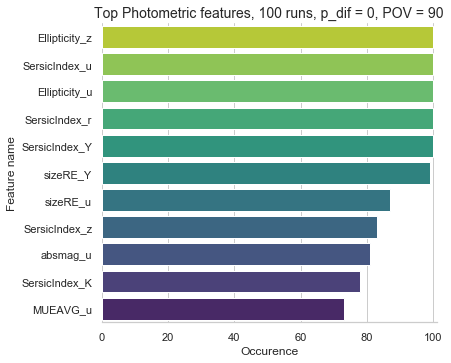

succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 1,pov = 90


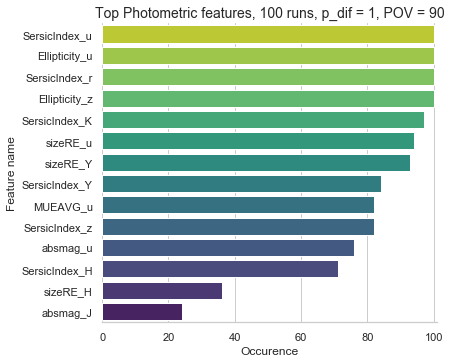

succes, PFA2 results found
settings: Dataframe = Photometric, run number = 100, p_difference = 2,pov = 90


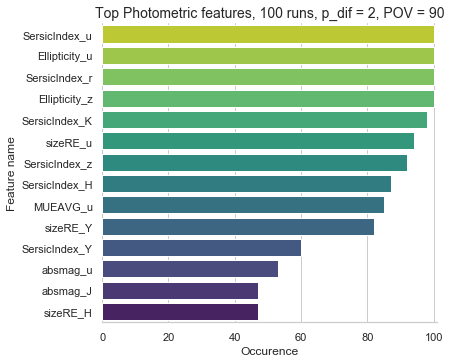

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


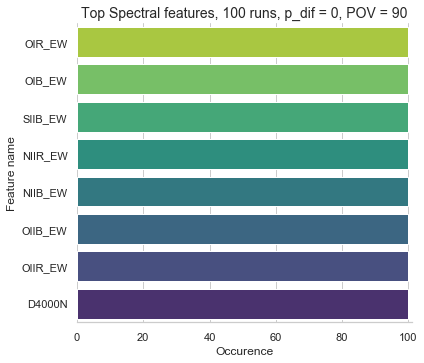

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 1,pov = 90


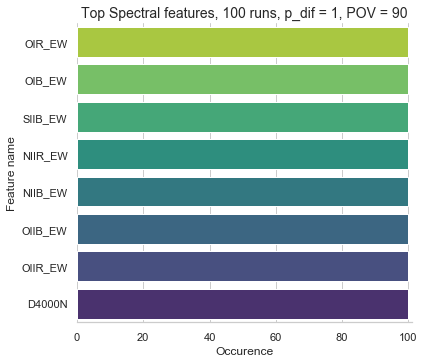

succes, PFA2 results found
settings: Dataframe = Spectral, run number = 100, p_difference = 2,pov = 90


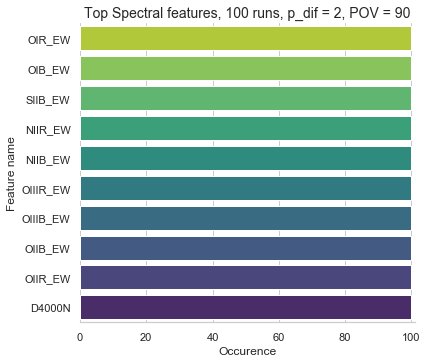

succes, PFA2 results found
settings: Dataframe = Combined, run number = 100, p_difference = 0,pov = 90


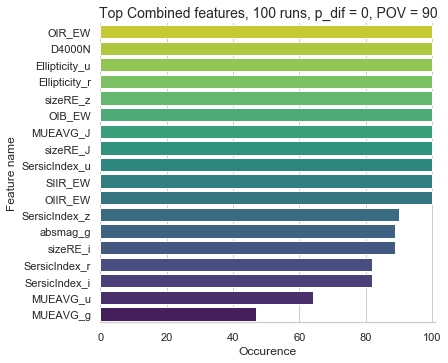

succes, PFA2 results found
settings: Dataframe = Combined, run number = 100, p_difference = 1,pov = 90


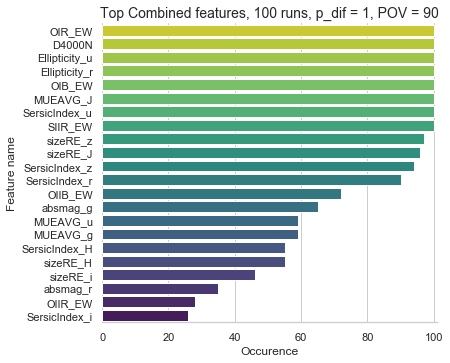

succes, PFA2 results found
settings: Dataframe = Combined, run number = 100, p_difference = 2,pov = 90


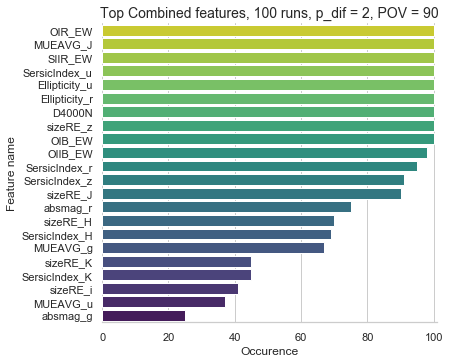

In [13]:
remake = False
for i in dataframes:
 #   PFA_plot(i, 10,100)
    plot_PFA(i, 100,remake=remake)
    plot_PFA(i, 100, p_dif = 1,remake=remake)    
    plot_PFA(i, 100, p_dif = 2,remake=remake)    

succes, PFA2 results found
settings: Dataframe = Direct_Summation, run number = 100, p_difference = 0,pov = 90


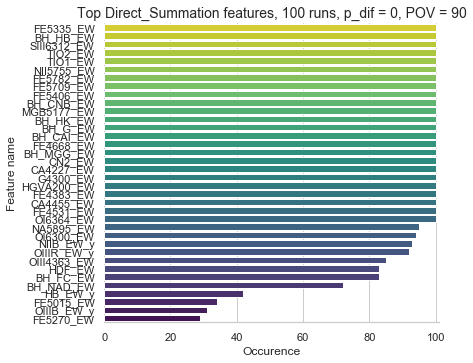

column_name  occurence
0     FE5335_EW      100.0
1      BH_HB_EW      100.0
2   SIII6312_EW      100.0
3       TIO2_EW      100.0
4       TIO1_EW      100.0
5    NII5755_EW      100.0
6     FE5782_EW      100.0
7     FE5709_EW      100.0
8     FE5406_EW      100.0
9     BH_CNB_EW      100.0
10   MGB5177_EW      100.0
11     BH_HK_EW      100.0
12      BH_G_EW      100.0
13    BH_CAI_EW      100.0
14    FE4668_EW      100.0
15    BH_MGG_EW      100.0
16       CN2_EW      100.0
17    CA4227_EW      100.0
18     G4300_EW      100.0
19   HGVA200_EW      100.0
20    FE4383_EW      100.0
21    CA4455_EW      100.0
22    FE4531_EW      100.0
23    OI6364_EW      100.0
24    NA5895_EW       95.0
25    OI6300_EW       94.0
26    NIIB_EW_y       93.0
27   OIIIR_EW_y       92.0
28  OIII4363_EW       85.0
29       HDF_EW       83.0
30     BH_FC_EW       83.0
31    BH_NAD_EW       72.0
32      HB_EW_y       42.0
33    FE5015_EW       34.0
34   OIIIB_EW_y       31.0
35    FE5270_EW       29.0
36      HB_P_EW       16.0
37       OII_EW        8.0
38       HGF_EW        2.0
39       HGA_EW        2.0
40    SIIR_EW_y        1.0

succes, PFA2 results found
settings: Dataframe = Direct_Summation, run number = 100, p_difference = 0,pov = 90


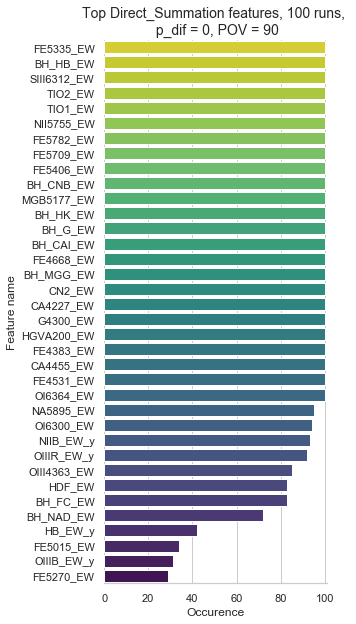

succes, PFA2 results found
settings: Dataframe = Direct_Summation, run number = 100, p_difference = 2,pov = 90


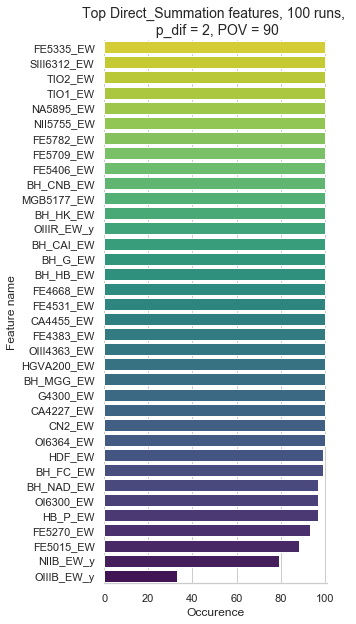

column_name  occurence
0     FE5335_EW      100.0
1   SIII6312_EW      100.0
2       TIO2_EW      100.0
3       TIO1_EW      100.0
4     NA5895_EW      100.0
5    NII5755_EW      100.0
6     FE5782_EW      100.0
7     FE5709_EW      100.0
8     FE5406_EW      100.0
9     BH_CNB_EW      100.0
10   MGB5177_EW      100.0
11     BH_HK_EW      100.0
12   OIIIR_EW_y      100.0
13    BH_CAI_EW      100.0
14      BH_G_EW      100.0
15     BH_HB_EW      100.0
16    FE4668_EW      100.0
17    FE4531_EW      100.0
18    CA4455_EW      100.0
19    FE4383_EW      100.0
20  OIII4363_EW      100.0
21   HGVA200_EW      100.0
22    BH_MGG_EW      100.0
23     G4300_EW      100.0
24    CA4227_EW      100.0
25       CN2_EW      100.0
26    OI6364_EW      100.0
27       HDF_EW       99.0
28     BH_FC_EW       99.0
29    BH_NAD_EW       97.0
30    OI6300_EW       97.0
31      HB_P_EW       97.0
32    FE5270_EW       93.0
33    FE5015_EW       88.0
34    NIIB_EW_y       79.0
35   OIIIB_EW_y       33.0
36      HB_EW_y        5.0
37    SIIR_EW_y        3.0
38       HGF_EW        1.0
39       HGA_EW        1.0
40       OII_EW        1.0

In [18]:
def plot_PFA(eif_df, run_nr = 15, p_dif = 0, pov = 90, remake = False):
    """
    Parameters
    ----------
    eif_df : pandas dataframe
        This needs to befiltered with anomaly detection such as EIF already
    run_nr : Integer, optional
        Amount of runs to do. The default is 15.
    p_dif : int, optional
        p > q, slightly higher number of features is in some cases needed. The default is 0.
    pov : int, optional
        Retained variability in %. The default is 90.
    remake : Boolean, optional
        Set to True if you want to remake previously stored data. The default is False.

    Returns
    -------
    dataframe with column numbers of eif_df and occurence of these columns over all runs combined
    a bar plot showing the occurence parameters over run_nr runs. This plot has been adjusted to 
    only display parameters which occur atleast 0.10 * run_nr amount of times (10%)

    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    #    
        
    results_df = pfa2_loader(eif_df, run_nr = run_nr, p_dif = p_dif, pov = pov, remake = remake)   

    # -------------------------------------------------------------
    # We now have loaded (and if required created) a dataframe with results for n_list
    # If we want to change n_list, we must make sure it's saved and loaded by a new name, or replace the old
    sns.set(style="whitegrid")


    #Set up the variables
    results_top = results_df[results_df.iloc[:,1].values >= run_nr * 0.2]


    #    Setting up the size of the plot, dependant on the number of outputs 
    fig, ax = plt.subplots(figsize=(4,10))

    #Do the actual plotting
    sns.barplot(x='occurence',y='column_name',data=results_top,palette ="viridis_r")
    ax.set(xlim= [0,run_nr+1],xlabel="Occurence",ylabel = "Feature name")
    plt.title("Top %s features, %i runs, \n p_dif = %i, POV = %i" %(DF_name,run_nr,p_dif,pov),size='14')
    sns.despine(left=True, bottom=False)   #removes spines
    plt.savefig("pics/PFA/PFA2_%s_%i_%i_%i"%(DF_name,run_nr,p_dif,pov),bbox_inches="tight")
    plt.show()
    
    return results_df
#for i in dataframes:
 #   PFA2_plot(i, 100)
plot_PFA(ds_eif, 100, 0)
plot_PFA(ds_eif, 100, 2)

Failed to find PFA2 results, creating database


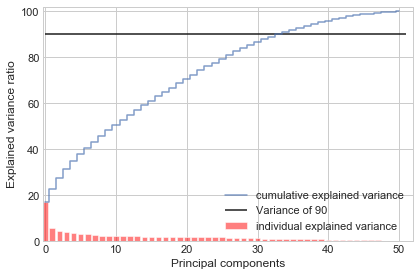

PFA2 Database created
settings: Dataframe = Direct_Summation, run number = 100, p_difference = 0,pov = 90


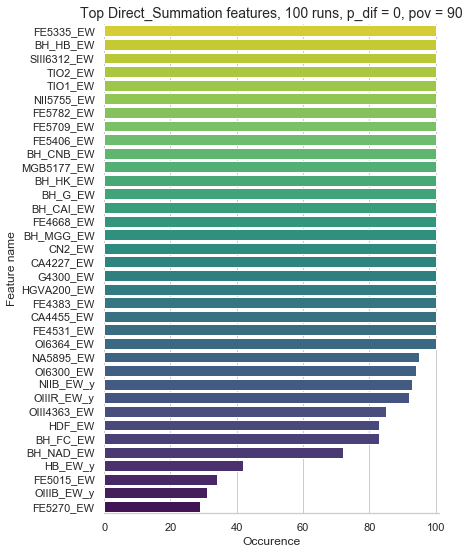

Failed to find PFA2 results, creating database


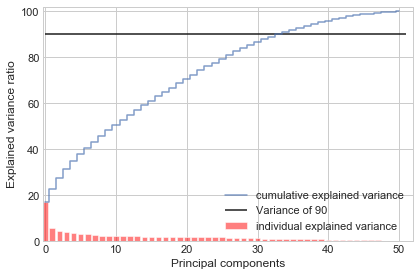

PFA2 Database created
settings: Dataframe = Direct_Summation, run number = 100, p_difference = 2,pov = 90


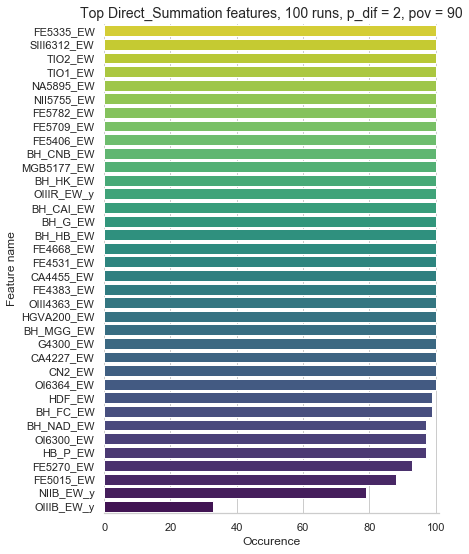

column_name  occurence
0     FE5335_EW      100.0
1   SIII6312_EW      100.0
2       TIO2_EW      100.0
3       TIO1_EW      100.0
4     NA5895_EW      100.0
5    NII5755_EW      100.0
6     FE5782_EW      100.0
7     FE5709_EW      100.0
8     FE5406_EW      100.0
9     BH_CNB_EW      100.0
10   MGB5177_EW      100.0
11     BH_HK_EW      100.0
12   OIIIR_EW_y      100.0
13    BH_CAI_EW      100.0
14      BH_G_EW      100.0
15     BH_HB_EW      100.0
16    FE4668_EW      100.0
17    FE4531_EW      100.0
18    CA4455_EW      100.0
19    FE4383_EW      100.0
20  OIII4363_EW      100.0
21   HGVA200_EW      100.0
22    BH_MGG_EW      100.0
23     G4300_EW      100.0
24    CA4227_EW      100.0
25       CN2_EW      100.0
26    OI6364_EW      100.0
27       HDF_EW       99.0
28     BH_FC_EW       99.0
29    BH_NAD_EW       97.0
30    OI6300_EW       97.0
31      HB_P_EW       97.0
32    FE5270_EW       93.0
33    FE5015_EW       88.0
34    NIIB_EW_y       79.0
35   OIIIB_EW_y       33.0
36      HB_EW_y        5.0
37    SIIR_EW_y        3.0
38       HGF_EW        1.0
39       HGA_EW        1.0
40       OII_EW        1.0

In [13]:
plot_PFA(ds_eif, 100,remake=remake)
plot_PFA(ds_eif, 100, p_dif = 2,remake=remake)  

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Photometric, k = 3,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Photometric, filtered by EIF = 547 
feature number: 1, y= 3140359.27
feature number: 2, y= 664715.91
feature number: 3, y= 301237.91
feature number: 4, y= 407275.66
feature number: 5, y= 396982.77
feature number: 6, y= 429523.36
feature number: 7, y= 479862.09
feature number: 8, y= 498192.33
feature number: 9, y= 604695.58
feature number: 10, y= 730914.02
feature number: 11, y= 812029.53
feature number: 12, y= 932395.19
feature number: 13, y= 875419.49
feature number: 14, y= 992278.33
feature number: 15, y= 986891.45
feature number: 16, y= 980318.84
feature number: 17, y= 1038357.37
feature number: 18, y= 974163.82
feature number: 19, y= 982516.66
feature number: 20, y= 1001546.31
feature number: 21, y= 1030180.83
feature number

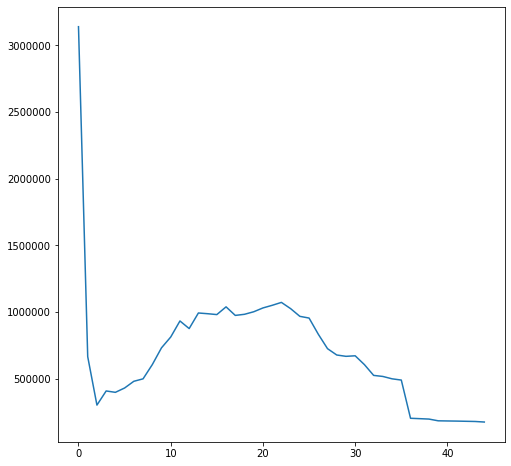

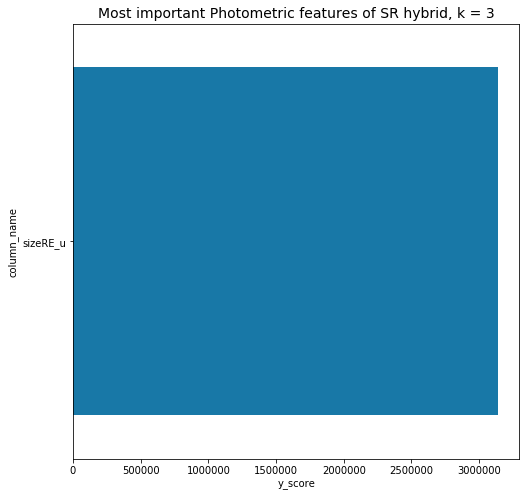

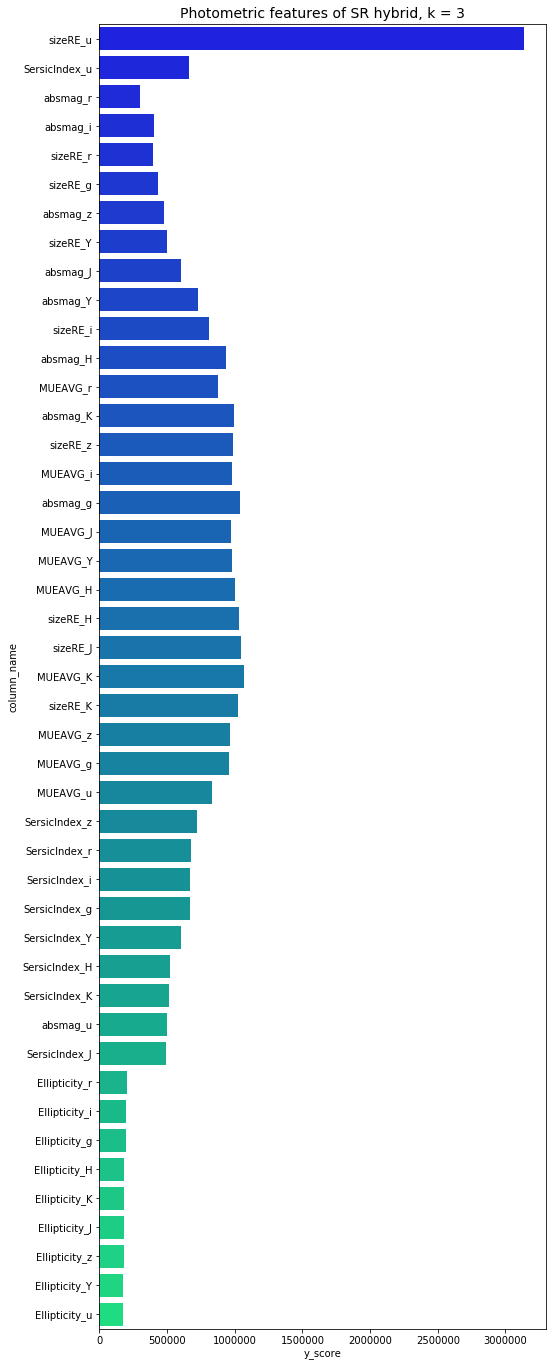

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Photometric, k = 5,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Photometric, filtered by EIF = 547 
feature number: 1, y= 4787470.82
feature number: 2, y= 647644.14
feature number: 3, y= 349904.91
feature number: 4, y= 458260.33
feature number: 5, y= 409044.26
feature number: 6, y= 436794.92
feature number: 7, y= 479365.19
feature number: 8, y= 452820.05
feature number: 9, y= 528494.30
feature number: 10, y= 619388.13
feature number: 11, y= 670711.29
feature number: 12, y= 756444.82
feature number: 13, y= 698160.22
feature number: 14, y= 788146.98
feature number: 15, y= 779644.65
feature number: 16, y= 800776.67
feature number: 17, y= 849986.62
feature number: 18, y= 804620.30
feature number: 19, y= 807962.55
feature number: 20, y= 817737.21
feature number: 21, y= 836724.08
feature number: 2

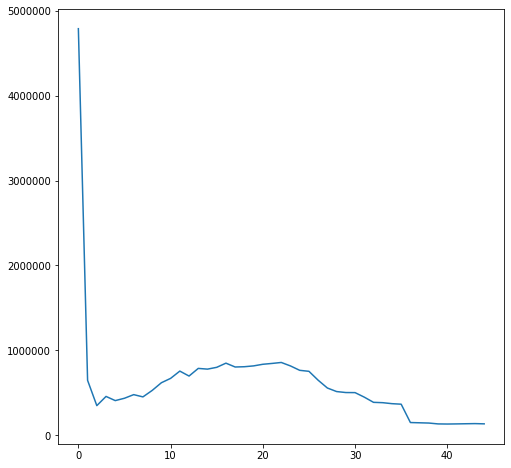

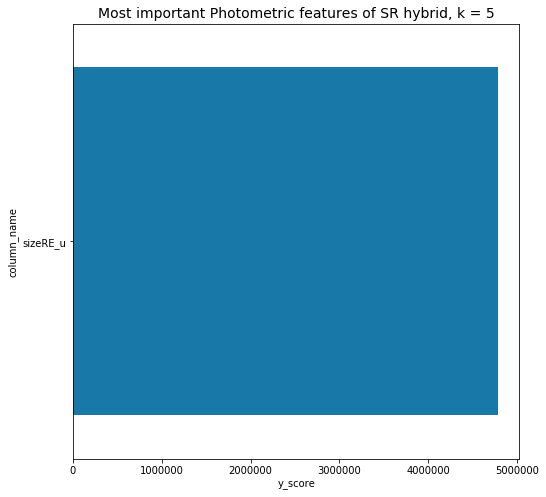

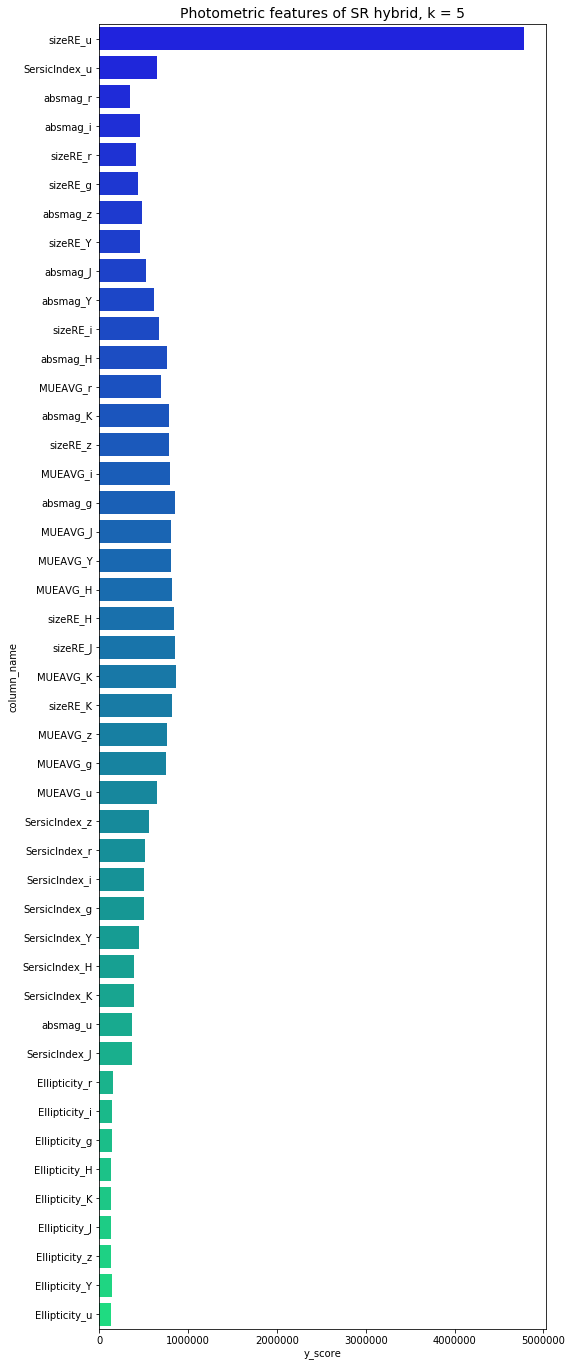

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Spectral, k = 3,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Spectral, filtered by EIF = 547 
feature number: 1, y= 2644108.39
feature number: 2, y= 1129454.07
feature number: 3, y= 1724053.98
feature number: 4, y= 1366298.46
feature number: 5, y= 732974.62
feature number: 6, y= 584614.97
feature number: 7, y= 482851.52
feature number: 8, y= 457991.97
feature number: 9, y= 257770.24
feature number: 10, y= 187560.22
feature number: 11, y= 178842.58
feature number: 12, y= 141262.49
feature number: 13, y= 126699.76
[2 2 2 ... 0 0 1]


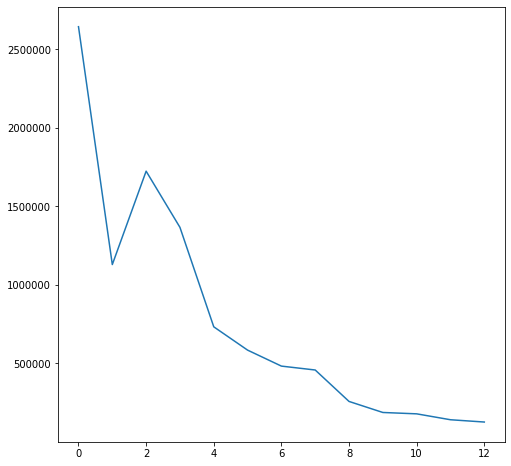

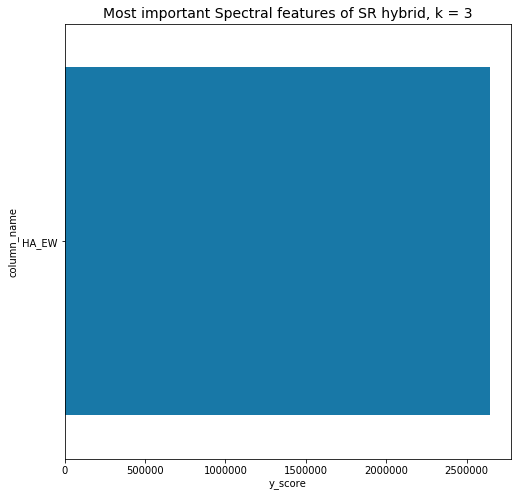

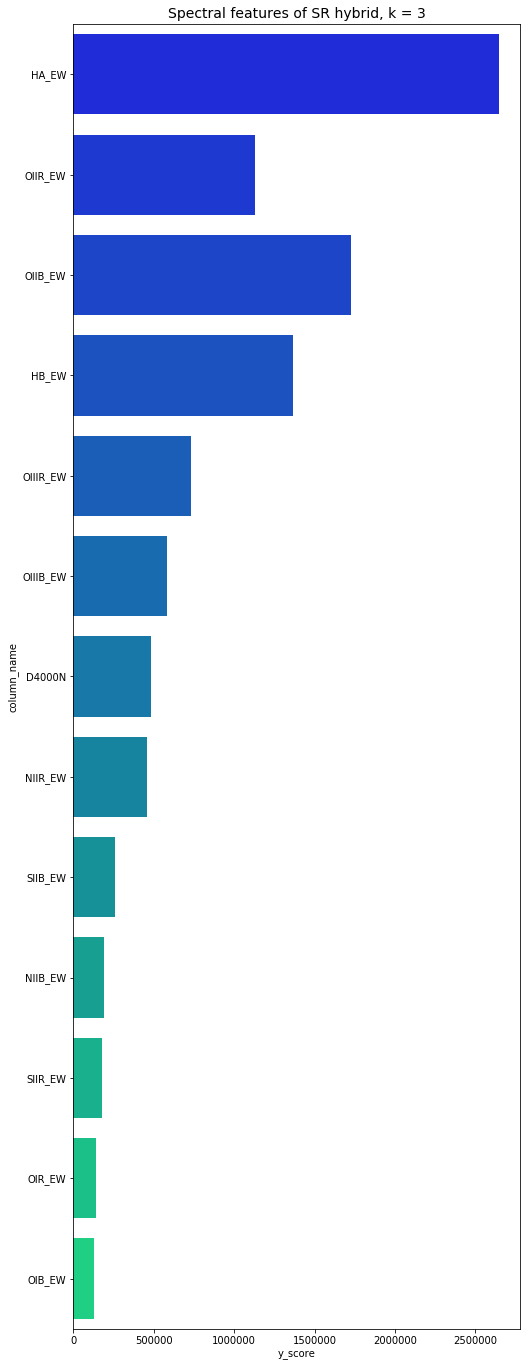

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Spectral, k = 5,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Spectral, filtered by EIF = 547 
feature number: 1, y= 4191653.84
feature number: 2, y= 1031779.02
feature number: 3, y= 1543455.78
feature number: 4, y= 1166307.18
feature number: 5, y= 587037.47
feature number: 6, y= 449699.47
feature number: 7, y= 375442.62
feature number: 8, y= 343383.78
feature number: 9, y= 188889.79
feature number: 10, y= 139569.32
feature number: 11, y= 129798.10
feature number: 12, y= 99577.26
feature number: 13, y= 87651.76
[2 2 2 ... 3 0 1]


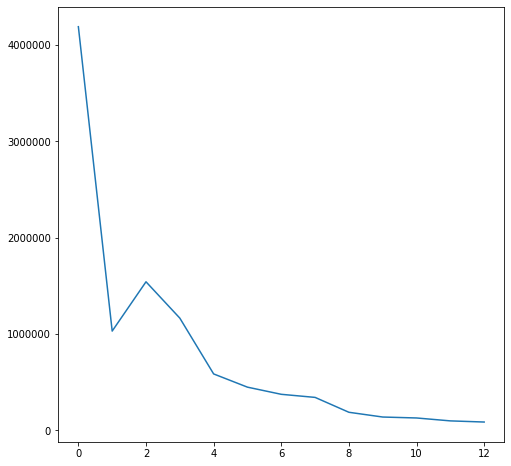

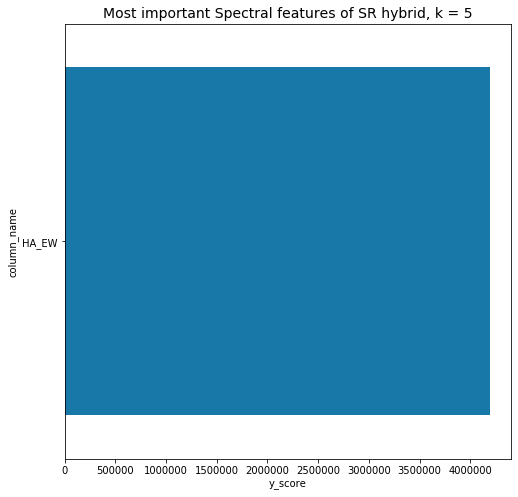

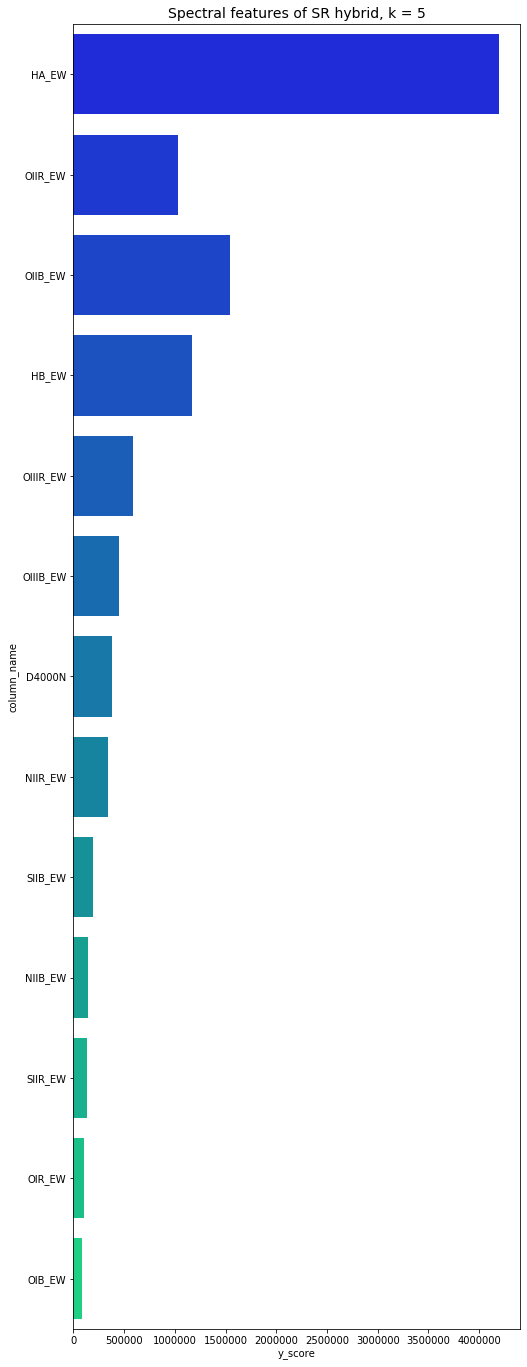

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 3,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Combined, filtered by EIF = 547 
feature number: 1, y= 1575783.41
feature number: 2, y= 1111599.42
feature number: 3, y= 774936.52
feature number: 4, y= 883900.78
feature number: 5, y= 617225.80
feature number: 6, y= 654245.10
feature number: 7, y= 760596.34
feature number: 8, y= 942610.84
feature number: 9, y= 1149710.26
feature number: 10, y= 1405443.58
feature number: 11, y= 1642188.25
feature number: 12, y= 1841810.10
feature number: 13, y= 1405985.85
feature number: 14, y= 1261564.42
feature number: 15, y= 1054628.41
feature number: 16, y= 991237.38
feature number: 17, y= 955950.17
feature number: 18, y= 835470.81
feature number: 19, y= 793609.28
feature number: 20, y= 797796.61
feature number: 21, y= 808203.62
feature number:

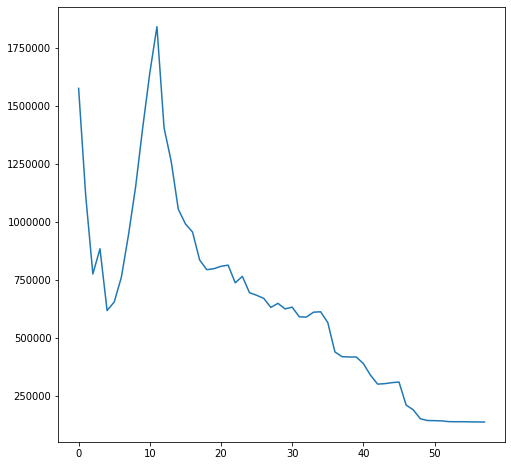

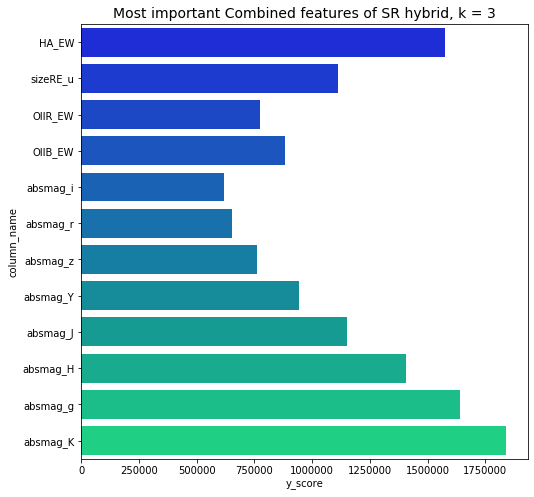

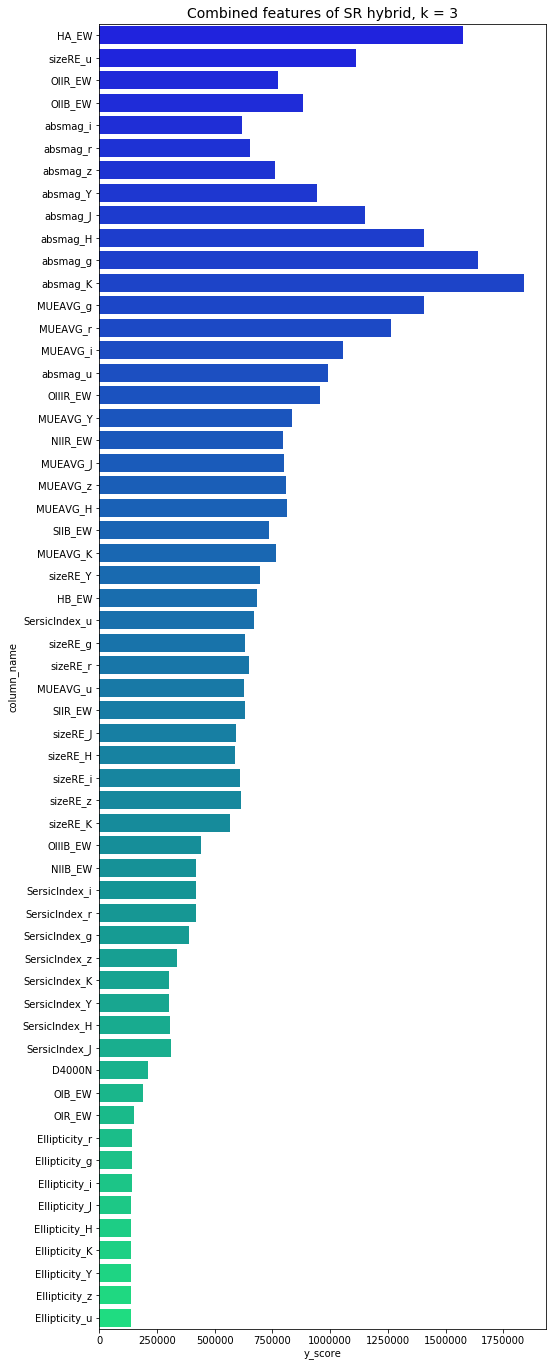

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 5,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Combined, filtered by EIF = 547 
feature number: 1, y= 2535739.35
feature number: 2, y= 1267505.86
feature number: 3, y= 732914.56
feature number: 4, y= 924245.19
feature number: 5, y= 571568.80
feature number: 6, y= 652575.08
feature number: 7, y= 741892.74
feature number: 8, y= 875980.40
feature number: 9, y= 1016869.71
feature number: 10, y= 1185375.66
feature number: 11, y= 1337167.21
feature number: 12, y= 1445623.02
feature number: 13, y= 1053947.02
feature number: 14, y= 959643.87
feature number: 15, y= 863906.04
feature number: 16, y= 794754.58
feature number: 17, y= 766083.52
feature number: 18, y= 689232.74
feature number: 19, y= 660850.87
feature number: 20, y= 652934.73
feature number: 21, y= 650317.52
feature number: 2

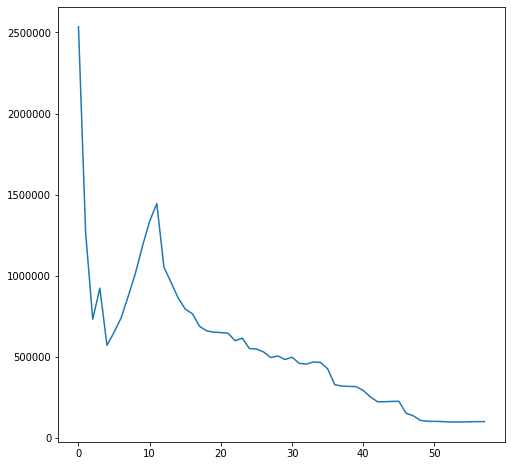

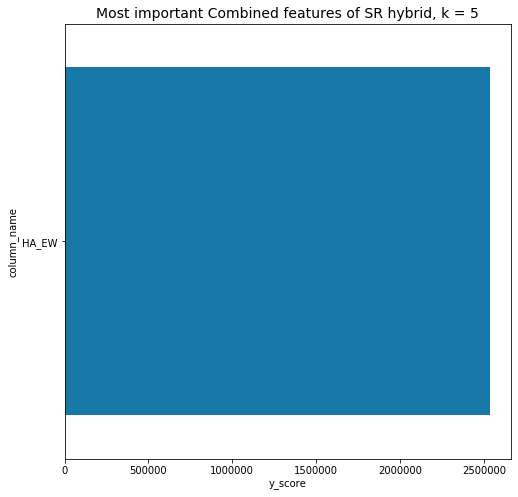

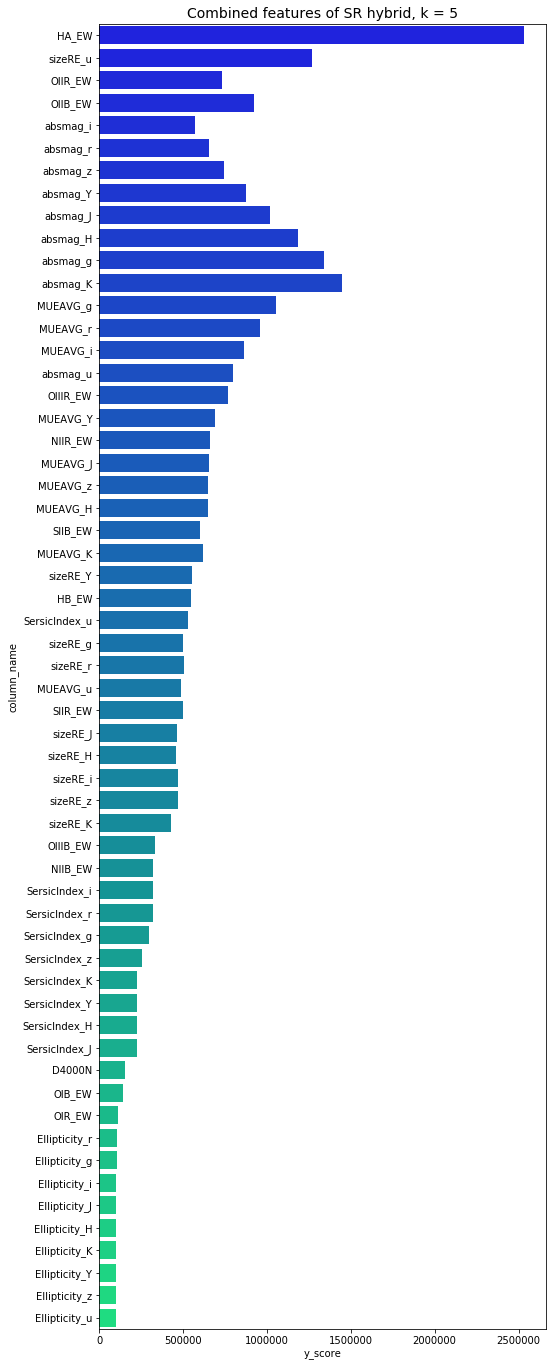

In [4]:
remake = True
for i in dataframes:
    plot_SR(i, 3, remake = remake)
    plot_SR(i, 5, remake = remake)

In [15]:
remake

False

In [49]:
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)
    if intra_disp == 0.:
        return 1
    else:
        return y
     #%%   
def WNCH2(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index, alternative
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    ===============
    Adjustment made: First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    #print('y =',y)
    if intra_disp == 0.:
        return 1
    else:
        y =  (extra_disp * (n_samples - n_clusters) * (n_features-1)) / (intra_disp * (n_clusters - 1) * L_r )
        return y
                
 #%%   
#non weighted nor normalised Calinski-Harabasz (comparison reasons)
def CH(X, cluster_predict, n_clusters):
    """
    Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    """
    n_samples = X.shape[0]    
    extra_disp, intra_disp = 0., 0.
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values  # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)

    return (1. if intra_disp == 0. else
        extra_disp * (n_samples - n_clusters) /
        (intra_disp * (n_clusters - 1.)))
#%%


def LS_WNCH_SR(eif_df, k = 3, remake = False):
    """
    Laplacian Score-WNCH-Simple Ranking 
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    Uses KMeans
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/
    master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    
    y_best = -np.inf
    y_list = []

    #laplace order
    lap_matrix = laplace_order(eif_df)
    max_features = lap_matrix.shape[0]

    for n_features in range(0,max_features):      #number of features we want to analyse over, start at 0 so add +1 where required

        
        #set some variables for WNCH 
        
        L_r = lap_matrix.iloc[n_features,1]             # Laplacian score associated with last r-th feature added or eliminated
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array 
        lap_part = eif_df[names]     #make a new (partial) dataframe containing only these features (This is S_0)!


        # Run a clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= k).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        # cluster_centers = kmeans.cluster_centers_               #find the cluster centers (unused)
        
        # Calculate WNCH score:
        y = WNCH(scaled, cluster_predict, k, L_r)
        #   W2 = CH(lap_part, cluster_predict)  Obselete, for comparison sake
        #   CH_list.append(W2)
        if y > y_best:
            y_best = y
            S_best = names
        y_list.append(y)
        print('feature number: %i, y= %.2f'%(n_features+1,y))
    
    print(cluster_predict)
    data = {'column_name':S_best, 'y_score':y_list[:len(S_best)]}
    short = pd.DataFrame(data = data, dtype='float32')  
    data = {'column_name':names, 'y_score':y_list}
    long = pd.DataFrame(data = data)  
    return short, long
 
def SR_loader(eif_df, k, remake = False):
    """
    Input: 
        eif_df: EIF filtered dataframe
        k: number of clusters
        remake: remake the database entry or not?
    
    Output: 
        short and long dataframe belonging to LS_WNCH_SR
    
    Use: stores the results of LS_WNCH_SR,
    so that it does not need to be rerun every time
    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    
    while True:
        try:
            if remake == True:
                print("New SR file requested")
                raise NameError('Remake')
            long = pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short =  pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i"%(DF_name, k))
            break
        except (KeyError,FileNotFoundError, NameError):
            if DF_name == "custom":
                short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)
                break
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i,"%(DF_name, k))
            short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)            
            long.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            break
      
    return short, long
#%%
def plot_SR(eif_df, k, remake = False):
    """
    
    Parameters
    ----------
    eif_df : pandas dataframe 
        EIF filtered dataframe
    k : integer, optional
        number of clusters. The default is 3.
    remake : boolean, optional
         Remake the results or try to load previous results. The default is False.

    Returns
    -------
    short : pandas DataFrame
        Results of SR hybrid algorhitm
    long : pandas Dataframe
        SR hybrid results for all features

    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    short, long = SR_loader(eif_df, k, remake = remake)
    
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data = (long['y_score']))
    plt.savefig("pics/SR/yplot_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
      
    sns.set(style="whitegrid",font_scale=1.5)
    fig, ax = plt.subplots(figsize=(6,12))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("Most important %s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=short,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    
    sns.set(style="whitegrid",font_scale=1.2)
    fig, ax = plt.subplots(figsize=(6,24))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("%s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=long,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_complete_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    return short, long


succes, Hybrid results found
Settings: Database: Photometric, k = 5


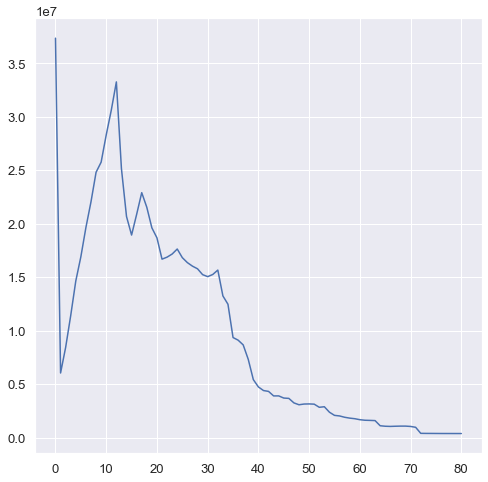

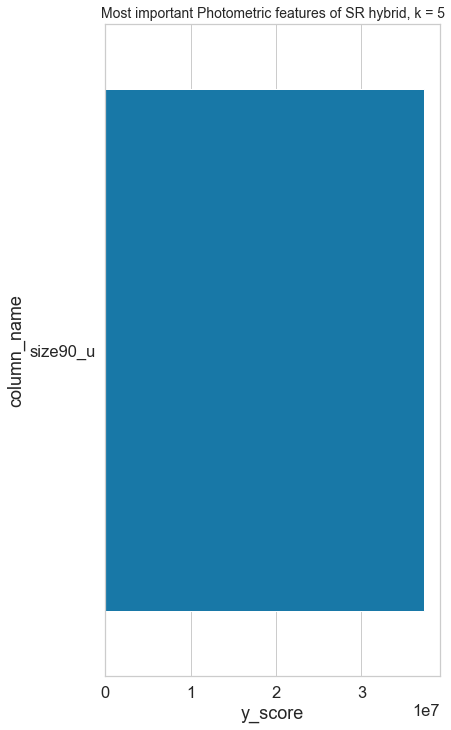

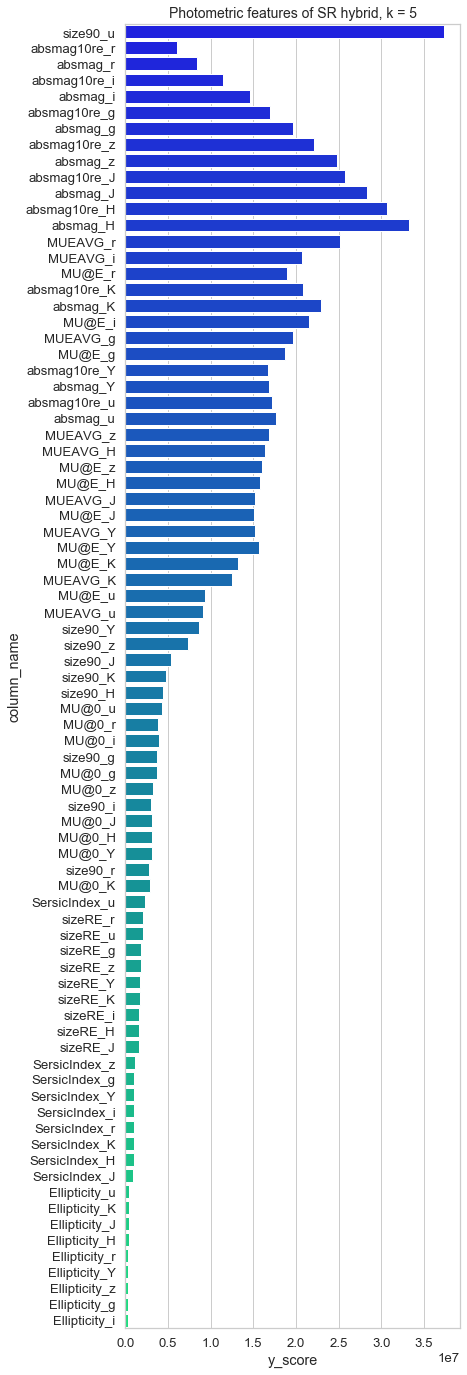

Failed to find Hybrid results, or remake requested
Settings: Database: DS, k = 5,
Failed to find Laplacian results, creating database


In [ ]:
plot_SR(phot_eif, 5, remake = remake)
plot_SR(spec_ds, 5, remake = remake)

Failed to find Hybrid results, or remake requested
Settings: Database: Photometric, k = 5,
succes, Laplacian results found
settings: Dataset = eta, Dataframe = Photometric, filtered by EIF = 1288 
feature number: 1, y= 37345200.39
feature number: 2, y= 6039503.88
feature number: 3, y= 8431391.62
feature number: 4, y= 11409263.05
feature number: 5, y= 14641418.09
feature number: 6, y= 16907772.47
feature number: 7, y= 19654102.43
feature number: 8, y= 22052420.18
feature number: 9, y= 24810399.17
feature number: 10, y= 25755032.33
feature number: 11, y= 28296426.57
feature number: 12, y= 30616024.04
feature number: 13, y= 33258586.53
feature number: 14, y= 25148068.39
feature number: 15, y= 20674239.32
feature number: 16, y= 18939003.53
feature number: 17, y= 20876378.65
feature number: 18, y= 22901947.47
feature number: 19, y= 21535265.77
feature number: 20, y= 19612801.67
feature number: 21, y= 18676847.75
feature number: 22, y= 16685117.05
feature number: 23, y= 16873644.37
feature n

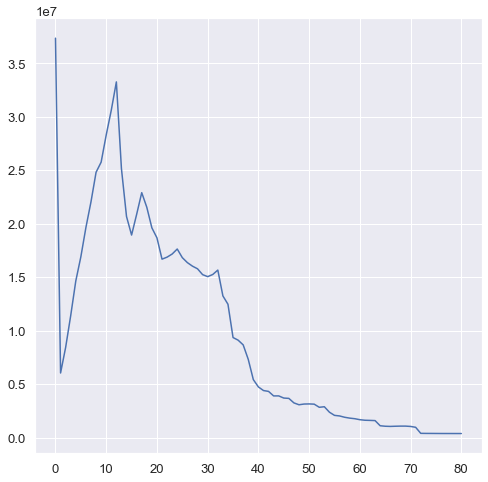

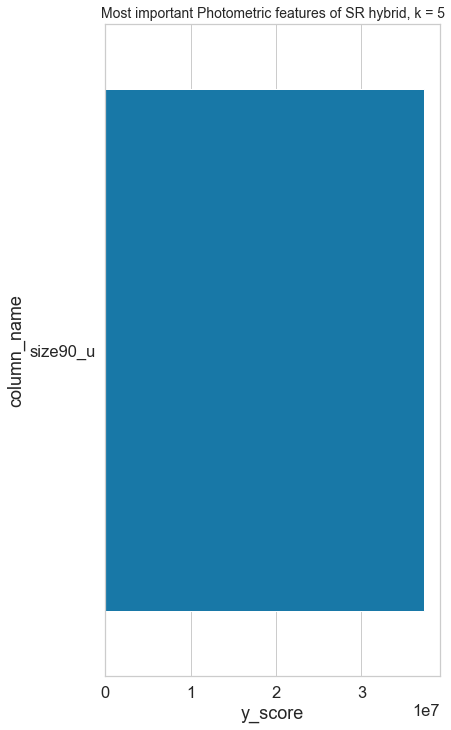

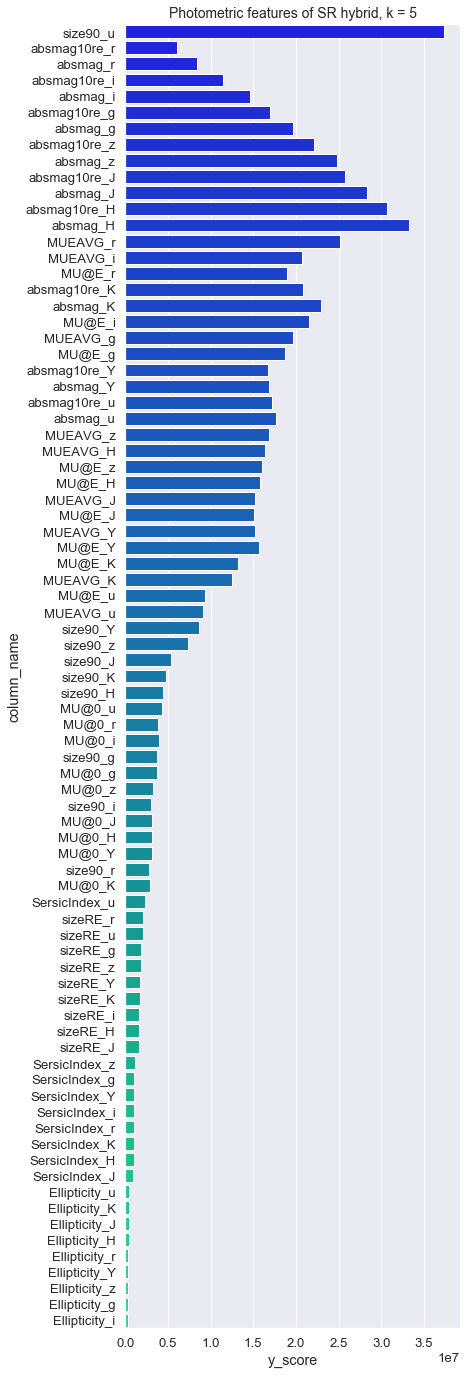

Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 5,
succes, Laplacian results found
settings: Dataset = eta, Dataframe = Combined, filtered by EIF = 1288 
feature number: 1, y= 27142927.78
feature number: 2, y= 4382111.18
feature number: 3, y= 6118761.33
feature number: 4, y= 8347694.11
feature number: 5, y= 10726768.23
feature number: 6, y= 12571396.33
feature number: 7, y= 14629347.41
feature number: 8, y= 16334981.08
feature number: 9, y= 18377589.43
feature number: 10, y= 12159577.56
feature number: 11, y= 13722532.60
feature number: 12, y= 15454682.45
feature number: 13, y= 17201653.94
feature number: 14, y= 19026324.39
feature number: 15, y= 15611888.98
feature number: 16, y= 14482954.60
feature number: 17, y= 15821108.83
feature number: 18, y= 17356921.78
feature number: 19, y= 16219995.67
feature number: 20, y= 15607969.51
feature number: 21, y= 14797953.86
feature number: 22, y= 14147308.48
feature number: 23, y= 14548726.18
feature number: 

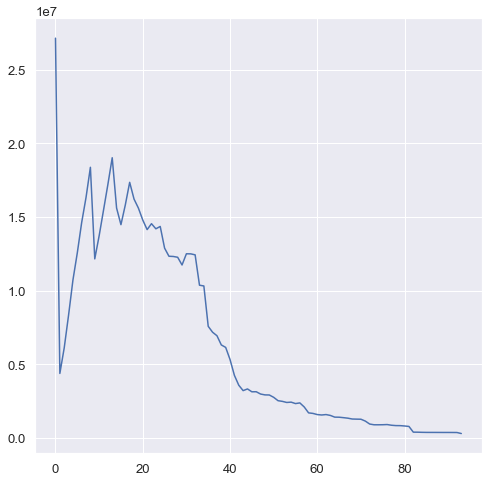

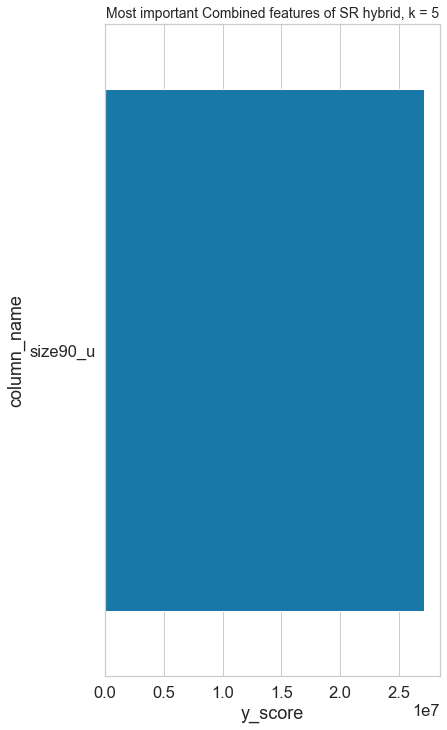

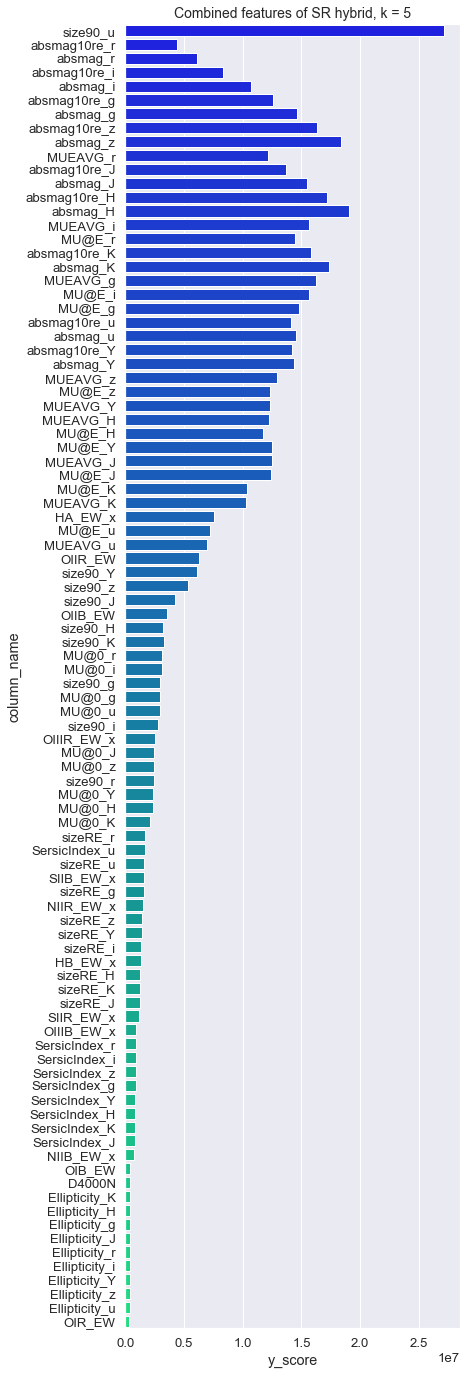

(  column_name     y_score
 0    size90_u  27142928.0,
       column_name       y_score
 0        size90_u  2.714293e+07
 1    absmag10re_r  4.382111e+06
 2        absmag_r  6.118761e+06
 3    absmag10re_i  8.347694e+06
 4        absmag_i  1.072677e+07
 ..            ...           ...
 89  Ellipticity_i  3.753682e+05
 90  Ellipticity_Y  3.754576e+05
 91  Ellipticity_z  3.738835e+05
 92  Ellipticity_u  3.720736e+05
 93         OIR_EW  3.024819e+05
 
 [94 rows x 2 columns])

In [48]:
remake = False
plot_SR(phot_eif, 5, remake = remake)
plot_SR(combi_eif, 5, remake = remake)

succes, Hybrid results found
Settings: Database: Photometric, k = 2


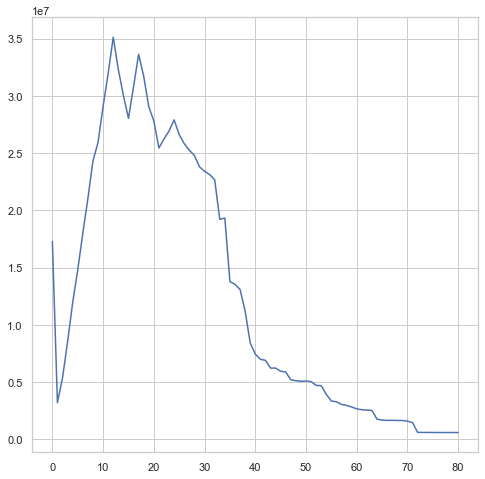

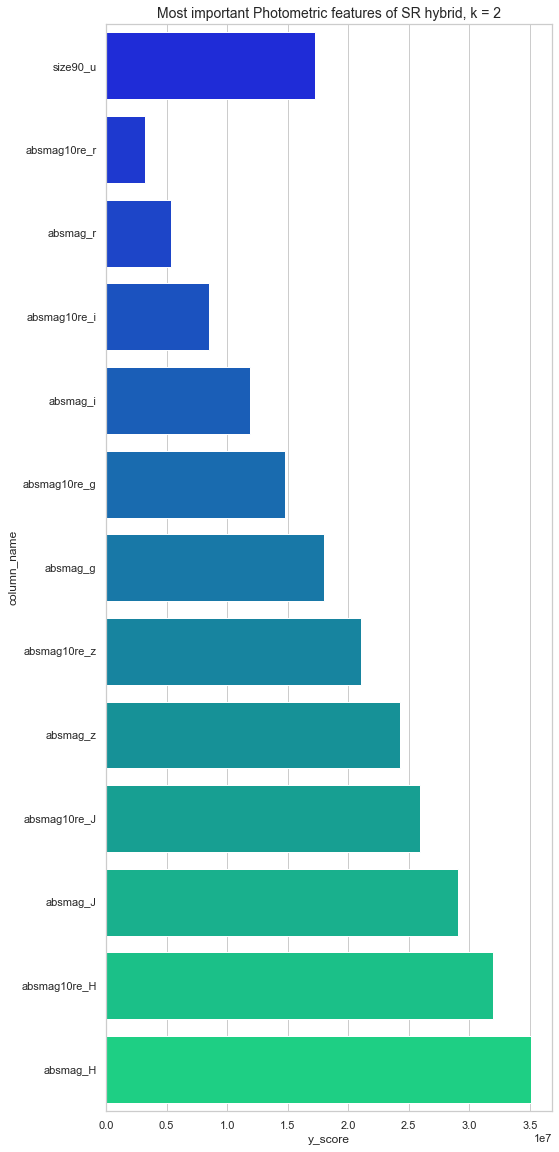

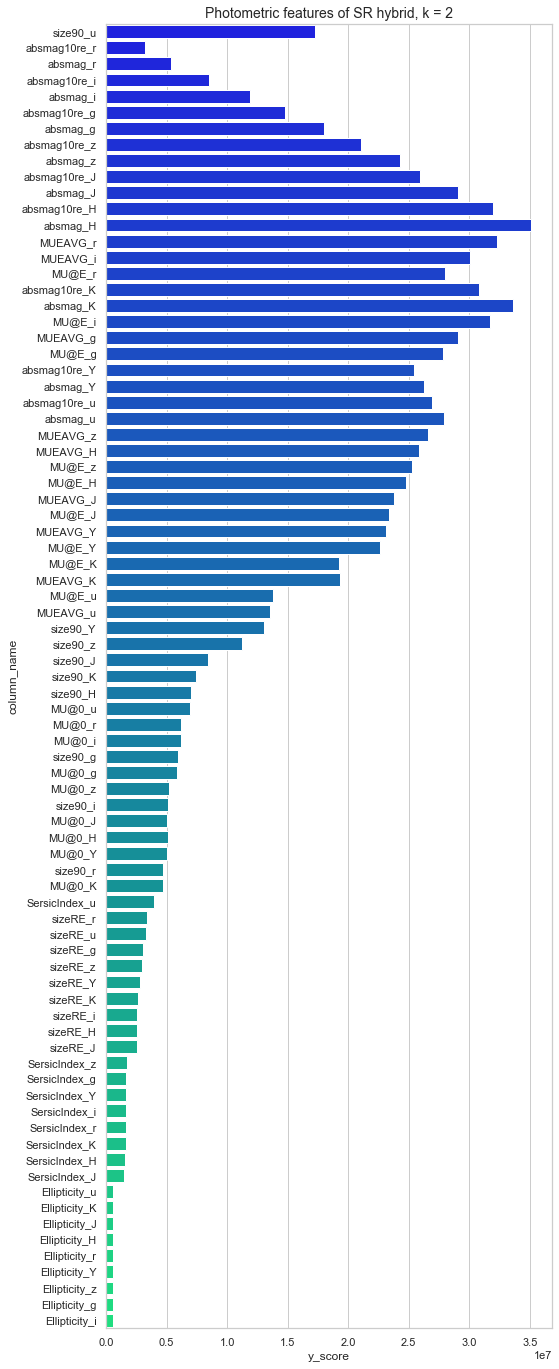

(     column_name      y_score
 0       size90_u  17283002.00
 1   absmag10re_r   3195984.25
 2       absmag_r   5357117.00
 3   absmag10re_i   8511254.00
 4       absmag_i  11917039.00
 5   absmag10re_g  14794012.00
 6       absmag_g  17983056.00
 7   absmag10re_z  21019076.00
 8       absmag_z  24298178.00
 9   absmag10re_J  25928498.00
 10      absmag_J  29069098.00
 11  absmag10re_H  31955624.00
 12      absmag_H  35118416.00,
       column_name       y_score
 0        size90_u  1.728300e+07
 1    absmag10re_r  3.195984e+06
 2        absmag_r  5.357117e+06
 3    absmag10re_i  8.511254e+06
 4        absmag_i  1.191704e+07
 ..            ...           ...
 76  Ellipticity_r  5.877765e+05
 77  Ellipticity_Y  5.873966e+05
 78  Ellipticity_z  5.876488e+05
 79  Ellipticity_g  5.866660e+05
 80  Ellipticity_i  5.872195e+05
 
 [81 rows x 2 columns])

In [21]:
plot_SR(phot_eif, 2, remake = remake)

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 4,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Combined, filtered by EIF = 547 
feature number: 1, y= 22168171.13
feature number: 2, y= 3953043.16
feature number: 3, y= 5998823.32
feature number: 4, y= 7869277.95
feature number: 5, y= 9849173.99
feature number: 6, y= 11441157.04
feature number: 7, y= 13177915.02
feature number: 8, y= 14662368.41
feature number: 9, y= 16513658.32
feature number: 10, y= 12152581.91
feature number: 11, y= 14071213.71
feature number: 12, y= 16187315.56
feature number: 13, y= 18346013.06
feature number: 14, y= 20607705.72
feature number: 15, y= 17478220.02
feature number: 16, y= 15599530.85
feature number: 17, y= 17222489.94
feature number: 18, y= 19079429.81
feature number: 19, y= 17403791.36
feature number: 20, y= 16980156.97
feature number: 21, y

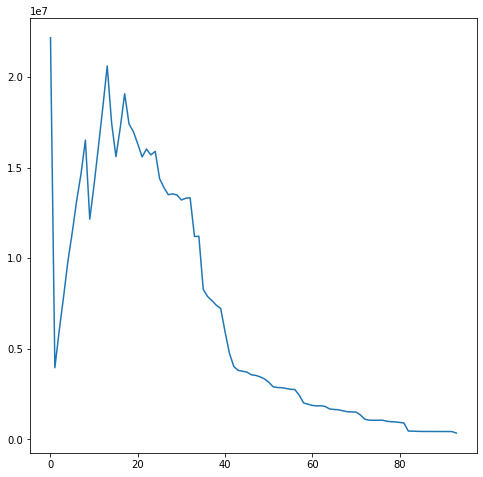

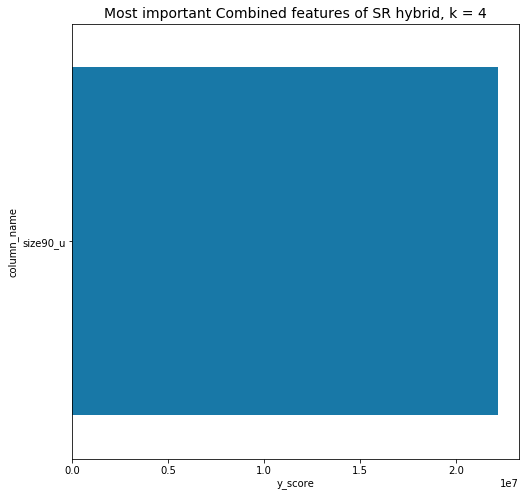

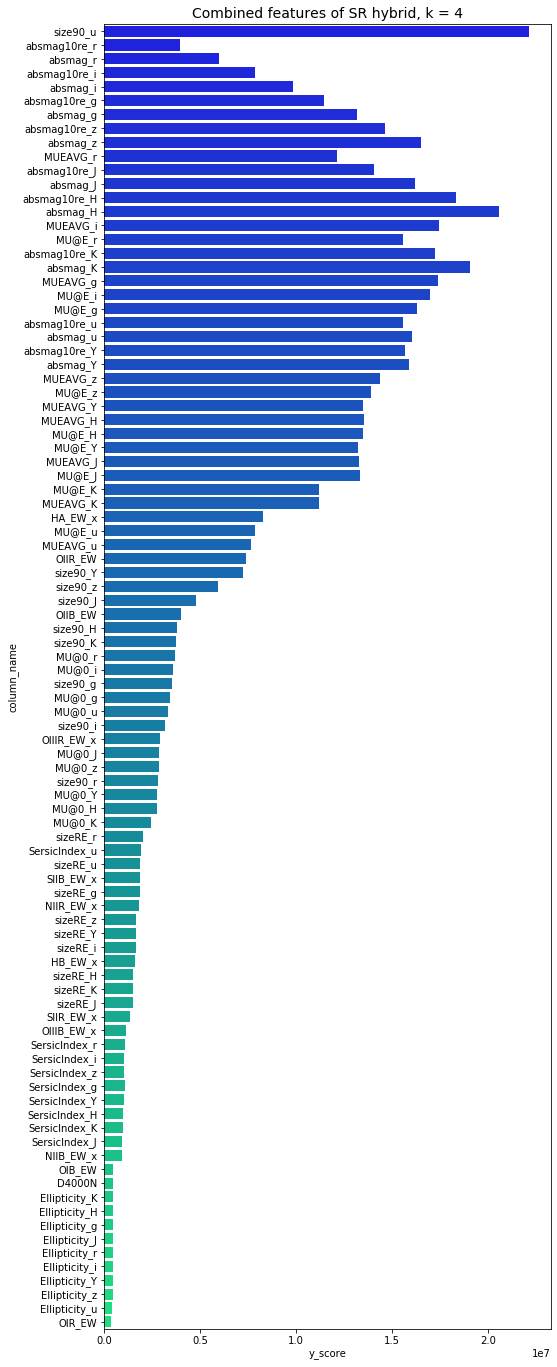

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Photometric, k = 2,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Photometric, filtered by EIF = 547 
feature number: 1, y= 17283002.79
feature number: 2, y= 3195984.26
feature number: 3, y= 5357152.03
feature number: 4, y= 8511286.25
feature number: 5, y= 11917102.43
feature number: 6, y= 14794011.57
feature number: 7, y= 17983101.76
feature number: 8, y= 21019044.83
feature number: 9, y= 24298178.28
feature number: 10, y= 25928489.11
feature number: 11, y= 29069098.09
feature number: 12, y= 31955623.43
feature number: 13, y= 35118373.31
feature number: 14, y= 32299940.29
feature number: 15, y= 30039635.87
feature number: 16, y= 28025044.64
feature number: 17, y= 30780944.85
feature number: 18, y= 33619901.84
feature number: 19, y= 31725505.38
feature number: 20, y= 29059894.44
feature number

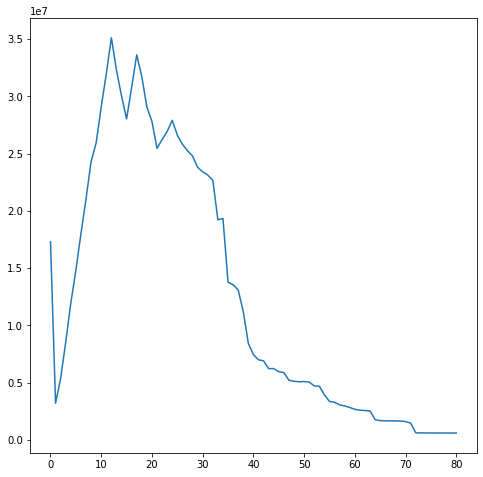

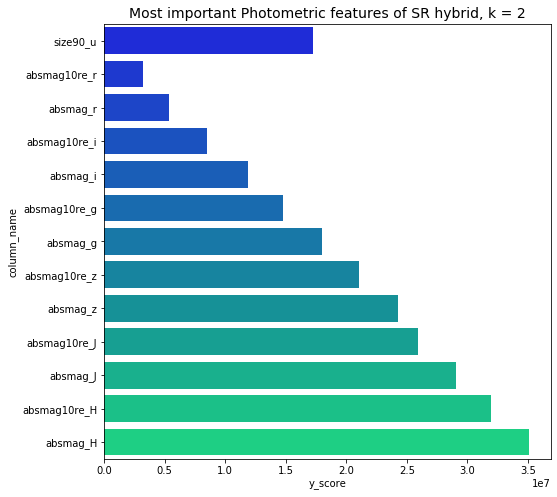

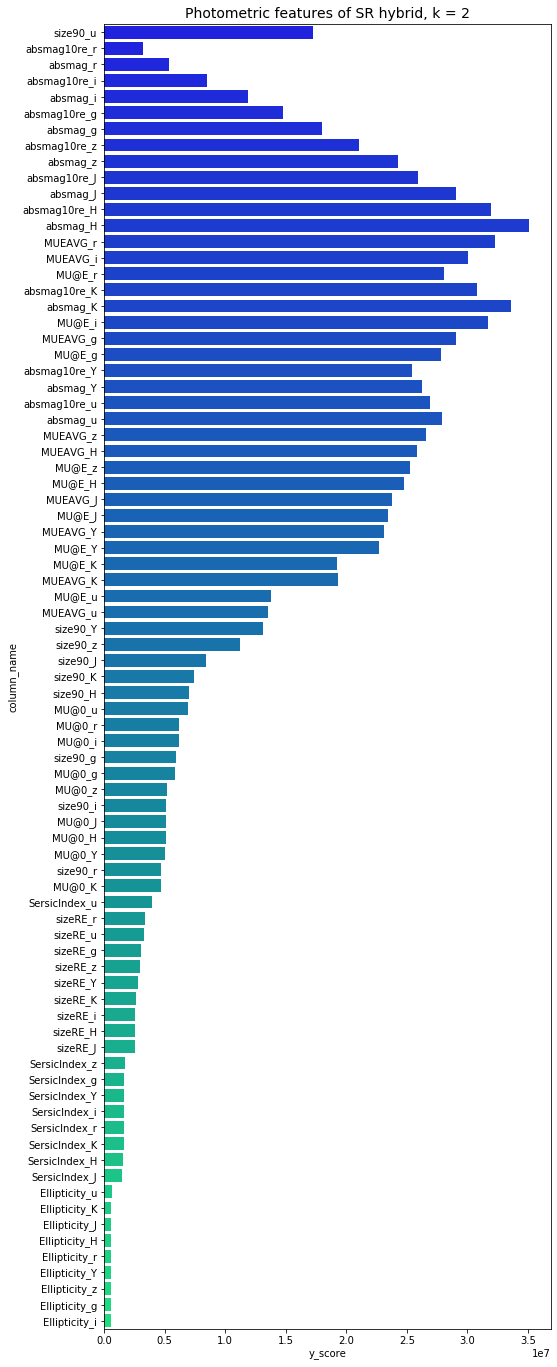

(     column_name      y_score
 0       size90_u  17283002.00
 1   absmag10re_r   3195984.25
 2       absmag_r   5357152.00
 3   absmag10re_i   8511286.00
 4       absmag_i  11917102.00
 5   absmag10re_g  14794012.00
 6       absmag_g  17983102.00
 7   absmag10re_z  21019044.00
 8       absmag_z  24298178.00
 9   absmag10re_J  25928490.00
 10      absmag_J  29069098.00
 11  absmag10re_H  31955624.00
 12      absmag_H  35118372.00,
       column_name       y_score
 0        size90_u  1.728300e+07
 1    absmag10re_r  3.195984e+06
 2        absmag_r  5.357152e+06
 3    absmag10re_i  8.511286e+06
 4        absmag_i  1.191710e+07
 ..            ...           ...
 76  Ellipticity_r  5.877770e+05
 77  Ellipticity_Y  5.873963e+05
 78  Ellipticity_z  5.876577e+05
 79  Ellipticity_g  5.866669e+05
 80  Ellipticity_i  5.872208e+05
 
 [81 rows x 2 columns])

In [9]:
plot_SR(combi_eif, 4, remake = remake)
plot_SR(phot_eif, 2, remake = remake)

In [14]:
combi_eif

absmag_u  absmag10re_u     size90_u    sizeRE_u  SersicIndex_u  \
249544 -18.670140    -18.670117    11.771543    4.714600         1.1834   
214372 -18.943051    -18.943042    14.760352    6.058975         1.1213   
512675 -19.321912    -19.321908    14.774771    6.154256         1.0851   
69714  -18.527818    -18.527818     8.609596    4.454378         0.6094   
143953 -18.979291    -18.979291    12.902518    7.682308         0.3611   
...           ...           ...          ...         ...            ...   
509072 -18.300432    -18.168657    46.437600    4.034153         7.9336   
86199  -21.610659    -21.441775  2186.081016  138.891768        10.0178   
371541 -20.753384    -20.560473  2197.380328  112.514591        11.5942   
210532 -19.876685    -19.629146  2172.501880   64.400112        16.0952   
227389 -21.687613    -21.585969  2113.515850  234.041496         6.4811   

        Ellipticity_u     MU@0_u     MU@E_u   MUEAVG_u   absmag_g  ...  \
249544         0.4781  21.596563  23.814840  23.037500 -19.815575  ...   
214372         0.6115  21.568823  23.652910  22.901237 -19.933286  ...   
512675         0.2856  21.986561  23.992464  23.256319 -20.296320  ...   
69714          0.7488  21.657850  22.641903  22.163820 -19.809835  ...   
143953         0.9012  21.700947  22.165770  21.887093 -20.031125  ...   
...               ...        ...        ...        ...        ...  ...   
509072         0.7801   7.339365  24.206430  22.451128 -20.475290  ...   
86199          0.4270   7.976509  29.369064  27.489119 -21.189486  ...   
371541         0.2030   5.747794  30.563307  28.605055 -20.917937  ...   
210532         0.9518  -7.152919  27.436125  25.301628 -20.851689  ...   
227389         0.7805  15.832254  29.545574  27.897907 -21.568454  ...   

         HB_EW_x  OIIIB_EW_x  OIIIR_EW_x    HA_EW_x  NIIB_EW_x  NIIR_EW_x  \
249544  3.022733    2.536469    4.752177  21.223593   1.881916   6.619403   
214372  3.723447    0.887489    2.285633  21.925581   2.902582   8.927492   
512675  2.905817   -1.903432    1.960478  21.650640   2.525032   7.113458   
69714   4.038777    0.959654    2.443475  22.971811   3.294966  11.069308   
143953  2.152203    1.565968    4.490732  19.612249   2.034439   5.344714   
...          ...         ...         ...        ...        ...        ...   
509072 -1.079820    7.456689    6.277293  -0.329712  -0.051502   0.837553   
86199   2.361140    0.567882    0.757724  17.251017   0.663727   6.386682   
371541 -2.116919    3.552273   -0.418997   0.040200   0.335652   1.070208   
210532 -2.563940    1.803078   -3.028520  -1.342518   0.288141   1.613822   
227389 -1.932722   -0.086976    0.235357   3.604140   0.004719   2.121168   

        SIIB_EW_x  SIIR_EW_x    OIB_EW    OIR_EW  
249544   5.374747   2.836420  0.607574  0.853840  
214372   6.573369   4.085190  0.708488  0.238800  
512675   3.580850   2.684033  0.636104  0.149362  
69714    4.372377   3.519439  0.751417  0.100821  
143953   5.138319   3.669761  1.193164 -0.213894  
...           ...        ...       ...       ...  
509072  -0.498219   0.371253 -0.322811  0.532492  
86199    2.532520   2.120131  0.553890 -0.175130  
371541  -0.442879   0.164739  0.040560 -0.336401  
210532  -0.607628  -0.104002  0.512292 -0.101718  
227389   0.252999   0.595956 -0.551499 -0.142869  

[24473 rows x 94 columns]

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 2,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Combined, filtered by EIF = 547 
feature number: 1, y= 12429963.72
feature number: 2, y= 2312594.14
feature number: 3, y= 3898073.81
feature number: 4, y= 6238030.62
feature number: 5, y= 8740425.73
feature number: 6, y= 11010321.80
feature number: 7, y= 13394575.66
feature number: 8, y= 15580529.89
feature number: 9, y= 18006830.55
feature number: 10, y= 15523470.76
feature number: 11, y= 17602154.69
feature number: 12, y= 19861635.69
feature number: 13, y= 22119168.07
feature number: 14, y= 24435426.37
feature number: 15, y= 22682555.69
feature number: 16, y= 21443385.86
feature number: 17, y= 23341258.37
feature number: 18, y= 25497204.81
feature number: 19, y= 24112901.87
feature number: 20, y= 23143420.07
feature number: 21, y

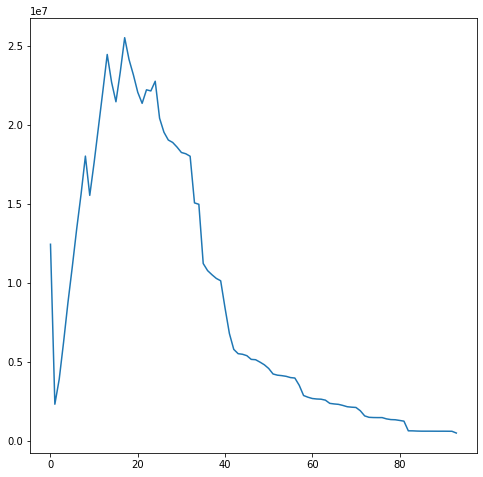

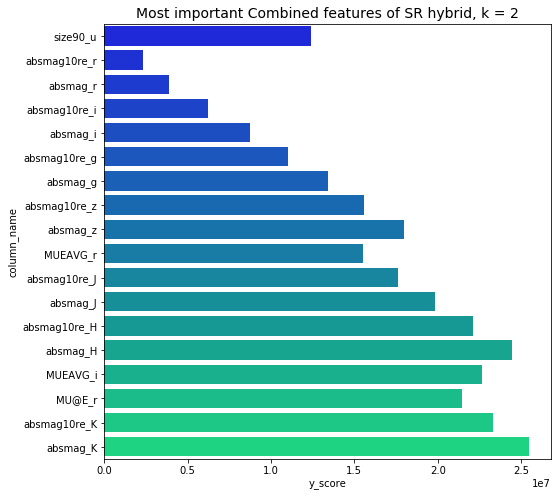

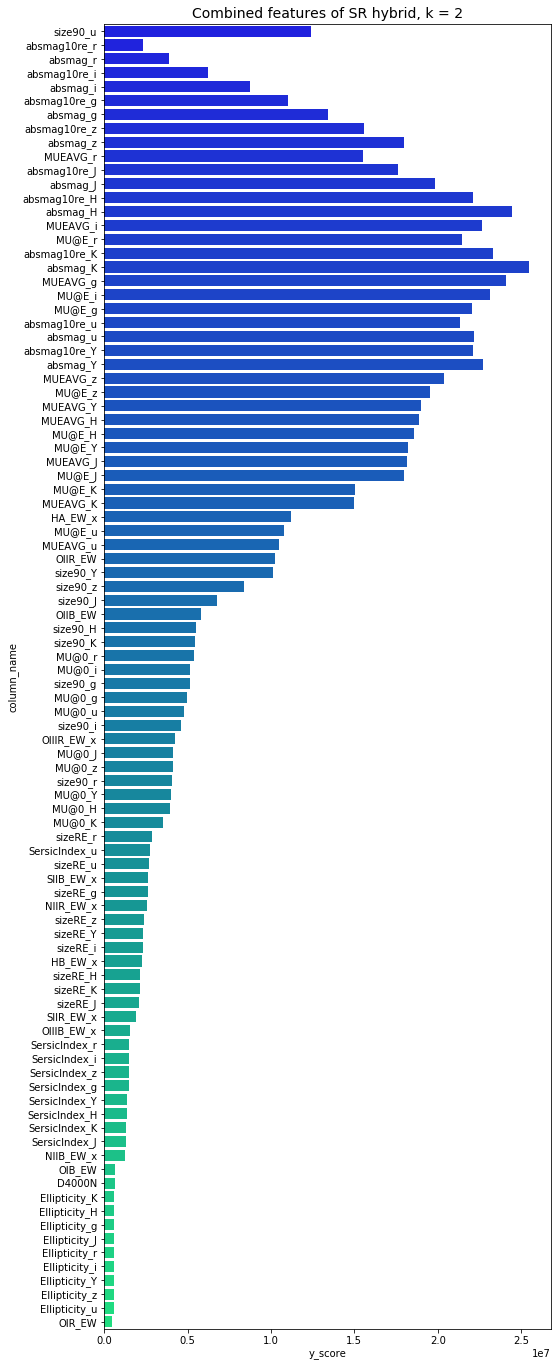

New SR file requested
Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 3,
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = Combined, filtered by EIF = 547 
feature number: 1, y= 17709431.67
feature number: 2, y= 3840196.10
feature number: 3, y= 5100272.41
feature number: 4, y= 6312008.74
feature number: 5, y= 7904040.39
feature number: 6, y= 10224843.89
feature number: 7, y= 12717752.95
feature number: 8, y= 15009065.35
feature number: 9, y= 17587889.87
feature number: 10, y= 13860142.59
feature number: 11, y= 15908231.44
feature number: 12, y= 18144353.87
feature number: 13, y= 20412940.13
feature number: 14, y= 22759444.91
feature number: 15, y= 20027440.50
feature number: 16, y= 18226424.97
feature number: 17, y= 20026504.01
feature number: 18, y= 22069420.73
feature number: 19, y= 20265770.62
feature number: 20, y= 19000499.32
feature number: 21, y

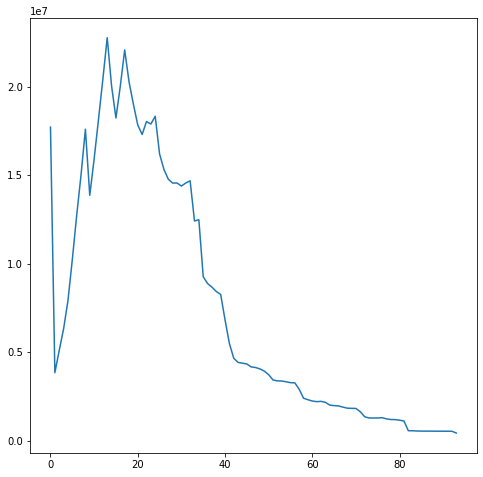

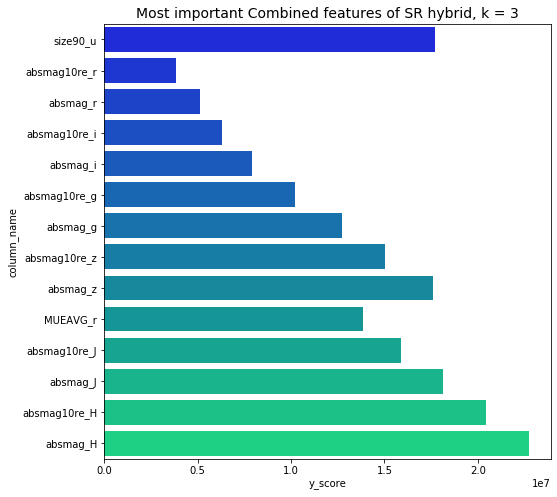

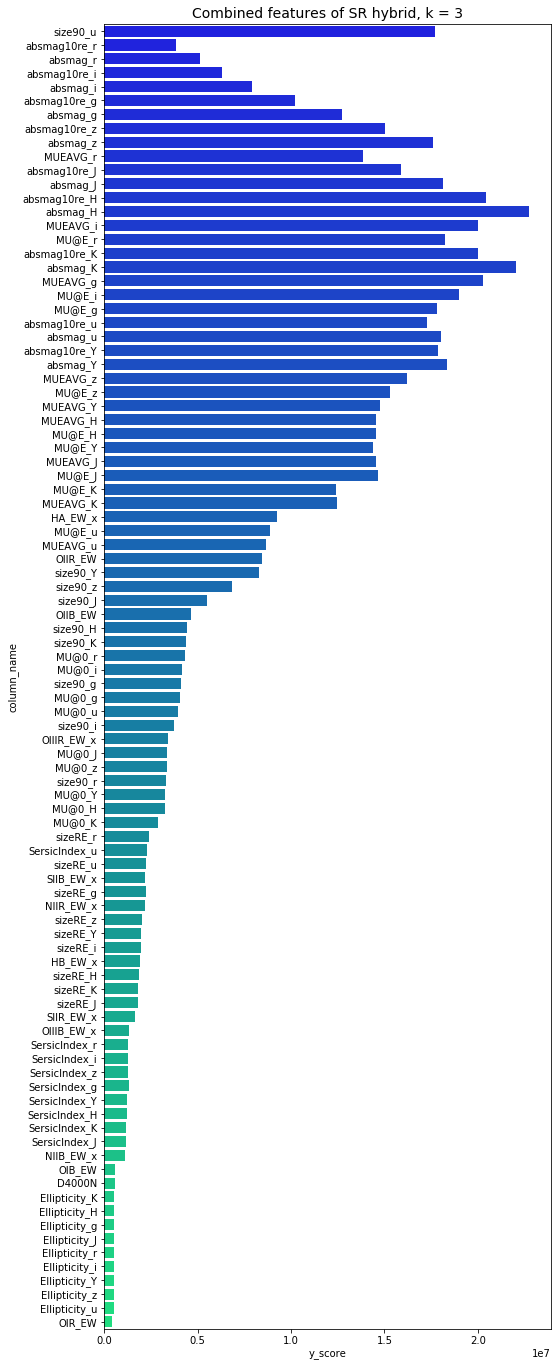

(     column_name     y_score
 0       size90_u  17709432.0
 1   absmag10re_r   3840196.0
 2       absmag_r   5100272.5
 3   absmag10re_i   6312008.5
 4       absmag_i   7904040.5
 5   absmag10re_g  10224844.0
 6       absmag_g  12717753.0
 7   absmag10re_z  15009065.0
 8       absmag_z  17587890.0
 9       MUEAVG_r  13860143.0
 10  absmag10re_J  15908231.0
 11      absmag_J  18144354.0
 12  absmag10re_H  20412940.0
 13      absmag_H  22759444.0,
       column_name       y_score
 0        size90_u  1.770943e+07
 1    absmag10re_r  3.840196e+06
 2        absmag_r  5.100272e+06
 3    absmag10re_i  6.312009e+06
 4        absmag_i  7.904040e+06
 ..            ...           ...
 89  Ellipticity_i  5.371219e+05
 90  Ellipticity_Y  5.371683e+05
 91  Ellipticity_z  5.347293e+05
 92  Ellipticity_u  5.328621e+05
 93         OIR_EW  4.337551e+05
 
 [94 rows x 2 columns])

In [16]:
plot_SR(combi_eif, 2, remake = remake)
plot_SR(combi_eif, 3, remake = remake)

In [5]:
phot_eif

absmag_u  absmag10re_u     size90_u    sizeRE_u  SersicIndex_u  \
3897936 -19.221774    -19.221774    10.018002    6.649348         0.1991   
3616632 -17.734847    -17.734841    10.906121    4.514885         1.1003   
3897076 -19.579603    -19.579603     7.903233    5.810092         0.0545   
586643  -18.757372    -18.757372     9.933930    6.035578         0.3291   
3877479 -18.975541    -18.975505    14.438808    5.696244         1.2222   
...            ...           ...          ...         ...            ...   
267389  -20.256717    -20.101451  1054.945329   75.366361         9.2085   
266467  -19.350528    -19.350528     6.672304    3.051508         0.8661   
535590  -19.291077    -19.287554    21.646799    6.506160         2.0167   
49052   -20.830477    -20.689333  2118.946208  170.418659         8.4251   
342440  -21.739195    -21.616027  2129.974328  198.454384         7.4999   

         Ellipticity_u     MU@0_u     MU@E_u   MUEAVG_u   absmag_g  ...  \
3897936         0.5565  22.977316  23.133305  23.020800 -20.412998  ...   
3616632         0.6749  22.059444  24.098173  23.355455 -19.255155  ...   
3897076         0.5496  22.323793  22.324944  22.323906 -20.470879  ...   
586643          0.6155  22.885502  23.285877  23.037878 -19.860735  ...   
3877479         0.6947  21.015587  23.317741  22.524952 -20.099840  ...   
...                ...        ...        ...        ...        ...  ...   
267389          0.6318   9.077412  28.712690  26.877811 -19.493833  ...   
266467          0.2624  20.699888  22.233662  21.601990 -20.429492  ...   
535590          0.6619  19.466045  23.489147  22.449205 -19.864512  ...   
49052           0.7879  11.612823  29.547085  27.759708 -20.372726  ...   
342440          0.7354  12.875299  28.800678  27.075342 -20.505821  ...   

          MUEAVG_H   absmag_K  absmag10re_K   size90_K  sizeRE_K  \
3897936  19.704445 -21.495974    -21.495970  10.282653  4.330526   
3616632  19.809650 -20.828911    -20.828247  11.505470  3.975038   
3897076  18.571341 -21.537159    -21.536668  10.712046  3.770192   
586643   19.827875 -20.592116    -20.591969  10.849379  4.061567   
3877479  18.820061 -21.409475    -21.409377   9.882258  3.764298   
...            ...        ...           ...        ...       ...   
267389   20.600012 -18.905145    -18.905145   3.073435  2.273172   
266467   23.579823 -20.589362    -20.571967   4.437520  1.040303   
535590   18.646683 -20.542231    -20.542231   9.178214  3.951576   
49052    18.687716 -22.085311    -22.082679   9.989251  3.094206   
342440   20.266790 -21.292925    -21.292925  10.389347  5.763653   

         SersicIndex_K  Ellipticity_K     MU@0_K     MU@E_K   MUEAVG_K  
3897936         1.0582         0.2863  18.331154  20.278980  19.554663  
3616632         1.5872         0.4684  17.749567  20.841757  19.921549  
3897076         1.5336         0.6275  16.413286  19.389376  18.486128  
586643          1.3613         0.6044  17.979780  20.582836  19.737951  
3877479         1.3145         0.6525  16.967710  19.469500  18.641598  
...                ...            ...        ...        ...        ...  
267389          0.0423         0.8701  18.947285  18.947466  18.947300  
266467          2.9003         0.9333   9.854888  15.794829  14.569179  
535590          1.0052         0.7670  17.962004  19.795462  19.095211  
49052           1.9198         0.2777  15.496332  19.309336  18.294210  
342440          0.4803         0.3777  19.948133  20.659361  20.277052  

[24473 rows x 81 columns]

In [27]:
dataset = "Alpha"
def cormat(dataframe,annotstate=False):
    global teller
    corrmat = dataframe.corr()
    #top_corr_features = corrmat.index
    plt.figure(figsize=(12,10))
    #plot heat map
    sns.heatmap(corrmat,annot=annotstate, vmin = -1, vmax = 1, center = 0, cmap='coolwarm')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Dataset: %s, %i objects "%(dataset, dataframe.shape[0]),size=14)
    plt.savefig("pics/cormat_%s_%i"%(dataset,teller),bbox_inches="tight")
    teller += 1
    plt.show() 

teller = 0
cormat(contains(combi_eif,'absmag_'),True)
cormat(spec_eif,True)
#cormat(ds_eif)
cormat(combi_eif)
cormat(phot_eif)
cormat(contains(phot_eif,'SersicIndex'),True)
cormat(endswith(phot_eif,'r'),True)

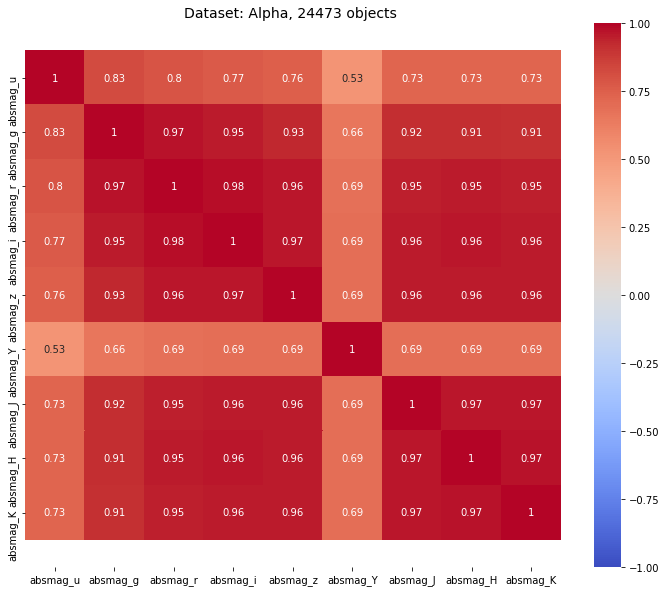

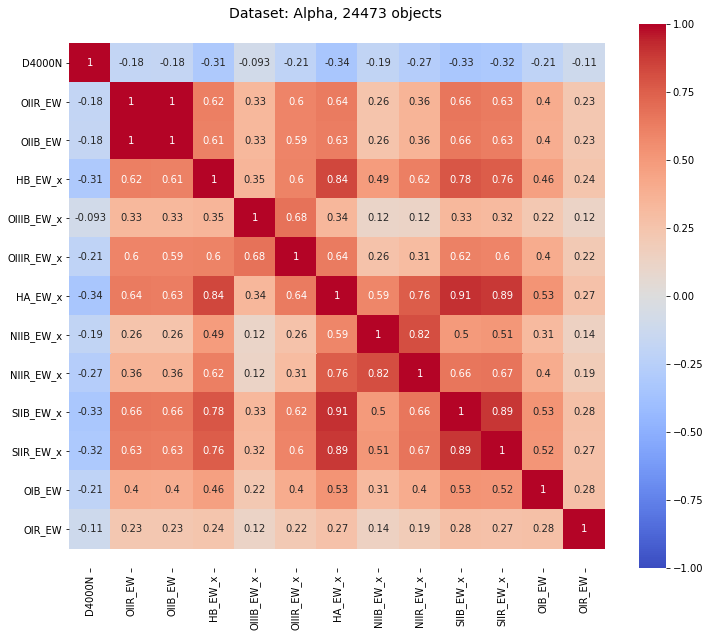

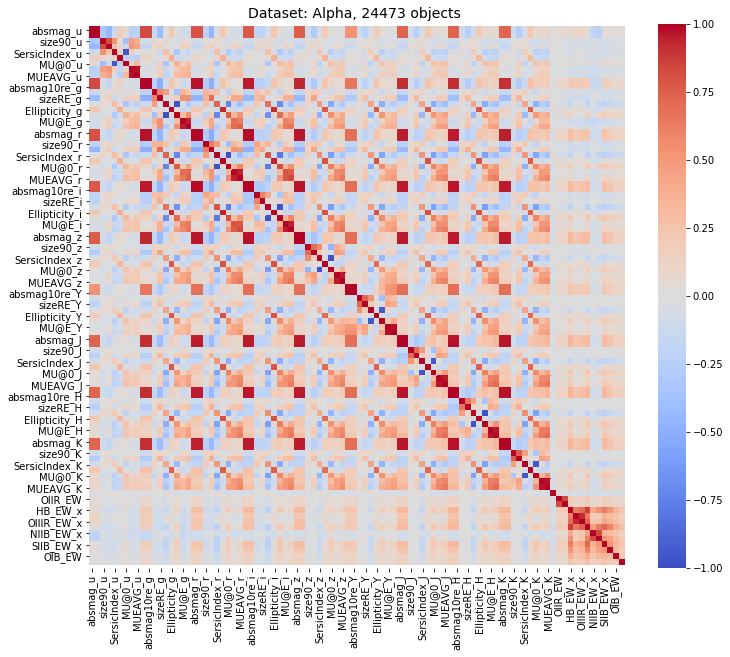

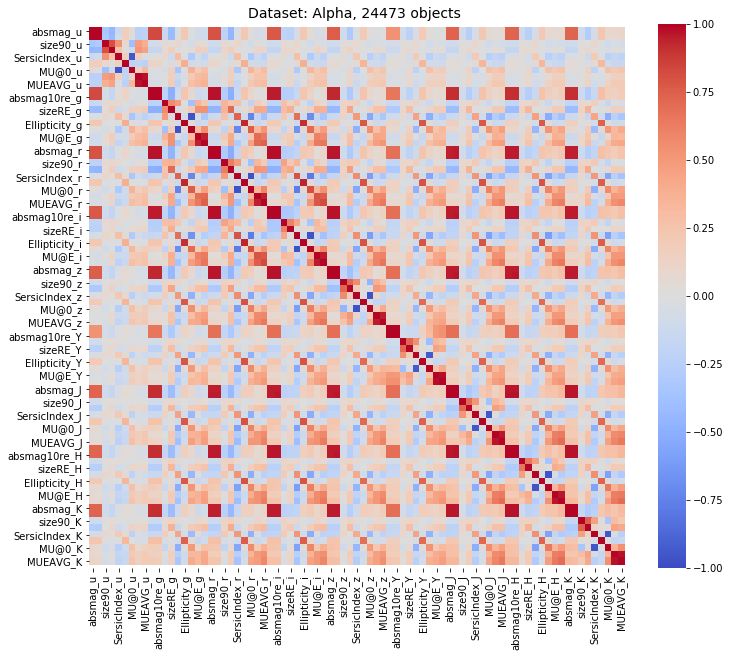

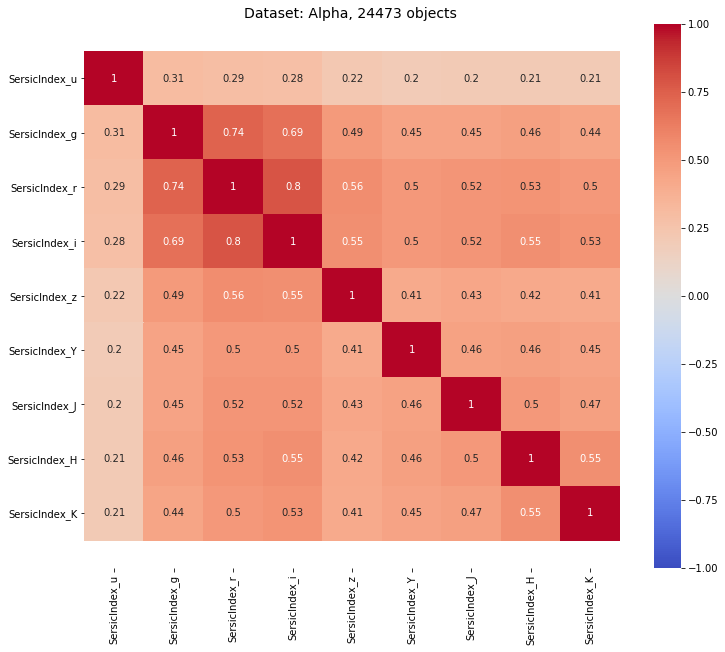

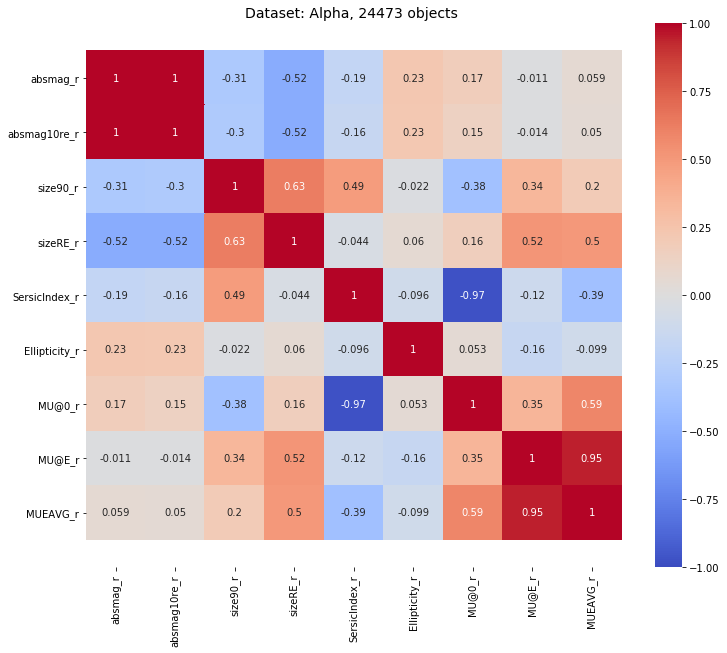

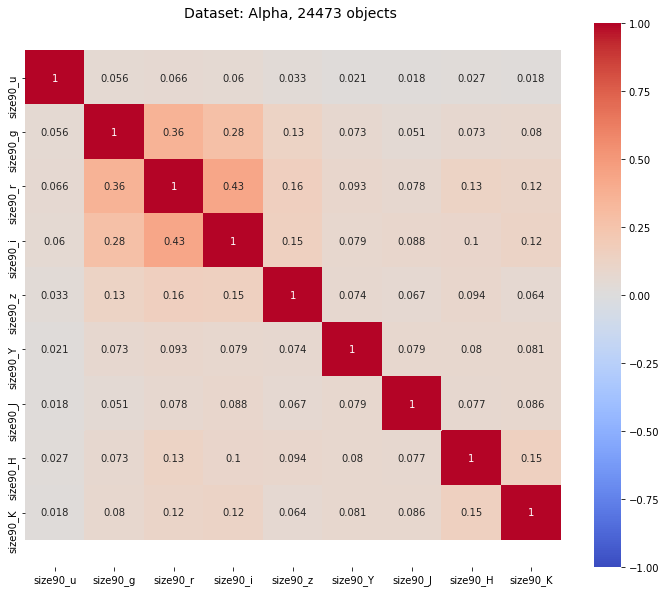

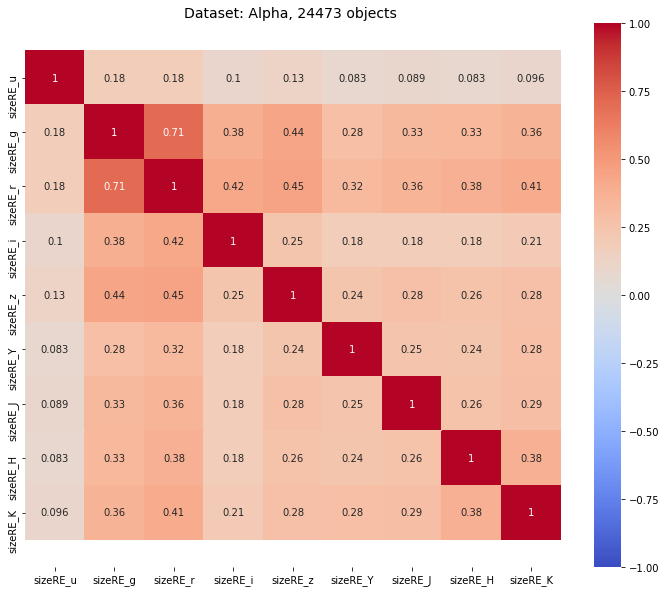

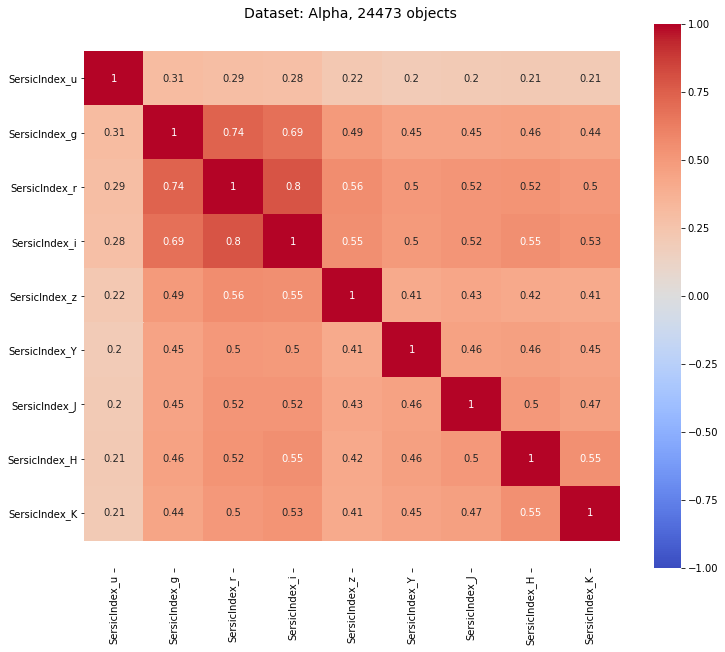

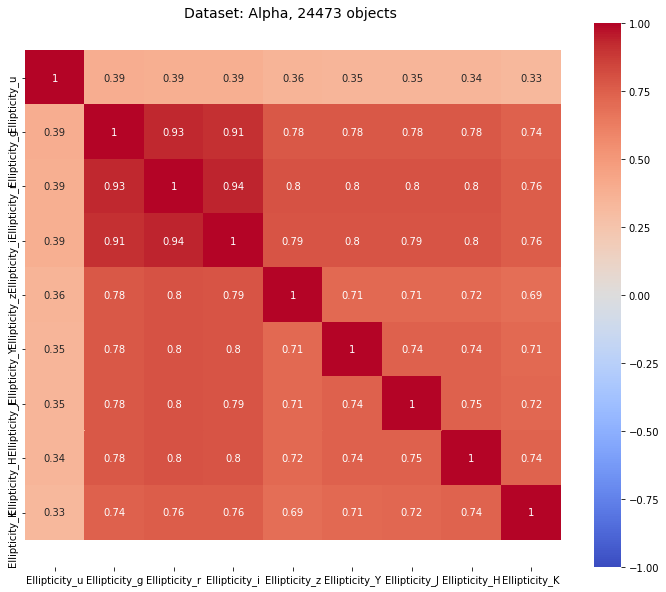

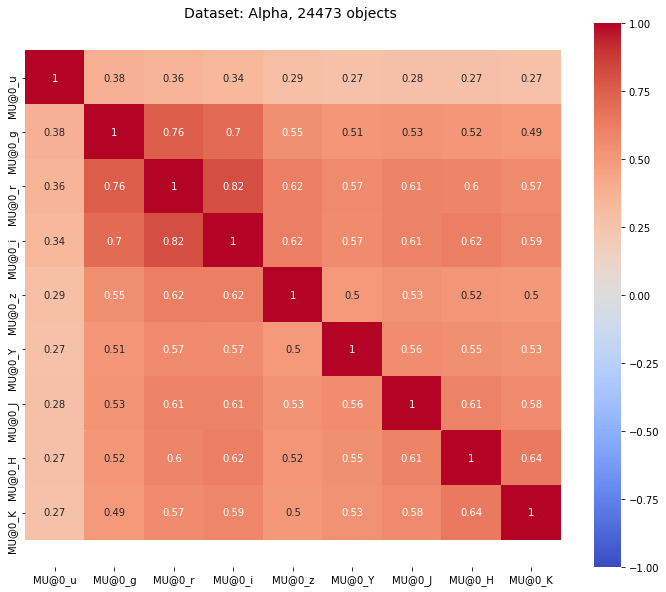

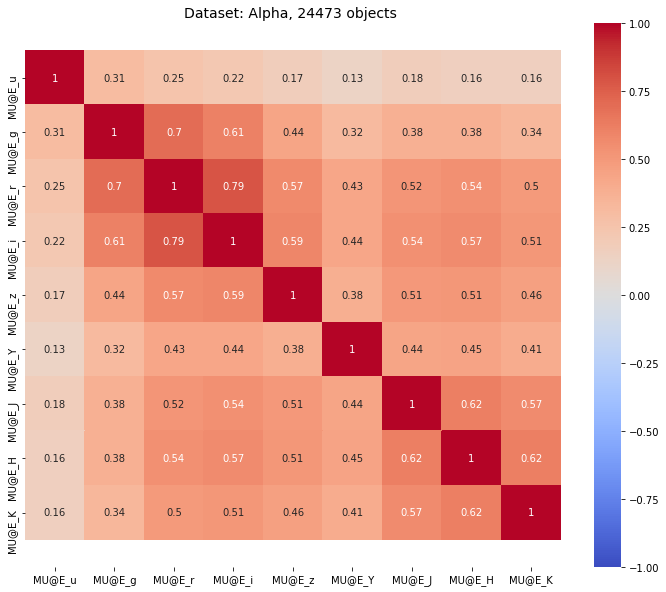

F:\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
F:\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


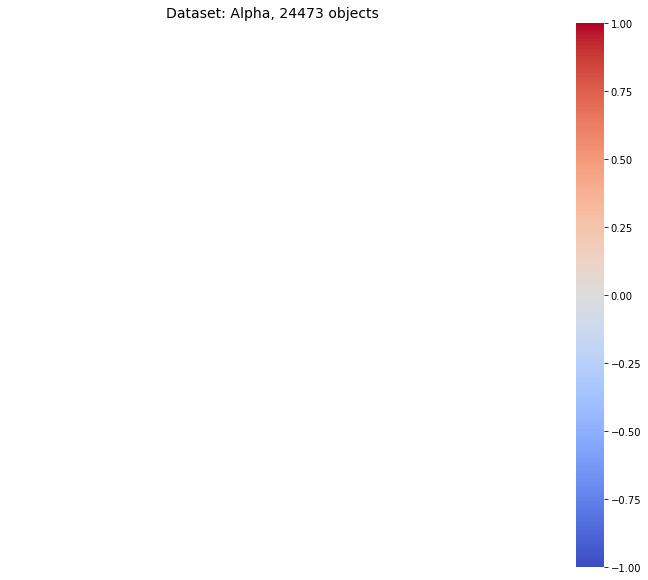

In [36]:
teller = 0
cormat(contains(combi_eif,'absmag_'),True)
cormat(spec_eif,True)
#cormat(ds_eif)
cormat(combi_eif)
cormat(phot_eif)
cormat(contains(phot_eif,'SersicIndex'),True)
cormat(endswith(phot_eif,'r'),True)


cormat(contains(combi_eif,'size90_'),True)
cormat(contains(combi_eif,'sizeRE_'),True)
cormat(contains(combi_eif,'Sersic'),True)
cormat(contains(combi_eif,'Ellipticity_'),True)
cormat(contains(combi_eif,'MU@0'),True)
cormat(contains(combi_eif,'MU@E'),True)
cormat(contains(combi_eif,'MUAVG'),True)

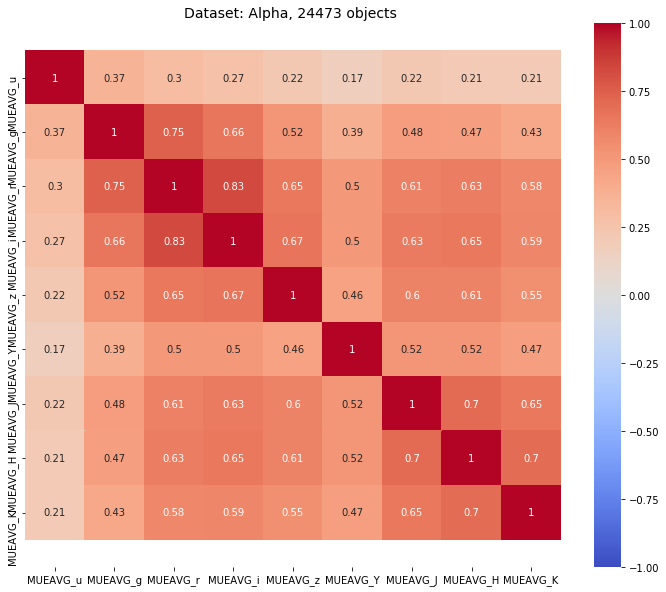

In [39]:
cormat(contains(combi_eif,'MUEAVG'),True)

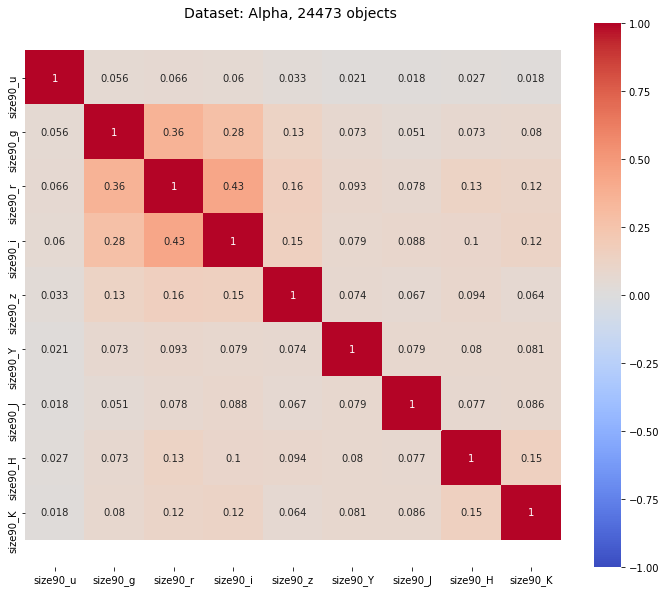

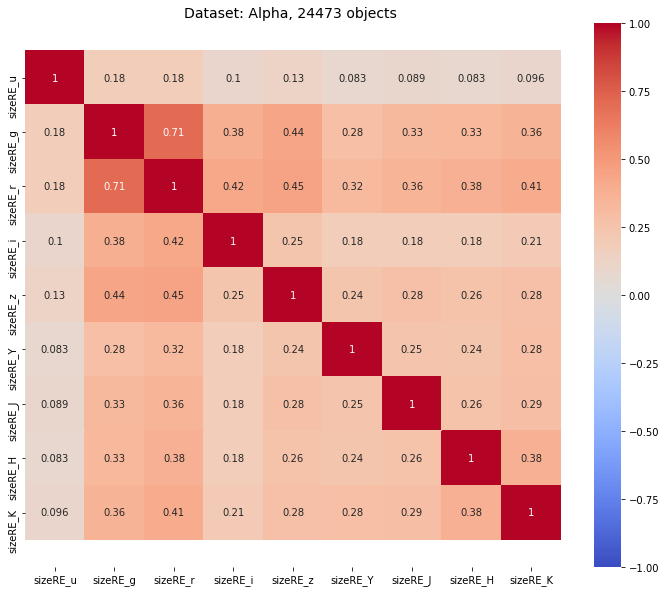

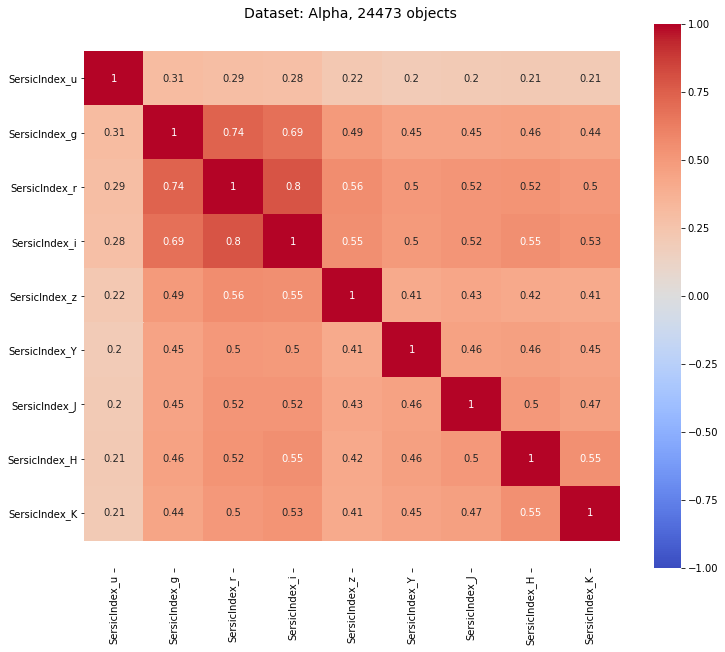

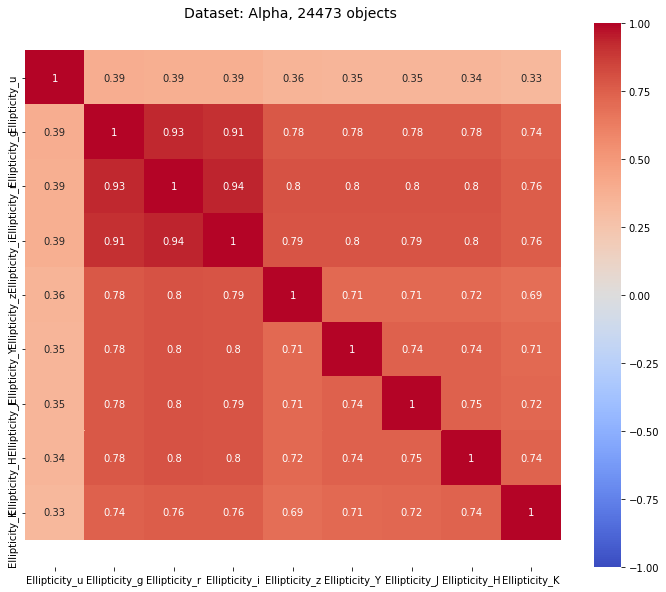

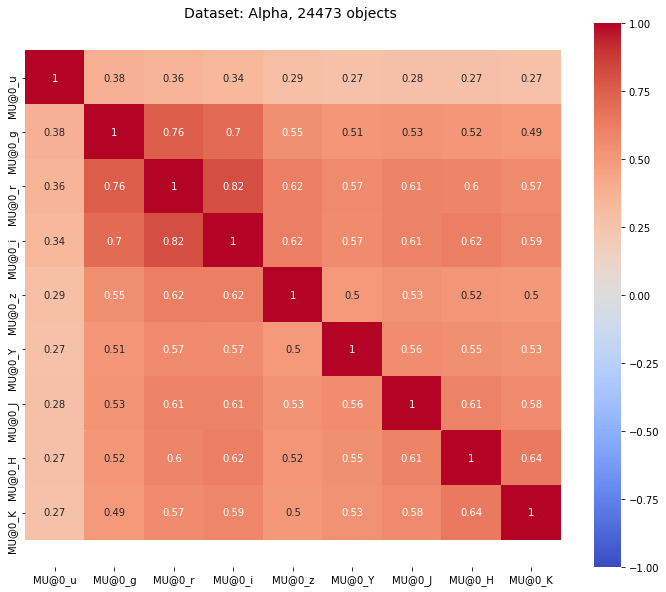

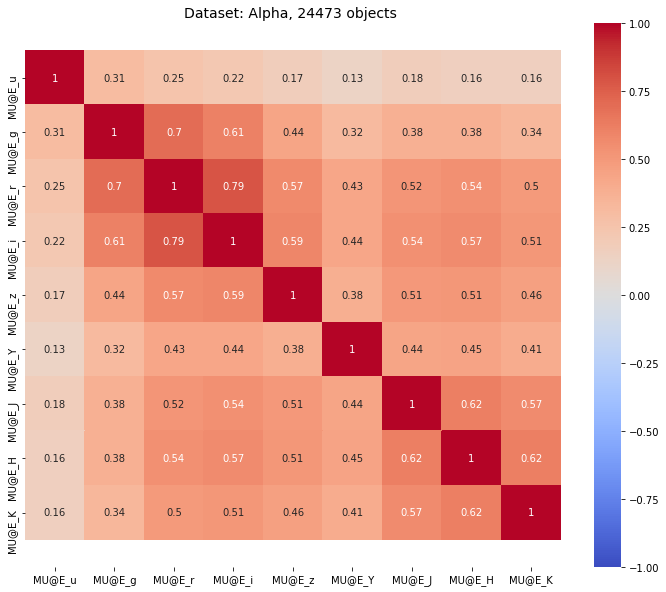

F:\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
F:\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


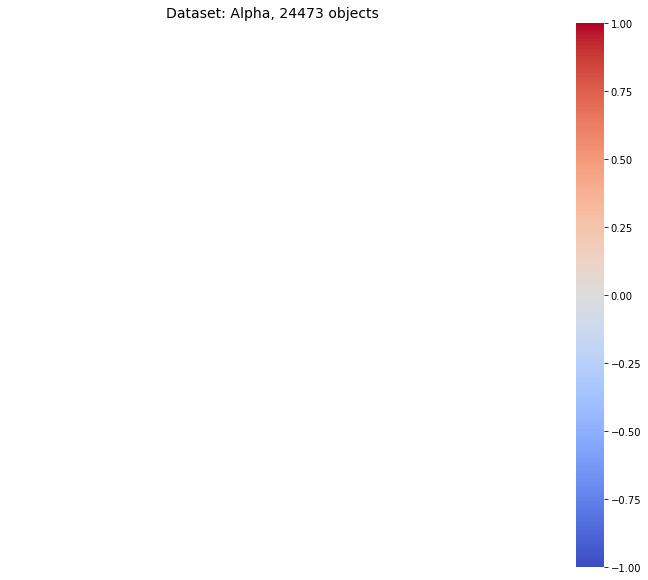

In [35]:

cormat(contains(combi_eif,'size90_'),True)
cormat(contains(combi_eif,'sizeRE_'),True)
cormat(contains(combi_eif,'Sersic'),True)
cormat(contains(combi_eif,'Ellipticity_'),True)
cormat(contains(combi_eif,'MU@0'),True)
cormat(contains(combi_eif,'MU@E'),True)
cormat(contains(combi_eif,'MUAVG'),True)

In [ ]:
# Old contents down here

In [4]:
def plot_SR(eif_df, k, remake = False):
    
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    short, long = SR_loader(eif_df, k, remake = remake)
    
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data = (long['y_score']))
    plt.savefig("pics/SR/yplot_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
      
    fig, ax = plt.subplots(figsize=(8,8))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("Most important %s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=short,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8,22))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("%s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=long,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_complete_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()

succes, Laplacian results found
settings: Dataset = epsilon, Dataframe = custom, filtered by EIF = 547 
feature number: 1, y= 0.00
feature number: 2, y= 262553.90
feature number: 3, y= 373707.40
feature number: 4, y= 380848.92
feature number: 5, y= 523148.47
feature number: 6, y= 548952.21
feature number: 7, y= 603054.47
feature number: 8, y= 739177.81
feature number: 9, y= 879328.98
feature number: 10, y= 981878.93
feature number: 11, y= 1108741.14
feature number: 12, y= 860451.87
feature number: 13, y= 773446.19
feature number: 14, y= 696369.70
feature number: 15, y= 692714.50
feature number: 16, y= 606135.45
feature number: 17, y= 608375.27
feature number: 18, y= 615763.56
feature number: 19, y= 596800.37
feature number: 20, y= 640683.04
feature number: 21, y= 659787.17
feature number: 22, y= 657220.09
feature number: 23, y= 685777.56
feature number: 24, y= 729724.55
feature number: 25, y= 684924.16
feature number: 26, y= 699268.45
feature number: 27, y= 684883.12
[0 0 0 ... 1 0 0]


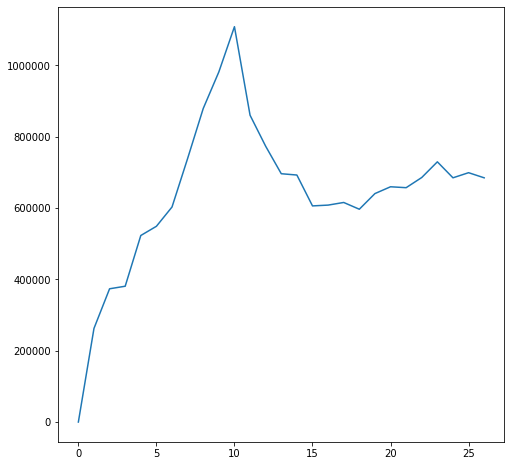

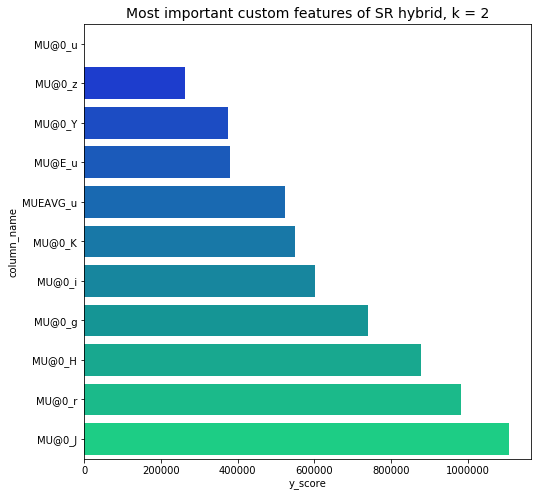

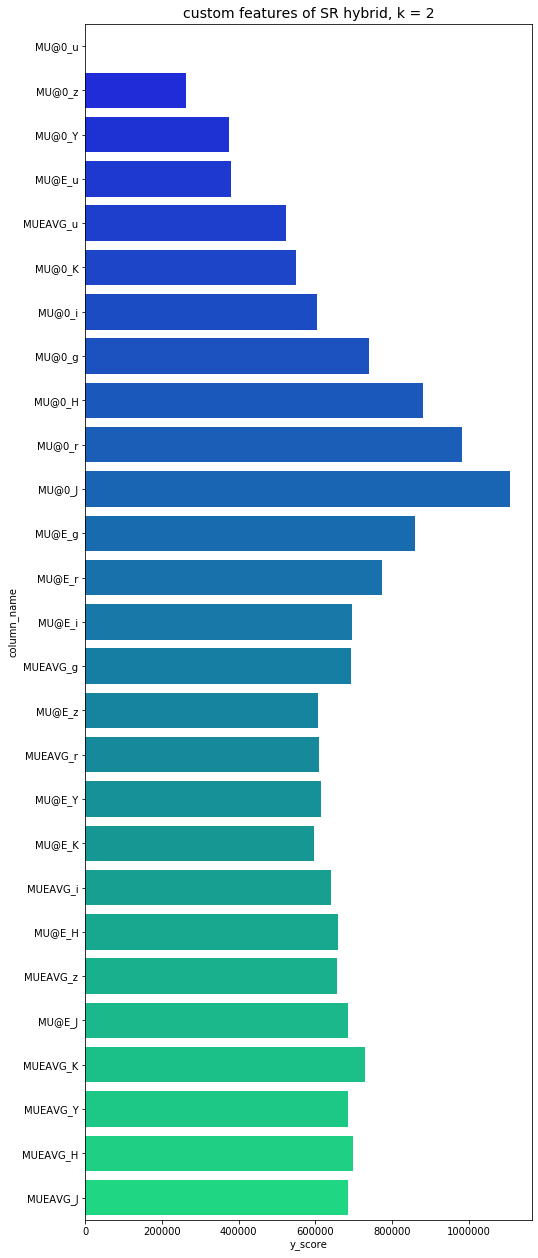

NameError: name 'plot_PFA2' is not defined

In [5]:
plot_SR(contains(phot_eif,'MU'),2)


In [15]:
def plot_PFA(eif_df, run_nr = 15, p_dif = 0, pov = 90, remake = False):
    """
    Parameters
    ----------
    eif_df : pandas dataframe
        This needs to befiltered with anomaly detection such as EIF already
    run_nr : Integer, optional
        Amount of runs to do. The default is 15.
    p_dif : int, optional
        p > q, slightly higher number of features is in some cases needed. The default is 0.
    pov : int, optional
        Retained variability in %. The default is 90.
    remake : Boolean, optional
        Set to True if you want to remake previously stored data. The default is False.

    Returns
    -------
    dataframe with column numbers of eif_df and occurence of these columns over all runs combined
    a bar plot showing the occurence parameters over run_nr runs. This plot has been adjusted to 
    only display parameters which occur atleast 0.10 * run_nr amount of times (10%)

    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    #    
        
    results_df = pfa2_loader(eif_df, run_nr = run_nr, p_dif = p_dif, pov = pov, remake = remake)   

    # -------------------------------------------------------------
    # We now have loaded (and if required created) a dataframe with results for n_list
    # If we want to change n_list, we must make sure it's saved and loaded by a new name, or replace the old
    sns.set(style="whitegrid")


    #Set up the variables
    results_top = results_df[results_df.iloc[:,1].values >= run_nr * 0.2]


    #    Setting up the size of the plot, dependant on the number of outputs 
    fig, ax = plt.subplots(figsize=(5, 10))

    #Do the actual plotting
    sns.barplot(x='occurence',y='column_name',data=results_top,palette ="dark")
    ax.set(xlim= [0,run_nr+1],xlabel="Occurence",ylabel = "Feature name")
    plt.title("Top %s features, %i runs, p_dif = %i, pov = %i" %(DF_name,run_nr,p_dif,pov),size='14')
    sns.despine(left=True, bottom=False)   #removes spines
    plt.savefig("pics/PFA/PFA2_%s_%i_%i_%i"%(DF_name,run_nr,p_dif,pov),bbox_inches="tight")
    plt.show()
    
    return results_df

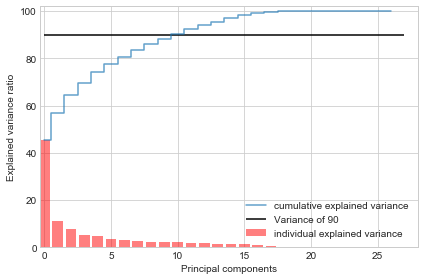

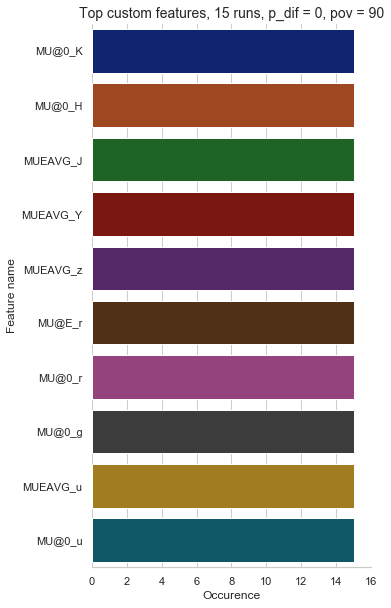

column_name  occurence
0      MU@0_K       15.0
1      MU@0_H       15.0
2    MUEAVG_J       15.0
3    MUEAVG_Y       15.0
4    MUEAVG_z       15.0
5      MU@E_r       15.0
6      MU@0_r       15.0
7      MU@0_g       15.0
8    MUEAVG_u       15.0
9      MU@0_u       15.0

In [16]:
plot_PFA(contains(phot_eif,'MU'))

# Correlation matrix code

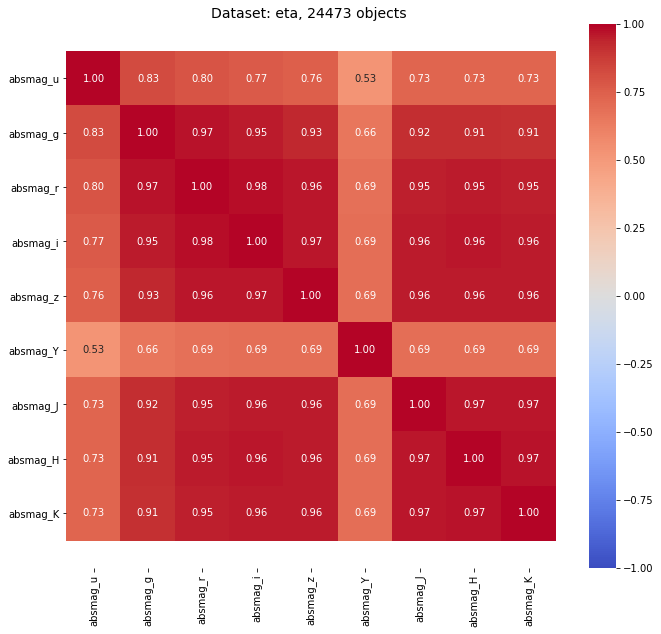

In [82]:
teller = 0

def cormat(dataframe,annotstate=False):
    global teller
    corrmat = dataframe.corr()
    #top_corr_features = corrmat.index
    plt.figure(figsize=(12,10))
    #plot heat map
    heatmap = sns.heatmap(corrmat,annot=annotstate, vmin = -1, vmax = 1, center = 0, 
                cmap='coolwarm',fmt=".2f",square=True)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Dataset: %s, %i objects "%(dataset, dataframe.shape[0]),size=14)
    plt.savefig("pics/cormat_%s_%i"%(dataset,teller),bbox_inches="tight")
    teller += 1
    plt.show()

cormat(contains(combi_eif,'absmag_'),True)

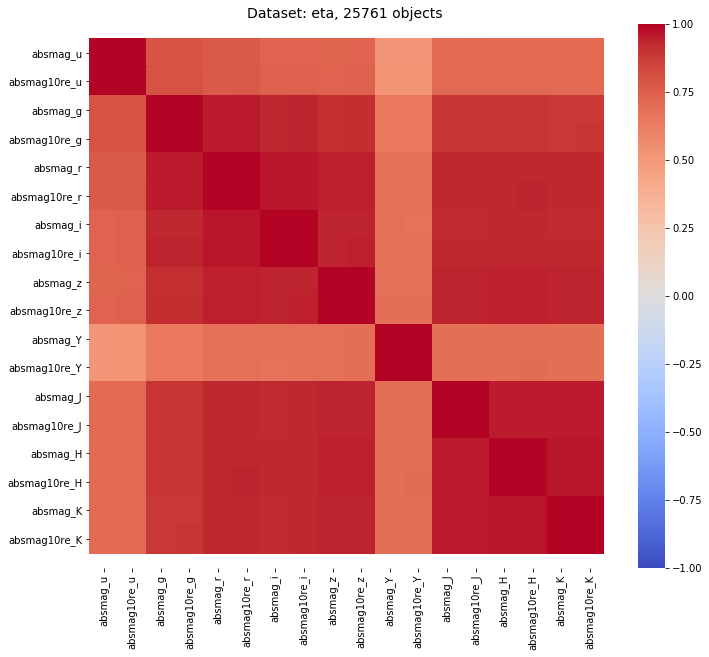

In [6]:
cormat(contains(full,'absmag'))

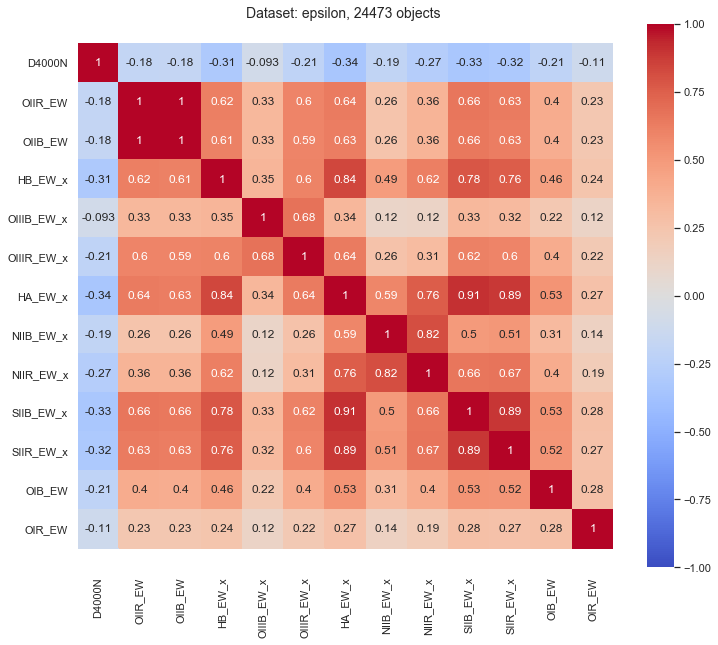

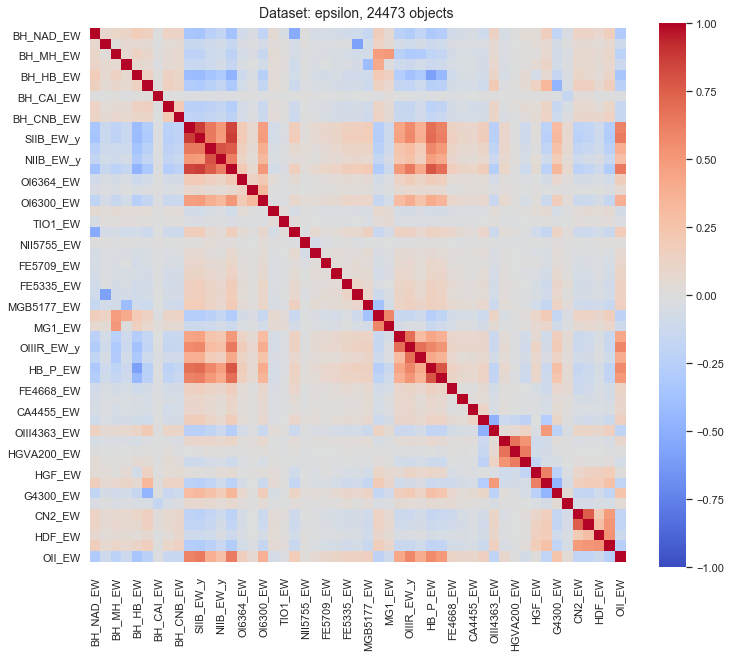

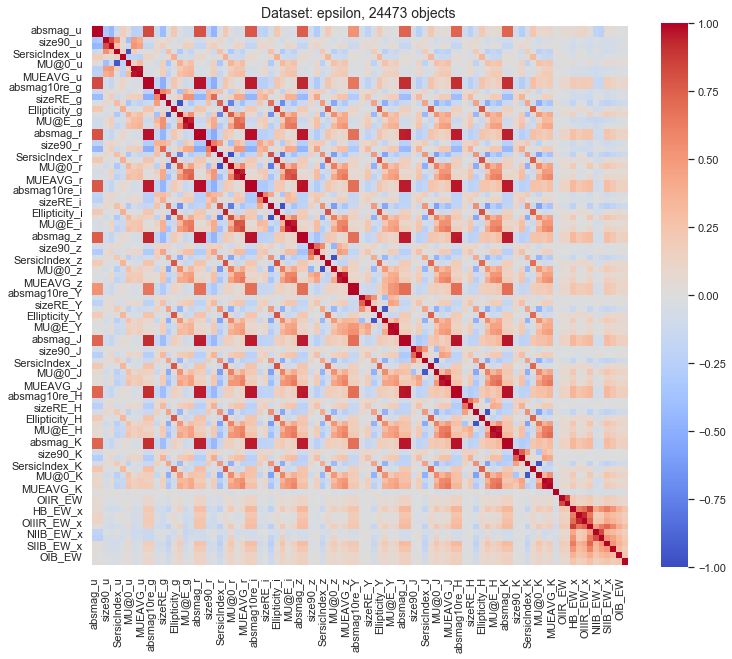

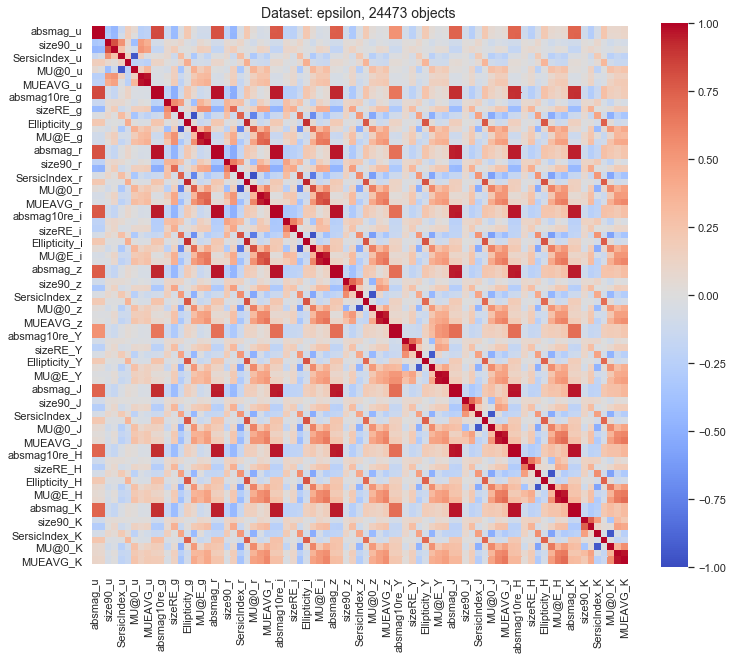

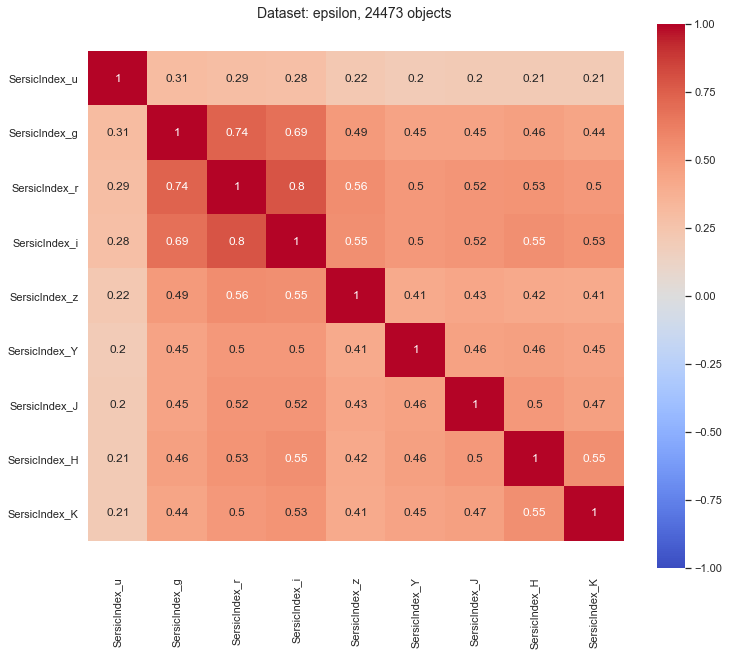

In [7]:
cormat(spec_eif,True)
cormat(ds_eif)
cormat(combi_eif)
cormat(phot_eif)
cormat(contains(phot_eif,'SersicIndex'),True)

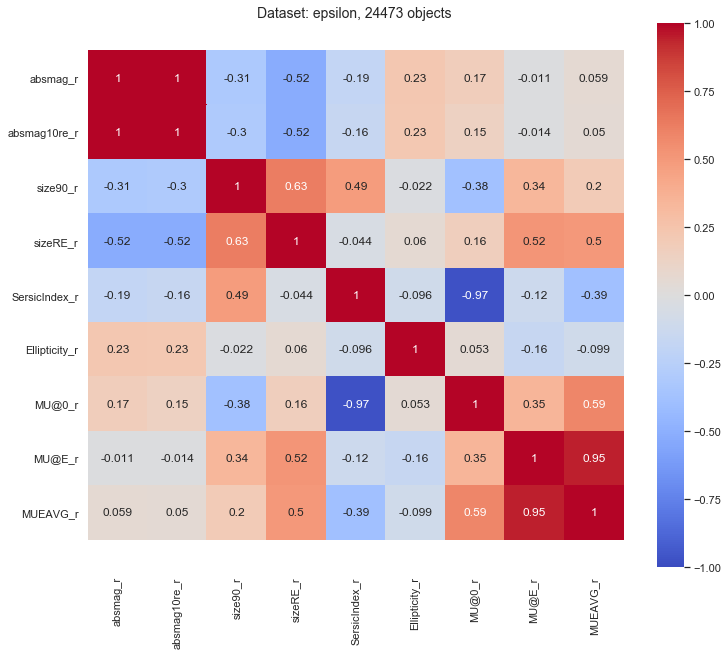

In [9]:
cormat(endswith(phot_eif,'r'),True)

# PFA code

In [11]:
## PFA addaptation, does not safe, extra graphs, quick and easy setup

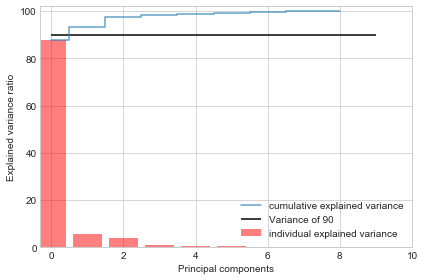

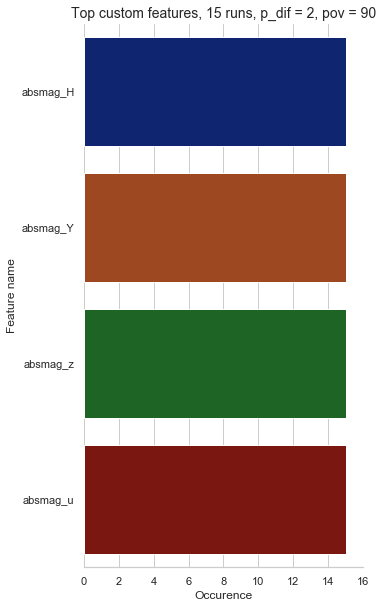

column_name  occurence
0    absmag_H       15.0
1    absmag_Y       15.0
2    absmag_z       15.0
3    absmag_u       15.0

In [3]:
PFA2_plot(contains(phot_eif,'absmag_'),p_dif=2)

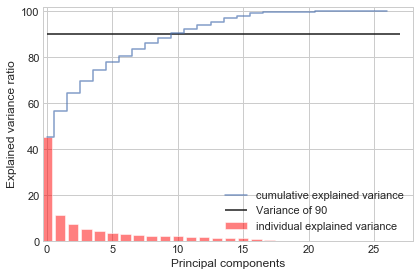

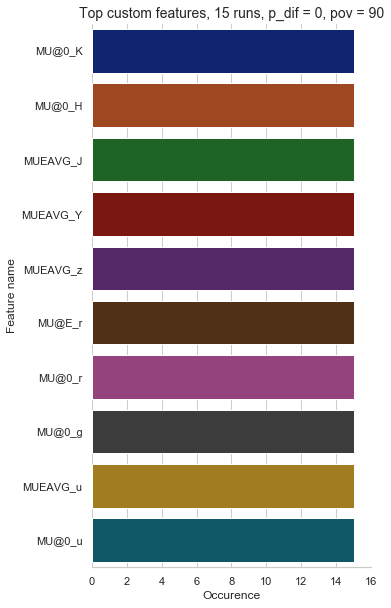

column_name  occurence
0      MU@0_K       15.0
1      MU@0_H       15.0
2    MUEAVG_J       15.0
3    MUEAVG_Y       15.0
4    MUEAVG_z       15.0
5      MU@E_r       15.0
6      MU@0_r       15.0
7      MU@0_g       15.0
8    MUEAVG_u       15.0
9      MU@0_u       15.0

In [4]:
PFA2_plot(contains(phot_eif,'MU'),p_dif=0)

In [92]:
full

RA      DEC         Z    Distance   absmag_u  absmag10re_u  \
CATAID                                                                        
6802     174.005997  0.72093  0.050529  216.124754 -16.498930    -16.498930   
6830     174.280500  0.70608  0.114022  480.743251 -20.563993    -20.445307   
6837     174.302750  0.78998  0.074283  316.042533 -18.530791    -18.530265   
6838     174.305540  0.79034  0.074549  317.154217 -17.886899    -17.877645   
6839     174.335370  0.83656  0.106638  450.375932 -18.298163    -18.298163   
...             ...      ...       ...         ...        ...           ...   
3901701  132.727790 -1.04692  0.103069  435.655876 -18.664665    -18.618874   
3901702  132.732080 -1.04799  0.197850  817.906867 -19.268692    -19.268688   
3901768  132.706580 -0.97609  0.188094  779.391965 -19.220608    -19.220547   
3973288  183.976170  0.08631  0.040766  174.746045 -15.955128    -15.955128   
4348349  180.767580 -0.12518  0.122590  515.847185 -19.834584    -19.560269   

            size90_u    sizeRE_u  SersicIndex_u  Ellipticity_u  ...  \
CATAID                                                          ...   
6802        1.693470    1.217394       0.089800         0.6091  ...   
6830     1573.234621  151.985781       7.280300         0.3254  ...   
6837       13.819605    4.843815       1.545500         0.6322  ...   
6838       24.967339    6.598801       2.455100         0.8897  ...   
6839        9.534485    5.777714       0.333200         0.5407  ...   
...              ...         ...            ...            ...  ...   
3901701    25.032558    4.385122       4.128400         0.0564  ...   
3901702    15.627759    6.619197       1.044400         0.6740  ...   
3901768    21.666105    8.399797       1.267700         0.5981  ...   
3973288     3.670465    2.476511       0.176500         0.6153  ...   
4348349   488.672999   10.676909      18.924101         0.0885  ...   

         HGVA125_EW    HGF_EW     HGA_EW  G4300_EW  CA4227_EW    CN2_EW  \
CATAID                                                                    
6802       0.196930  1.659956   2.376555 -7.079205   0.294137  0.228589   
6830       0.096942 -3.308804  -0.873673 -0.850715  -1.320217 -0.030753   
6837       0.084154 -1.563378  -3.370488  4.110785   1.398956 -0.042376   
6838       0.191652 -7.249705  -5.492196 -2.449695   0.602401 -0.045479   
6839       0.055273 -0.616201  -0.107329 -6.215616  -2.410805 -0.028316   
...             ...       ...        ...       ...        ...       ...   
3901701    0.046349  3.429878  10.539323 -2.207531  -2.036244  0.202093   
3901702    0.002959 -0.860333  -1.444047 -3.095410  -1.426697 -0.150364   
3901768    0.072656 -0.881421  -0.387746 -3.123395  -1.092533 -0.005144   
3973288   -0.045059 -1.738272  -4.616337 -0.944286  -2.863228 -0.327484   
4348349    0.186656 -4.507819  -6.217108  4.976990  -0.557075 -0.113801   

           CN1_EW    HDF_EW    HDA_EW     OII_EW  
CATAID                                            
6802     0.115305 -0.445192  5.106353  22.621220  
6830    -0.032678 -4.939517 -3.480545  17.085100  
6837    -0.055087 -2.672220 -1.597525  31.437363  
6838    -0.041801 -3.263513 -1.605200   4.142478  
6839    -0.021249 -4.233356 -1.318381  13.022843  
...           ...       ...       ...        ...  
3901701  0.172480 -0.988949  2.130985  -2.327094  
3901702 -0.155667 -3.683531 -5.019410  10.128104  
3901768 -0.081116 -3.093034 -5.734492  10.064606  
3973288 -0.274016 -4.335427 -6.318155 -52.405647  
4348349 -0.131431 -4.161293 -3.643025   5.006920  

[25761 rows x 149 columns]

Text(0, 0.5, 'Frequency')

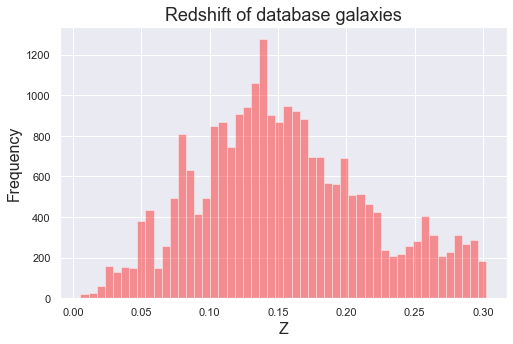

In [89]:
plt.figure(figsize=(8, 5))
sns.distplot(full_eif['Z'],color='red',kde=False)
plt.title('Redshift of database galaxies', fontsize=18)
plt.xlabel('Z', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

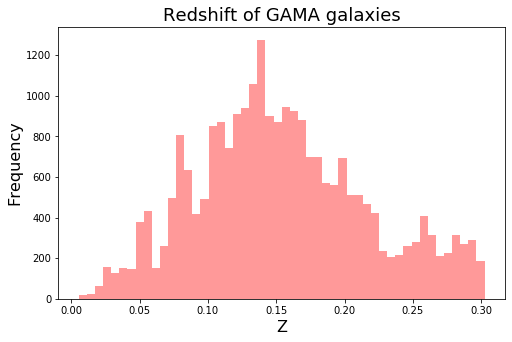

In [84]:
plt.figure(figsize=(8, 5))
sns.distplot(full_eif['Z'],color='red',kde=False)
plt.title('Redshift of GAMA galaxies', fontsize=18)
plt.xlabel('Z', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [4]:
ra, dec = full_eif['RA'].values, full_eif['DEC'].values
ra

array([217.15546, 216.42629, 216.21671, ..., 223.39721, 176.09767,
       184.22387])

Text(0, 0.5, 'DEC (J2000)')

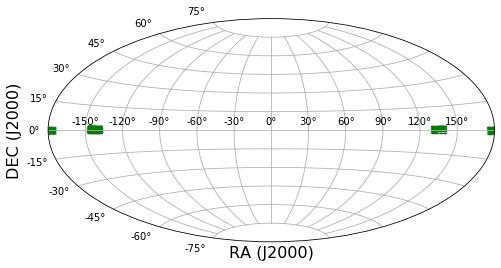

In [14]:
from astropy.coordinates import SkyCoord
import astropy.units as u
gal = SkyCoord(ra[:], dec[:], frame='icrs', unit=u.deg)
plt.figure(figsize=(8,5))
ax = plt.subplot(111, projection='aitoff')
#ax.set_ylim([-25.,90.])
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian, gal.dec.radian,alpha=0.01,color ='g',s=1)
#plt.title('Aitoff projection of our galaxies \n ', fontsize=18)
plt.xlabel('RA (J2000)', fontsize=16)
plt.ylabel('DEC (J2000)', fontsize=16)

In [53]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mollweide Projection")
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [69]:
import ligo.skymap.plot
from matplotlib import pyplot as plt
ax = plt.axes(projection='geo aitoff')
ax.grid()

ModuleNotFoundError: No module named 'ligo'

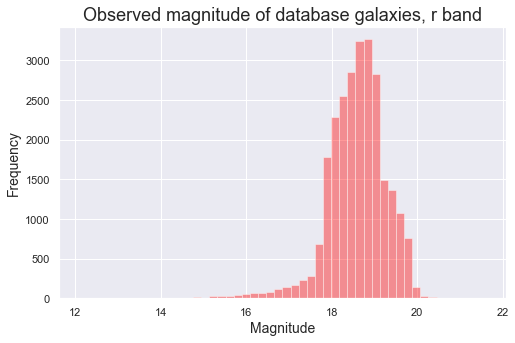

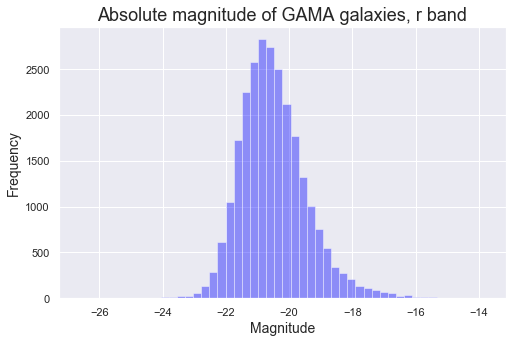

In [91]:
SDSS = pandafy('D:\Onedrive\\Thesis\\fits\SersicCatSDSS.fits')
mags = pd.merge(SDSS['GALMAG_r'],full['absmag_r'], right_index=True, left_index=True, how='inner')
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))
sns.distplot(mags['GALMAG_r'],color='red',kde=False)
plt.title('Observed magnitude of database galaxies, r band', fontsize=18)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
plt.figure(figsize=(8, 5))
sns.distplot(mags['absmag_r'],color='blue',kde=False)
plt.title('Absolute magnitude of GAMA galaxies, r band', fontsize=18)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [76]:
[SDSS['GALMAG_r']>-9999]

CATAID
6802       18.735399
6803       19.289101
6804       19.376101
6805       19.302401
6806       18.608400
             ...    
4342359    20.661600
4345057    20.927500
4345978    20.652901
4347483    20.574699
4348349    17.756800
Name: GALMAG_r, Length: 219663, dtype: float32

GALMAG_r   absmag_r
CATAID                       
6802     18.735399 -18.054212
6830     19.055500 -19.497671
6837     17.828899 -19.825506
6838     18.708401 -19.007689
6839     18.419001 -20.036111
...            ...        ...
3901701  17.827600 -20.575834
3901702  18.586000 -21.221239
3901768  18.982201 -20.704462
3973288  18.008101 -18.311698
4348349  17.756800 -20.959510

[25761 rows x 2 columns]

ValueError: cannot reshape array of size 1 into shape (2)

F:\Anaconda3\lib\site-packages\mpl_toolkits\axisartist\clip_path.py:30: RuntimeWarning: invalid value encountered in less
  b = (x < x0).astype("i")


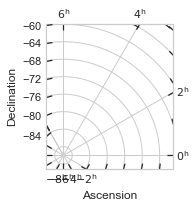

In [67]:
"""
An experimental support for curvilinear grid.
"""
import numpy as np
import  mpl_toolkits.axisartist.angle_helper as angle_helper
import matplotlib.cm as cmap
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D

from mpl_toolkits.axisartist import SubplotHost

from mpl_toolkits.axisartist import GridHelperCurveLinear


def curvelinear_test2(fig, rect=111):
    """
    polar projection, but in a rectangular box.
    """

    # see demo_curvelinear_grid.py for details
    tr = Affine2D().translate(0,90) + Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(10, 60,
                                                     lon_cycle = 360,
                                                     lat_cycle = None,
                                                     lon_minmax = None,
                                                     lat_minmax = (-90, np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorHMS(12) #changes theta gridline count
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )


    ax1 = SubplotHost(fig, rect, grid_helper=grid_helper)

    # make ticklabels of right and top axis visible.
    ax1.axis["right"].major_ticklabels.set_visible(True)
    ax1.axis["top"].major_ticklabels.set_visible(True)
    ax1.axis["bottom"].major_ticklabels.set_visible(True) #Turn off? 
    # let right and bottom axis show ticklabels for 1st coordinate (angle)
    ax1.axis["right"].get_helper().nth_coord_ticks=0
    ax1.axis["bottom"].get_helper().nth_coord_ticks=0



    fig.add_subplot(ax1)

    grid_helper = ax1.get_grid_helper()

    # You may or may not need these - they set the view window explicitly rather than using the
    # default as determined by matplotlib with extreme finder.
    ax1.set_aspect(1.)
    ax1.set_xlim(-4,25) # moves the origin left-right in ax1
    ax1.set_ylim(-3, 30) # moves the origin up-down

    ax1.set_ylabel('Declination')
    ax1.set_xlabel('Ascension')
    ax1.grid(True)
    #ax1.grid(linestyle='--', which='x') # either keyword applies to both
    #ax1.grid(linestyle=':', which='y')  # sets of gridlines

    return ax1,tr


def skip_comments(f):
    '''
    Read lines that DO NOT start with a # symbol.
    '''
    for line in f:
        if not line.strip().startswith('#'):
            yield line

def get_data_bb():
    '''RA, DEC data file.
    '''

    # Path to data file.
    out_file = 'bb_cat.dat'

    # Read data file
    with open(out_file) as f:
        ra, dec = [], []

        for line in skip_comments(f):
            ra.append(float(line.split()[0]))
            dec.append(float(line.split()[1]))

    return ra, dec


import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(5, 5))
fig.clf()

ax1, tr = curvelinear_test2(fig,121) # tr.transform_point((x, 0)) is always (0,0)
                            # => (theta, r) in but (r, theta) out...             

# Read RA, DEC data from file.
ra, dec = full_eif['RA'].values, full_eif['DEC'].values
out_test = tr.transform(zip(ra, dec))

# Use this block to generate colored points with a colorbar.
cm = plt.cm.get_cmap('RdYlBu_r')
z = np.random.random((len(ra), 1))  # RGB values

SC = ax1.scatter(out_test[:,0], #ax1 is a global
            out_test[:,1],
            marker = 'o',
            c=z,
            cmap=cm,
            lw = 0.,
            zorder=9) #on top of gridlines

# Colorbar
cbar = plt.colorbar(SC, shrink=1., pad=0.1)
cbar.ax.tick_params(labelsize=8)
cbar.set_label('colorbar', fontsize=8)

ax2, tr = curvelinear_test2(fig,122) # tr.transform_point((x, 0)) is always (0,0)
                            # => (theta, r) in but (r, theta) out...             

# Read RA, DEC data from file.
ra, dec = full_eif['RA'].values, full_eif['DEC'].values
out_test = tr.transform(zip(ra, dec))

# Use this block to generate colored points with a colorbar.
cm = plt.cm.get_cmap('RdYlBu_r')
z = np.random.random((len(ra), 1))  # RGB values

SC = ax2.scatter(out_test[:,0], #ax1 is a global
            out_test[:,1],
            marker = 'o',
            c=z,
            cmap=cm,
            lw = 0.,
            zorder=9) #on top of gridlines

# Colorbar
cbar = plt.colorbar(SC, shrink=1., pad=0.1)
cbar.ax.tick_params(labelsize=8)
cbar.set_label('colorbar', fontsize=8)

plt.show()

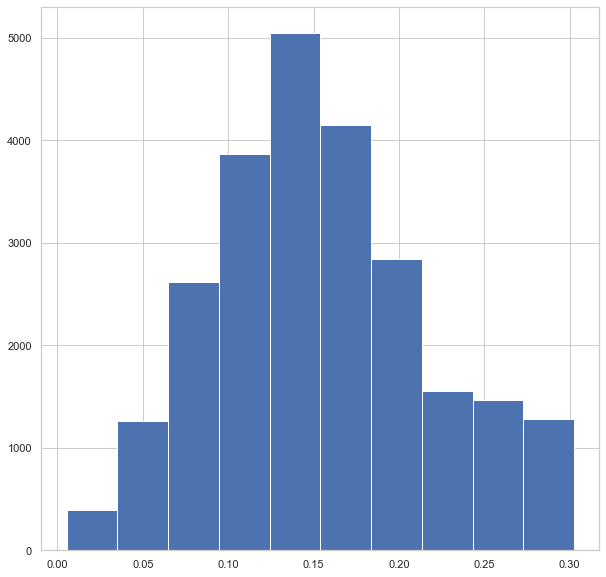

In [38]:
full_eif['Z'].hist(figsize = (10,10))

New laplacian file requested
Failed to find Laplacian results, creating database
27  remaining features
initial y_best: 711226.68, MUEAVG_J
Laplace rank: 26, new y_best: 727239.36, MUEAVG_H
Laplace rank: 25, MUEAVG_Y
Laplace rank: 24, new y_best: 761451.65, MUEAVG_K
Laplace rank: 23, MU@E_J
Laplace rank: 22, MUEAVG_z
Laplace rank: 21, MU@E_H
Laplace rank: 20, MUEAVG_i
Laplace rank: 19, MU@E_K
Laplace rank: 18, MU@E_Y
Laplace rank: 17, MUEAVG_r
Laplace rank: 16, MU@E_z
Laplace rank: 15, MUEAVG_g
Laplace rank: 14, MU@E_i
Laplace rank: 13, new y_best: 837900.04, MU@E_r
Laplace rank: 12, new y_best: 938676.89, MU@E_g
Laplace rank: 11, new y_best: 1219613.65, MU@0_J
Laplace rank: 10, MU@0_r
Laplace rank: 9, MU@0_H
Laplace rank: 8, MU@0_g
Laplace rank: 7, MU@0_i
Laplace rank: 6, MU@0_K
Laplace rank: 5, MUEAVG_u
Laplace rank: 4, MU@E_u
Laplace rank: 3, MU@0_Y
Laplace rank: 2, MU@0_z
Laplace rank: 1, new y_best: 3757357.24, MU@0_u
recursion
only one feature
succes, Laplacian results found
sett

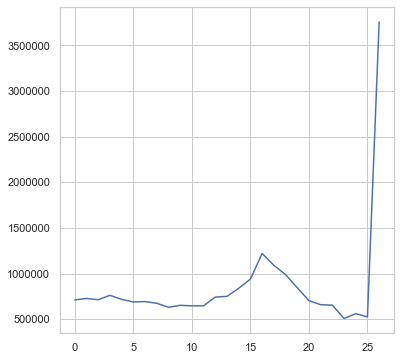

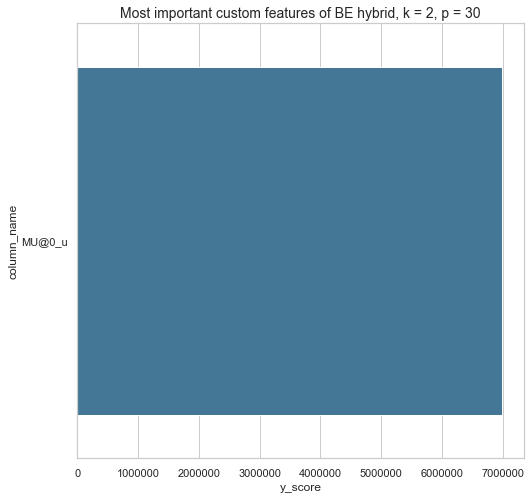

(  column_name       y_score
 0      MU@0_u  6.995956e+06,
 [711226.6753478624,
  727239.3643505248,
  713462.6626330024,
  761451.65048329,
  716950.8783633234,
  688516.2846581821,
  692776.3720758745,
  674403.2033357555,
  629955.9499572181,
  651985.0688763721,
  646397.1677105003,
  646544.1108299735,
  742192.5021271945,
  749937.4416989849,
  837900.0354781162,
  938676.8875510943,
  1219613.6503006902,
  1090976.5855047533,
  989248.2709827217,
  844774.3979540276,
  703561.6272252563,
  658743.6601505622,
  653934.732908275,
  507801.74848348944,
  560560.8888019014,
  525103.0115050015,
  3757357.2401628983])

In [5]:
plot_BE(contains(phot_eif,'MU'),k=2,p=30)

In [18]:
def PFA2_plot(eif_df, run_nr = 15, p_dif = 0, pov = 90, remake = False):
    """
    Parameters
    ----------
    eif_df : pandas dataframe
        This needs to befiltered with anomaly detection such as EIF already
    run_nr : Integer, optional
        Amount of runs to do. The default is 15.
    p_dif : int, optional
        p > q, slightly higher number of features is in some cases needed. The default is 0.
    pov : int, optional
        Retained variability in %. The default is 90.
    remake : Boolean, optional
        Set to True if you want to remake previously stored data. The default is False.

    Returns
    -------
    dataframe with column numbers of eif_df and occurence of these columns over all runs combined
    a bar plot showing the occurence parameters over run_nr runs. This plot has been adjusted to 
    only display parameters which occur atleast 0.10 * run_nr amount of times (10%)

    """
    DF_name = eif_df.name
    
    #    
        
    results_df = pfa2_loader(eif_df, run_nr = run_nr, p_dif = p_dif, pov = pov, remake = remake)   

    # -------------------------------------------------------------
    # We now have loaded (and if required created) a dataframe with results for n_list
    # If we want to change n_list, we must make sure it's saved and loaded by a new name, or replace the old
    sns.set(style="whitegrid")


    #Set up the variables
    results_top = results_df[results_df.iloc[:,1].values >= run_nr * 0.2]


    #    Setting up the size of the plot, dependant on the number of outputs 
    fig, ax = plt.subplots(figsize=(5, 10))

    #Do the actual plotting
    sns.barplot(x='occurence',y='column_name',data=results_top,palette ="dark")
    ax.set(xlim= [0,run_nr+1],xlabel="Occurence",ylabel = "Feature name")
    plt.title("Top %s features, %i runs, p_dif = %i, pov = %i" %(DF_name,run_nr,p_dif,pov),size='14')
    sns.despine(left=True, bottom=False)   #removes spines
    plt.savefig("pics/PFA/PFA2_%s_%i_%i_%i"%(DF_name,run_nr,p_dif,pov),bbox_inches="tight")
    plt.show()
    
    return results_df

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Photometric, run number = 100, p_difference = 0,pov = 90


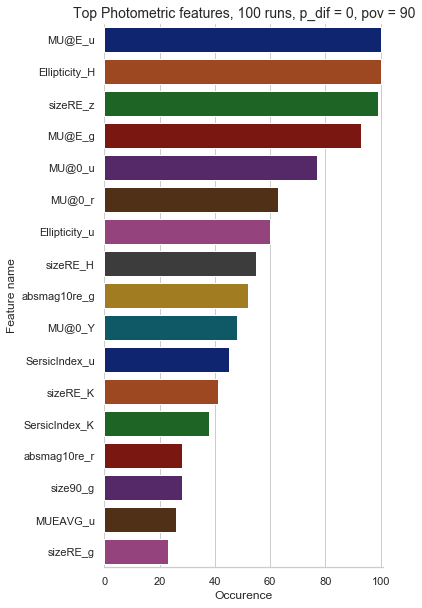

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Photometric, run number = 100, p_difference = 0,pov = 80


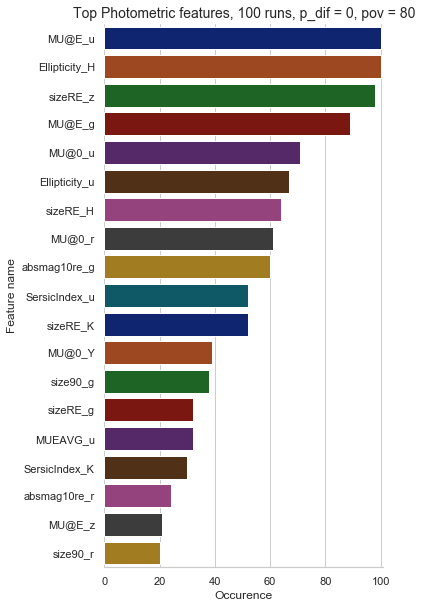

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Photometric, run number = 100, p_difference = 2,pov = 90


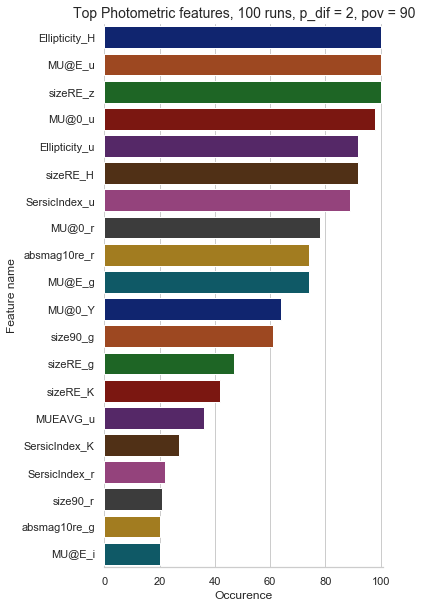

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 90


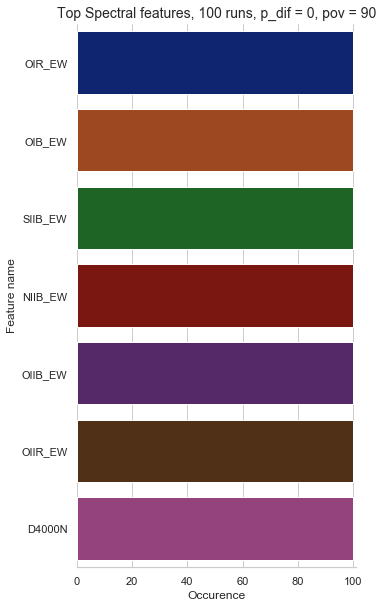

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 0,pov = 80


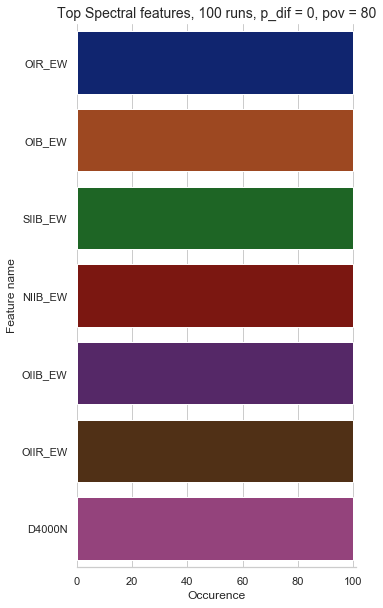

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Spectral, run number = 100, p_difference = 2,pov = 90


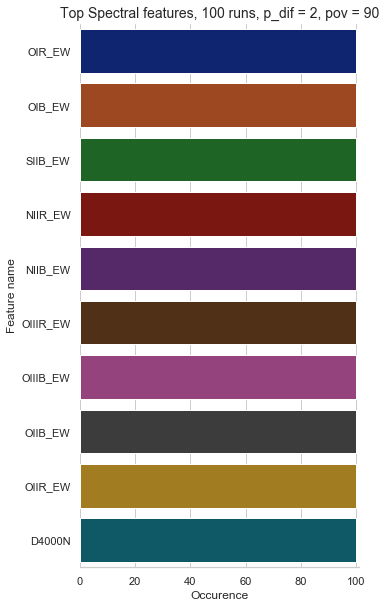

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Combined, run number = 100, p_difference = 0,pov = 90


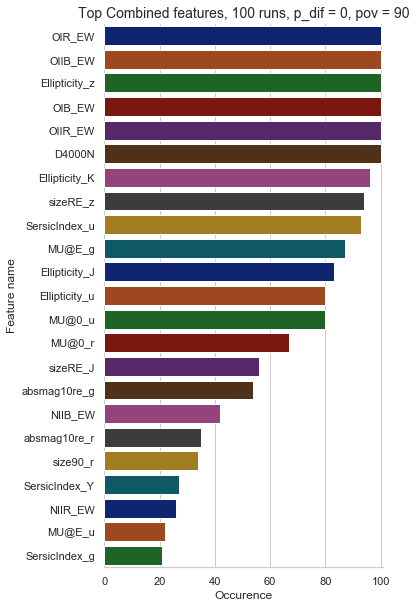

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Combined, run number = 100, p_difference = 0,pov = 80


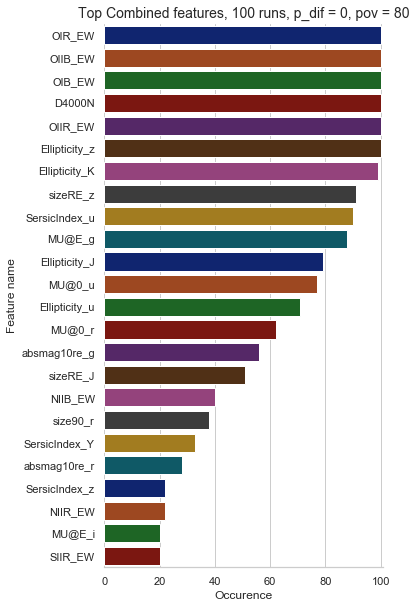

Failed to find PFA2 results, creating database
PFA2 Database created
settings: Dataframe = Combined, run number = 100, p_difference = 2,pov = 90


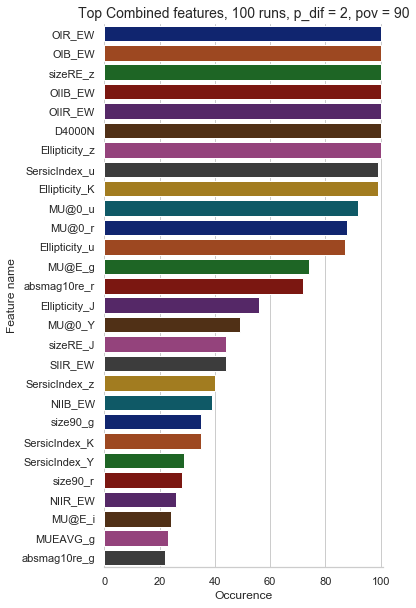

In [19]:
for i in dataframes:
 #   PFA_plot(i, 10,100)
    PFA2_plot(i, 100)
    PFA2_plot(i, 100, pov = 80)
    PFA2_plot(i, 100, p_dif = 2)    

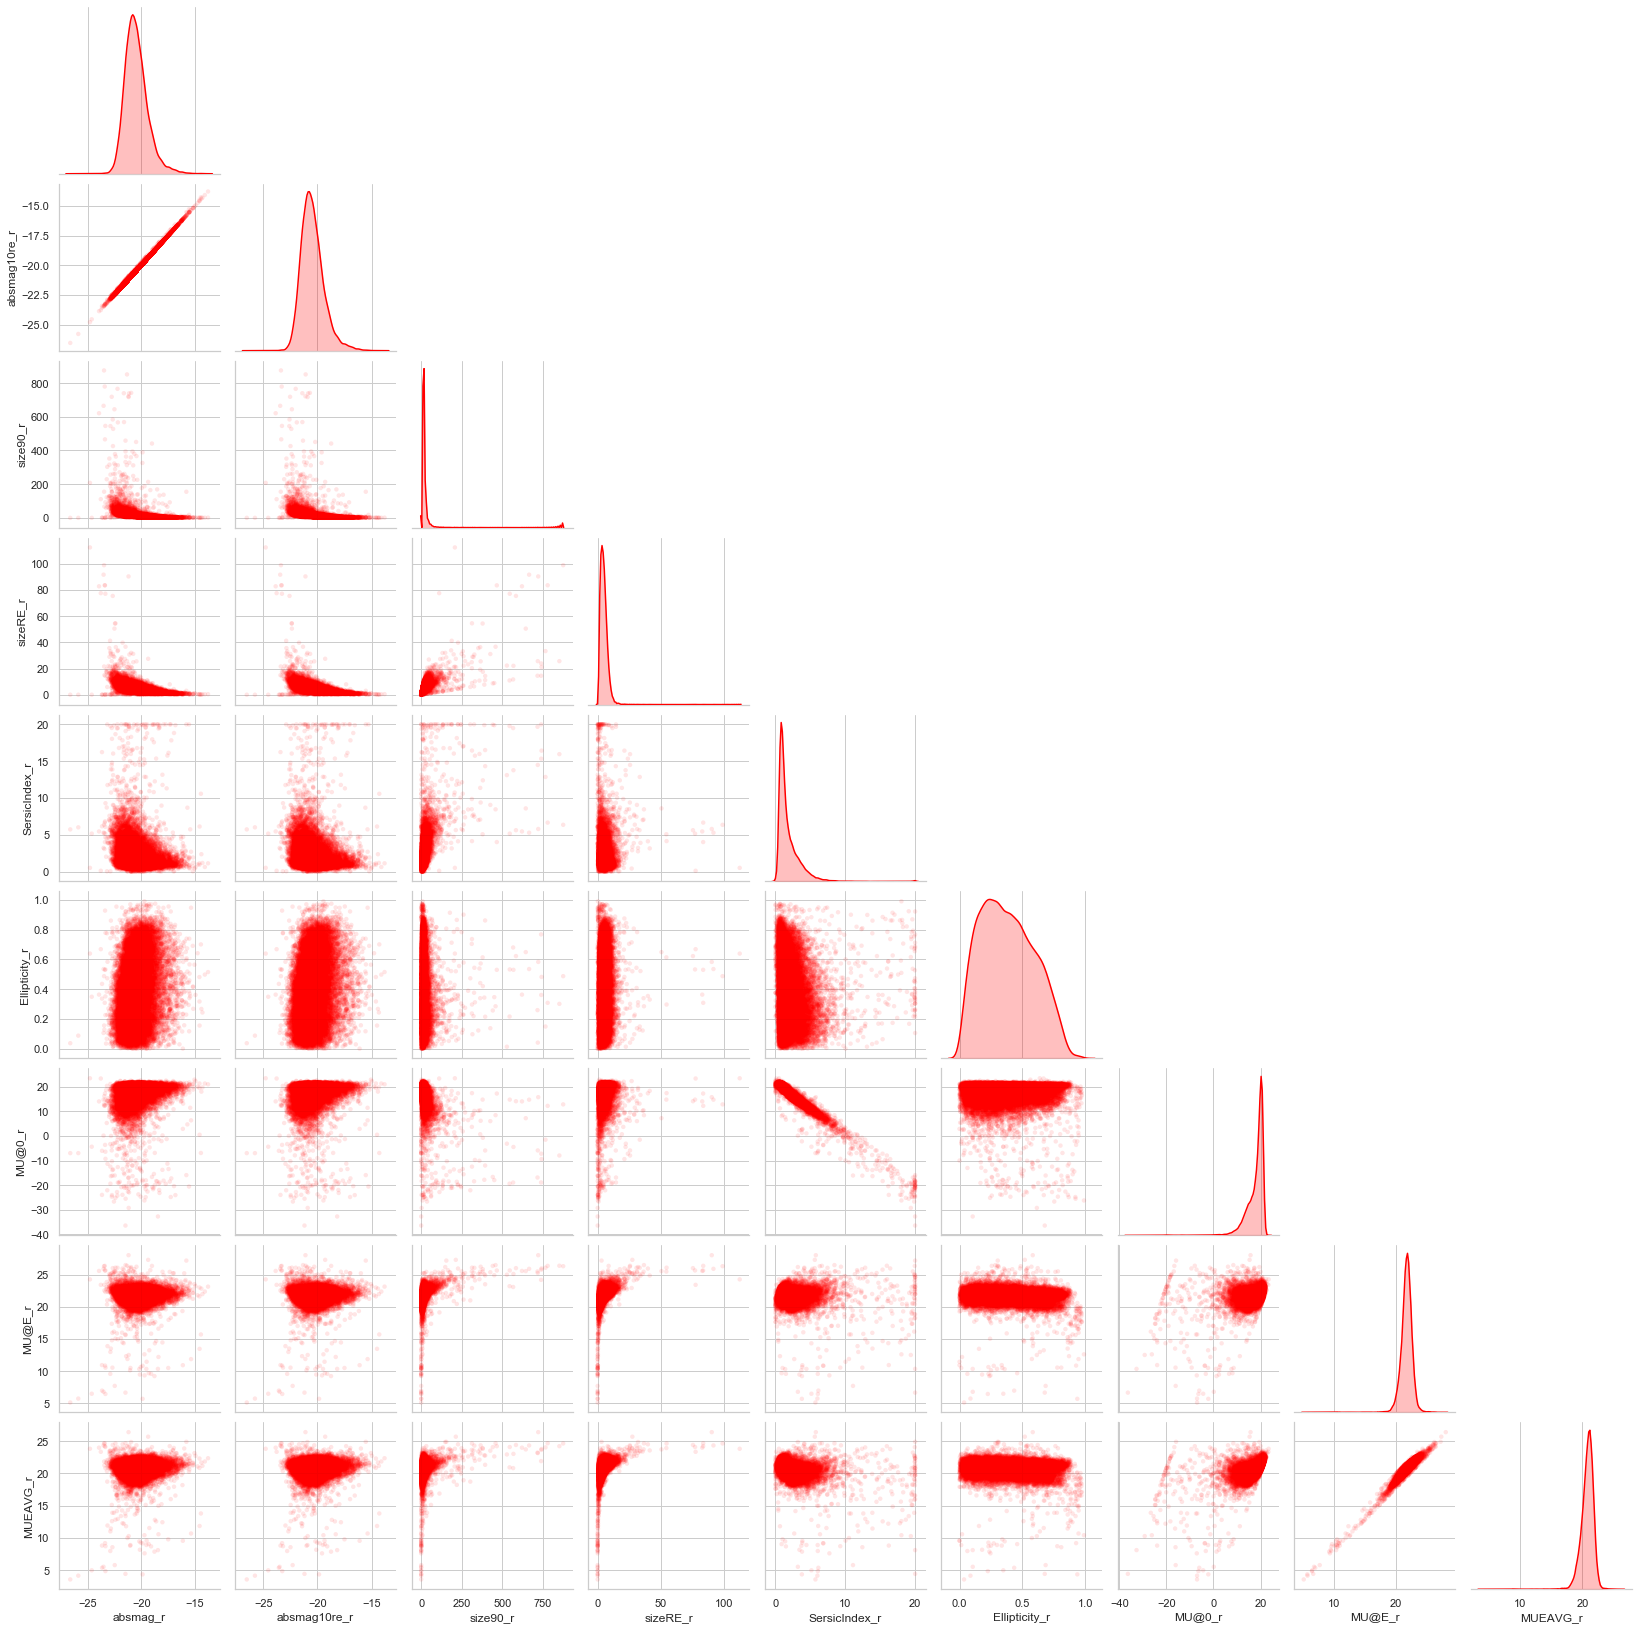

In [6]:
r_eif = endswith(phot_eif,'r')

sns.pairplot(r_eif, corner = True,plot_kws=dict(s=20, edgecolor="None", linewidth=1,\
                                                alpha = 0.1,color='red'),
                 diag_kind="kde", diag_kws=dict(shade=True,color='red'))
plt.savefig("pics/pairwise_r_eif",bbox_inches="tight")

absmag_r           1.128398
absmag10re_r       1.118024
size90_r         730.108169
sizeRE_r          10.958444
SersicIndex_r      3.317603
Ellipticity_r      0.043548
MU@0_r            17.527208
MU@E_r             0.979710
MUEAVG_r           1.180424
dtype: float64

# LS-WNCH-SR code

In [4]:
# Save in SR, use unmodified WNCH
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)
    if intra_disp == 0.:
        return 1
    else:
        return y

def LS_WNCH_SR(eif_df, k = 3, remake = False):
    """
    Laplacian Score-WNCH-Simple Ranking 
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    Uses KMeans
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/
    master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    #DF_name = get_df_name(eif_df)  #incase we need the name
    
    y_best = -np.inf
    y_list = []

    #laplace order
    lap_matrix = laplace_order(eif_df, remake = remake)
    max_features = lap_matrix.shape[0]

    for n_features in range(0,max_features):      #number of features we want to analyse over, start at 0 so add +1 where required
        #set some variables for WNCH         
        L_r = lap_matrix.iloc[n_features,1]             # Laplacian score associated with last r-th feature added or eliminated
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array 
        lap_part = eif_df[names]     #make a new (partial) dataframe containing only these features (This is S_0)!


        # Run a clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= k).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        
        # Calculate WNCH score:
        y = WNCH(scaled, cluster_predict, k, L_r)

        if y > y_best:
            y_best = y
            S_best = names
        y_list.append(y)
        print('feature number: %i, y= %.2f'%(n_features+1,y))
    
    print(cluster_predict)
    data = {'column_name':S_best, 'y_score':y_list[:len(S_best)]}
    short = pd.DataFrame(data = data, dtype='float32')  
    data = {'column_name':names, 'y_score':y_list}
    long = pd.DataFrame(data = data)  
    return short, long
 
def SR_loader(eif_df, k, remake = False):
    """
    Input: 
        eif_df: EIF filtered dataframe
        k: number of clusters
        remake: remake the database entry or not?
    
    Output: 
        short and long dataframe belonging to LS_WNCH_SR
    
    Use: stores the results of LS_WNCH_SR,
    so that it does not need to be rerun every time
    """
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"
    
    while True:
        try:
            if remake == True:
                print("New SR file requested")
                raise NameError('Remake')
            long = pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short =  pd.read_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i"%(DF_name, k))
            break
        except (KeyError,FileNotFoundError, NameError):
            if DF_name == "custom":
                short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)
                break
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i,"%(DF_name, k))
            short, long = LS_WNCH_SR(eif_df, k = k,remake=remake)            
            long.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_long_filtered_%i"%(DF_name, k,dropped))
            short.to_hdf('hybrid_results.h5',"SR_results_%s_k_%i_short_filtered_%i"%(DF_name, k,dropped))
            break
      
    return short, long
#%%
def plot_SR(eif_df, k, remake = False):
    
    try:
        DF_name = eif_df.name
    except:
        DF_name = "custom"

    short, long = SR_loader(eif_df, k, remake = remake)
    
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data = (long['y_score']))
    plt.savefig("pics/SR/yplot_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
      
    fig, ax = plt.subplots(figsize=(8,8))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("Most important %s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=short,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8,22))
    #plt.xscale('log')
    plt.xlabel("WNCH score")
    plt.title("%s features of SR hybrid, k = %i"%(DF_name,k),size='14')
    sns.barplot(x='y_score',y='column_name',data=long,palette='winter')
    plt.savefig("pics/SR/LS_WNCH_SR_complete_%s_%i"%(DF_name,k),bbox_inches="tight")
    plt.show()


New SR file requested
New laplacian file requested
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = epsilon, Dataframe = custom, filtered by EIF = 547 
feature number: 1, y= 2944399.50
feature number: 2, y= 1509197.10
feature number: 3, y= 1327885.72
feature number: 4, y= 1632098.77
feature number: 5, y= 932077.71
feature number: 6, y= 1043697.02
feature number: 7, y= 762389.32
feature number: 8, y= 410113.08
feature number: 9, y= 361249.70
feature number: 10, y= 301129.82
feature number: 11, y= 259086.08
feature number: 12, y= 238612.04
[1 1 1 ... 1 1 1]


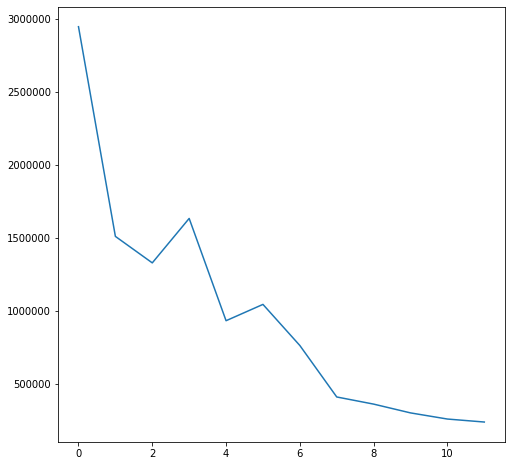

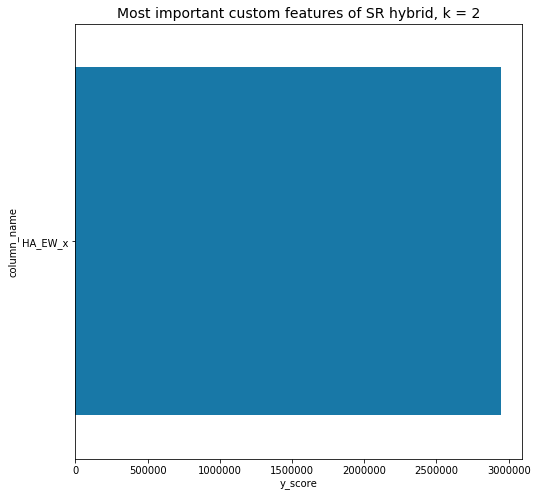

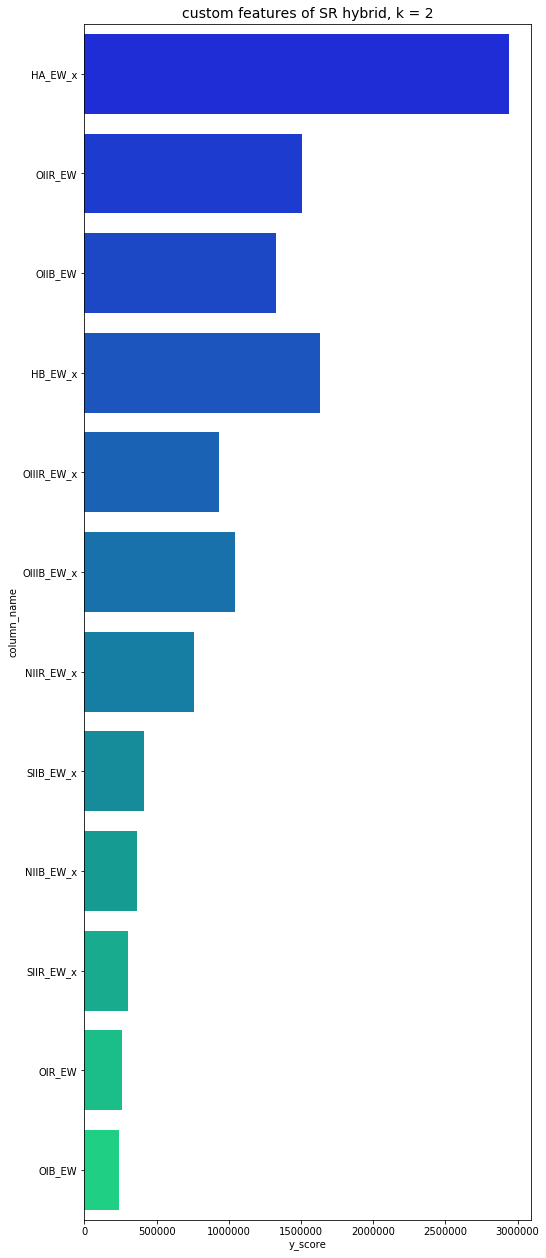

In [12]:
plot_SR(contains(combi_eif,'EW'), 2,True)

Failed to find Hybrid results, or remake requested
Settings: Database: Spectral, k = 3,
Failed to find Laplacian results, creating database
Laplacian Database created
settings: Dataset = zeta, Dataframe = Spectral, filtered by EIF = 547 
feature number: 1, y= 8097010.23
feature number: 2, y= 3441038.60
feature number: 3, y= 5297628.59
feature number: 4, y= 4521443.95
feature number: 5, y= 2261075.53
feature number: 6, y= 2006811.61
feature number: 7, y= 1511238.07
feature number: 8, y= 1365653.19
feature number: 9, y= 741669.89
feature number: 10, y= 557624.40
feature number: 11, y= 519303.43
feature number: 12, y= 420873.11
feature number: 13, y= 377069.73
[1 1 1 ... 2 1 2]


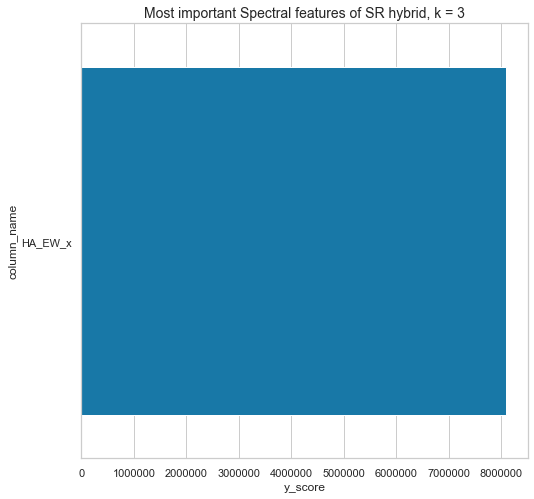

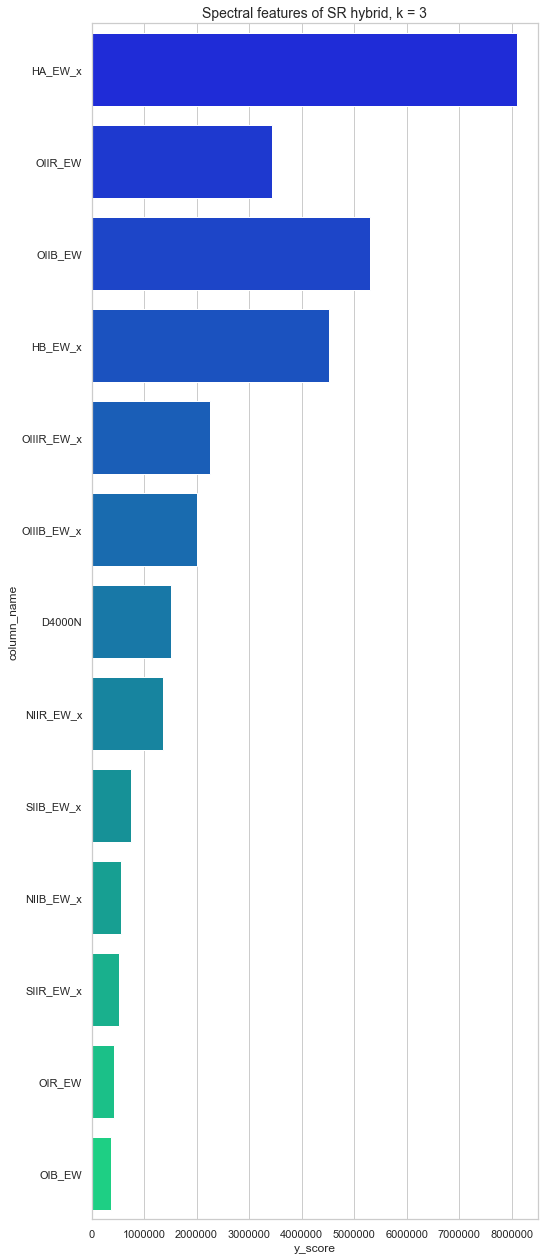

In [52]:
plot_SR(spec_eif, 3)

In [ ]:
remake = False
klist = [2,3,4,5]
for i in dataframes:
    for k in klist:
        plot_SR(i, k, remake)

## LS-WNCH-BE code

In [16]:
# Modified WNCH, y/4 for features = 1
def WNCH(X, cluster_predict, n_clusters,  L_r,):
    """
    Weighted Normalised Calinski-Harabasz Index
    input: 
    X = pandas dataframe, shape: (n_samples , n_features). Each is a single data point
    Will assume lap_part if none is given
    lables = an array, shaped to (n_samples), predicting the label for each sample
    Will assume cluster_predict if none is given
    
    Returns:
    score as a float
    possible adjustment proposed:First number explodes so start n_features at 0 rather then 1.
    This means the graph always starts at 0
    """
    
    n_features = X.shape[1]
    n_samples = X.shape[0]    #the sample size, or n
    
    extra_disp = 0.
    intra_disp = 0.
    
    mean = np.mean(X, axis=0).values # mean of the whole partial matrix, per feature


    for k in range(n_clusters):
        cluster_k = X[cluster_predict == k].values   # a matrix with just objects belonging to this cluster
        mean_k = np.mean(cluster_k, axis=0)                 # the mean vector for every feature
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)  #add to the trace of S_B (non diagonal cancel out)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)              #add to the trace of S_W (non diagonal cancel out)
    
    y =  (extra_disp * (n_samples - n_clusters) * n_features) / (intra_disp * (n_clusters - 1) * L_r )
    #print('y =',y)

    if intra_disp == 0.:
        return 1
    if n_features == 1:
        return y / 4
    else:
        return y

y_list = []
rank_list = []
def LS_WNCH_BE(eif_df, k = 3, p = 30):
    
    """
    Laplacian Score-WNCH-Backward Elimination
    ======================================
    Input:
    DF_name: Name of the dataframe, one of four possible right now, this is an F * N matrix
    F = number of features, N = number of datapoints)
    dropped: amount of data to be filtered with EIF
    k: the value of k for the k-means clustering test
    remake: Wether or not to remake the laplacian order matrix (memory intensive)
    
    ======================================
    Output: 
    
    ===============================================================
    Description:
    First hybrid method
    Builds n feature subsets (as many as featur)
    
    =================================================================
    
    
    Based on Solario-Fernandez et al, 2019 [1], 
    Sources: 
    sklear: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Python notebook: https://nbviewer.jupyter.org/github/rasbt/pattern_classification/
    blob/master/dimensionality_reduction/projection/linear_discriminant_analysis.ipynb#LDA-in-5-steps
    Books
    """
    global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    # global y_list, rank_list, S_best  #Due to recursion, we will otherwise lose this information
    y_list2 = []     #Alternative for plotting
    S_best = 0
   # y_list.append(np.nan)
    X_S0 = eif_df  #need to define a global name for the matrix we are using
    #   DF_name = get_df_name(X_S0)   #gets the name of the original matrix    
    n_clusters = k


    # What to return if there is only one feature?
    if X_S0.shape[1] == 1:
        print("only one feature")
        S_best = X_S0.columns[0]
        # Calculate Y_best score here aswell (for comparison with different k)
        lap_part = pd.DataFrame(X_S0[S_best])
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)
        cluster_predict = kmeans.predict(scaled)
        # Find y score from here
        L_r = laplace_order(spec_eif).iloc[0,1]     # Assumption made for unmodified score (with one feature, score is relative)
        y_score = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        
        data = {'column_name':S_best, 'y_score':y_score}
        S_best = pd.DataFrame(data = data, index = [0])  
        print("S_best =", S_best)
        return S_best, y_list

        
    else:
        lap_matrix = laplace_order(X_S0, remake = True,save= False)
        n_features = lap_matrix.shape[0]
        
        
        print(n_features," remaining features")
        flag = False

        #first cluster run
        names = lap_matrix.iloc[:n_features+1].feature.values   # names of the top n features as an array  (This is for S_0)
        lap_part = X_S0[names]     #make a new dataframe where features are ordered by laplace score (This is ind_rank)!
        initial = lap_part 
        
        # clustering algorhitm (Kmeans chosen here)
        scaler = StandardScaler()
        scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                              lap_part.index,columns=lap_part.columns)
        kmeans = KMeans(n_clusters= n_clusters).fit(scaled)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
        cluster_predict = kmeans.predict(scaled)              #execute kmeans to predict, each object will be labeled with cluster number
        
        #WNCH check to find y_best        
        L_r = lap_matrix.iloc[n_features-1,1]            # Laplacian score associated with last r-th feature added or eliminated
        y_best = WNCH(scaled, cluster_predict, n_clusters, L_r)      #determine initial rank 
        print("initial y_best: %.2f, %s"%(y_best,names[-1]))
        
        y_list.append(y_best)
        y_list2.append(y_best)
        
        counter = 0        
        n_features = n_features - 1   #remove the i'th feature
               

        for rank_nr in np.arange(0,n_features)[::-1]:    # Start at 
            L_r = lap_matrix.iloc[rank_nr,1]             # Laplacian score associated with last r-th feature added or eliminated
            names = lap_matrix.iloc[:rank_nr+1].feature.values   # plus one due to how the slices work (does not include the end point)
            lap_part = X_S0[names]    # S_o <-- indRank

            #run a clustering algorhitm over X_S_0
            # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
            scaler = StandardScaler()
            scaled = pd.DataFrame(scaler.fit_transform(lap_part),index=
                                  lap_part.index,columns=lap_part.columns)
            kmeans = KMeans(n_clusters= n_clusters).fit(scaled) 
            cluster_predict = kmeans.predict(scaled)             
            y = WNCH(scaled, cluster_predict, n_clusters, L_r)

            if y > y_best:
                y_best = y
                print("Laplace rank: %i, new y_best: %.2f, %s"%((rank_nr+1),y_best,names[-1]))
                S_best = names  #Best = names of all the remaining items
                flag = True
            else:
                print('Laplace rank: %i, %s'%((rank_nr+1),names[-1])) 
            
            #some feedback mechanisms
            y_list.append(y)   #bonus for plotting
            y_list2.append(y)
            
            counter = counter +1
            if counter >= p:  #check for number of runs
                print('break, p is exceeded')
                break
        
        if flag == True:
            print('recursion')
            return LS_WNCH_BE(X_S0[S_best], k = k, p = p)
           # run alghoritm with X_s_best         
        
        elif S_best == 0:
            print('No improvement found within p = %i'%(p))
            names = initial.columns[::-1].values[:len(y_list2)]
            print(len(names),len(y_list2))
            data = {'column_name':names, 'y_score':y_list2}
            S_best = pd.DataFrame(data = data)
            S_best = S_best[::-1]
            print("S_best =", S_best)
            return S_best, y_list
            
            
        else:
            #No S_best found within p, 
            print('else')
            data = {'column_name':S_best, 'y_score':y_list2[::-1]}
            S_best = pd.DataFrame(data = data, dtype='float32')  
            print("S_best =", S_best)
            return S_best, y_list
            
    
def BE_loader(eif_df, k, p, remake=False):
    """" remake required for full y_list, not just of last recursion"""
    global y_list
    DF_name = eif_df.name

    while True:
        try:
            if remake == True:
                print("New file requested")
                raise NameError('Remake')
            S_best =  pd.read_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
            y_list = np.load("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped)) #This makes it into a np list, even if it fails to load
            print("succes, Hybrid results found")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            break
        except (KeyError,FileNotFoundError, NameError):
            y_list = []  #make it an ordinary list
            print("Failed to find Hybrid results, or remake requested")
            print("Settings: Database: %s, k = %i, p = %i"%(DF_name, k,p))
            S_best, y_list = LS_WNCH_BE(eif_df, k = k, p = p)  #Apply LS_WNCH_BE
            np.save("ylist/%s%i%i%i.npy"%(DF_name, k,p,dropped),y_list)
            S_best.to_hdf('hybrid_results.h5',"BE_results_%s_k_%i_p_%i_filtered_%i"%(DF_name, k,p,dropped))
        break
      
    return S_best, y_list

#%%
def plot_BE(eif_df, k = 3, p = 30, remake=False):
    """
    

    Parameters
    ----------
    eif_df : pandas dataframe 
        EIF filtered dataframe
    k : integer, optional
        number of clusters. The default is 3.
    p : integer, optional
        maximum number of runs. The default is 30.
    remake : boolean, optional
        DESCRIPTION. The default is False.

    Returns
    -------
    S_best : pandas DataFrame
        Shows the most important features, and relevant y scores
        note: first is always 1 at the moment
    y_list : TYPE
        List of how y develops. Simply for 

    """
    #Set lists to 0
    global y_list, rank_list
    y_list = []
    rank_list = []
    DF_name = eif_df.name
    
    S_best, y_list = BE_loader(eif_df, k, p, remake=remake)
    
    fig = plt.subplots(figsize= (6,6))
    plt.plot(y_list)
    plt.show()

      
    fig, ax = plt.subplots(figsize=(4.5,10))
    #plt.xscale('log')
    sns.set(style="whitegrid",font_scale=1.3)
    plt.xlabel("WNCH score")
    plt.title("%s features of BE hybrid, k = %i, p = %i"%(DF_name,k,p),size='14')
    sns.barplot(x='y_score',y='column_name',data=S_best,palette="mako")
    plt.savefig("pics/BE/LS_WNCH_BE_%s_%i_%i"%(DF_name,k,p),bbox_inches="tight")
    plt.show()
    
    return S_best, y_list


succes, Hybrid results found
Settings: Database: Photometric, k = 3, p = 30


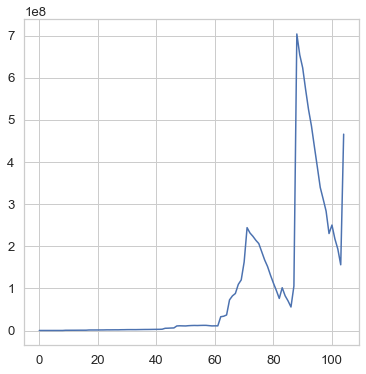

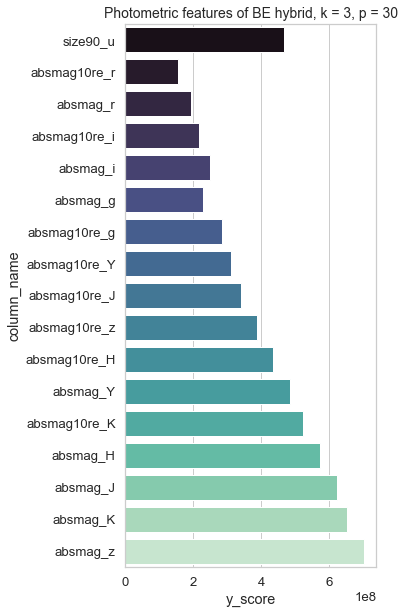

(     column_name       y_score
 16      size90_u  4.662004e+08
 15  absmag10re_r  1.561624e+08
 14      absmag_r  1.937055e+08
 13  absmag10re_i  2.178104e+08
 12      absmag_i  2.505060e+08
 11      absmag_g  2.303406e+08
 10  absmag10re_g  2.834800e+08
 9   absmag10re_Y  3.121693e+08
 8   absmag10re_J  3.397883e+08
 7   absmag10re_z  3.885362e+08
 6   absmag10re_H  4.364907e+08
 5       absmag_Y  4.854935e+08
 4   absmag10re_K  5.245096e+08
 3       absmag_H  5.721855e+08
 2       absmag_J  6.235830e+08
 1       absmag_K  6.543746e+08
 0       absmag_z  7.040185e+08,
 array([2.75548788e+05, 2.79362224e+05, 2.80254829e+05, 2.81228466e+05,
        2.82043446e+05, 2.83011634e+05, 2.85626539e+05, 2.86738365e+05,
        2.88655507e+05, 7.73964045e+05, 7.68731101e+05, 8.01917113e+05,
        8.19184464e+05, 8.68660518e+05, 9.14920775e+05, 9.22922819e+05,
        9.43758342e+05, 1.42071265e+06, 1.44479097e+06, 1.44960695e+06,
        1.47771590e+06, 1.51778310e+06, 1.56452089e+06, 1.75332

In [17]:
plot_BE(phot_eif,3,30,remake = False)

succes, Hybrid results found
Settings: Database: Photometric, k = 3, p = 30


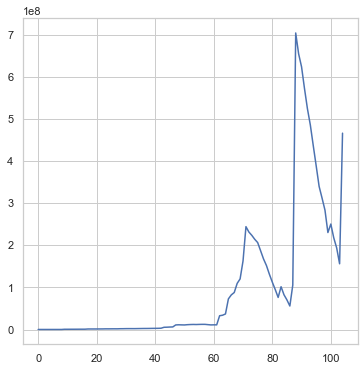

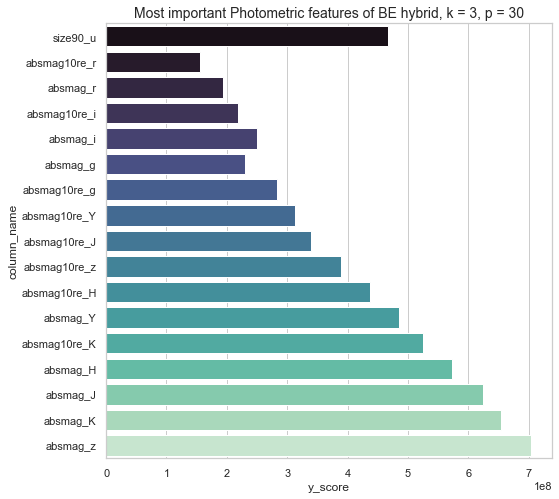

Failed to find Hybrid results, or remake requested
Settings: Database: Spectral, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
13  remaining features
initial y_best: 377071.37, OIB_EW
Laplace rank: 12, new y_best: 420873.11, OIR_EW
Laplace rank: 11, new y_best: 519294.69, SIIR_EW_x
Laplace rank: 10, new y_best: 557624.78, NIIB_EW_x
Laplace rank: 9, new y_best: 741670.28, SIIB_EW_x
Laplace rank: 8, new y_best: 1365653.19, NIIR_EW_x
Laplace rank: 7, new y_best: 1511279.78, D4000N
Laplace rank: 6, new y_best: 2006760.83, OIIIB_EW_x
Laplace rank: 5, new y_best: 2261054.91, OIIIR_EW_x
Laplace rank: 4, new y_best: 4521267.10, HB_EW_x
Laplace rank: 3, new y_best: 5297527.58, OIIB_EW
Laplace rank: 2, OIIR_EW
Laplace rank: 1, HA_EW_x
recursion
New laplacian file requested
Failed to find Laplacian results, creating database
3  remaining features
initial y_best: 437369544.28, OIIB_EW
Laplace rank: 2, new y_best: 5254380877.99, OIIR_EW
Laplace rank:

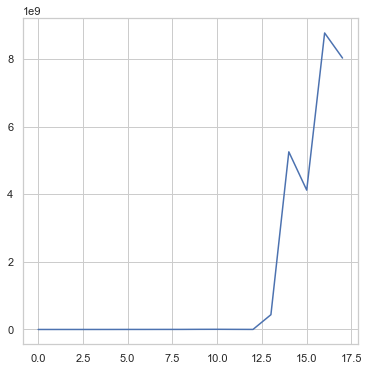

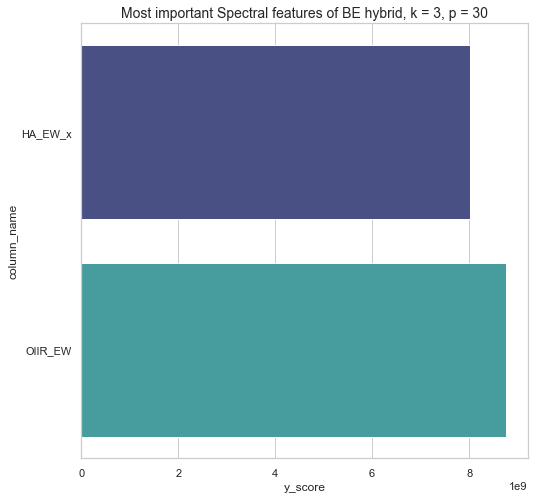

Failed to find Hybrid results, or remake requested
Settings: Database: Combined, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
94  remaining features
initial y_best: 433755.46, OIR_EW
Laplace rank: 93, new y_best: 532861.44, Ellipticity_u
Laplace rank: 92, new y_best: 534729.48, Ellipticity_z
Laplace rank: 91, new y_best: 537168.74, Ellipticity_Y
Laplace rank: 90, Ellipticity_i
Laplace rank: 89, new y_best: 538651.98, Ellipticity_r
Laplace rank: 88, new y_best: 540585.70, Ellipticity_J
Laplace rank: 87, new y_best: 541281.75, Ellipticity_g
Laplace rank: 86, new y_best: 542638.77, Ellipticity_H
Laplace rank: 85, new y_best: 549474.87, Ellipticity_K
Laplace rank: 84, new y_best: 561978.14, D4000N
Laplace rank: 83, new y_best: 565409.40, OIB_EW
Laplace rank: 82, new y_best: 1115384.24, NIIB_EW_x
Laplace rank: 81, new y_best: 1157837.97, SersicIndex_J
Laplace rank: 80, new y_best: 1191740.89, SersicIndex_K
Laplace rank: 79, new y_best: 11980

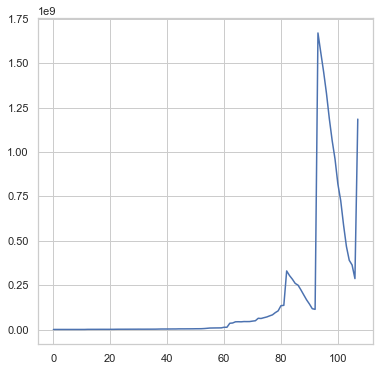

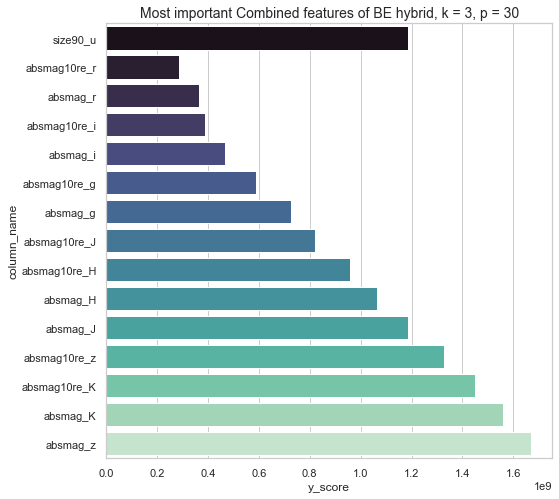

Failed to find Hybrid results, or remake requested
Settings: Database: Direct_Summation, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
51  remaining features
initial y_best: 132928.03, BH_CAI_EW
Laplace rank: 50, new y_best: 136851.97, TIO1_EW
Laplace rank: 49, new y_best: 142670.76, HGVA275_EW
Laplace rank: 48, new y_best: 145116.38, HGVA200_EW
Laplace rank: 47, new y_best: 151161.97, NII5755_EW
Laplace rank: 46, new y_best: 155479.85, HGVA125_EW
Laplace rank: 45, new y_best: 159049.51, TIO2_EW
Laplace rank: 44, new y_best: 159634.38, SIII6312_EW
Laplace rank: 43, new y_best: 181794.79, CN2_EW
Laplace rank: 42, new y_best: 182706.19, OI6300_EW
Laplace rank: 41, BH_MH_EW
Laplace rank: 40, CN1_EW
Laplace rank: 39, OI6364_EW
Laplace rank: 38, new y_best: 184625.71, FE5782_EW
Laplace rank: 37, new y_best: 188328.56, MG1_EW
Laplace rank: 36, new y_best: 190327.83, BH_CNB_EW
Laplace rank: 35, new y_best: 198406.79, FE5709_EW
Laplace rank: 34,

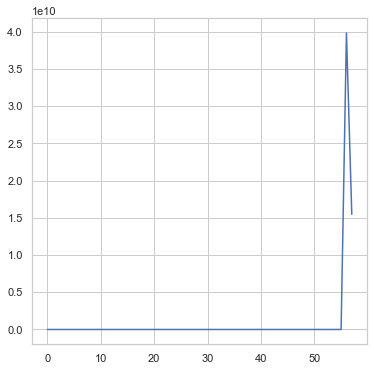

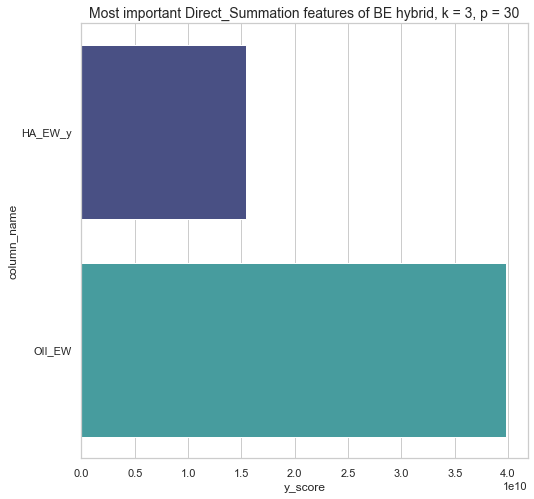

Failed to find Hybrid results, or remake requested
Settings: Database: full, k = 3, p = 30
New laplacian file requested
Failed to find Laplacian results, creating database
149  remaining features
initial y_best: 372119.25, TIO1_EW
Laplace rank: 148, new y_best: 374892.69, BH_CAI_EW
Laplace rank: 147, new y_best: 376639.67, HGVA200_EW
Laplace rank: 146, new y_best: 380364.38, HGVA275_EW
Laplace rank: 145, new y_best: 385521.06, FE5782_EW
Laplace rank: 144, new y_best: 388906.92, BH_FC_EW
Laplace rank: 143, new y_best: 390688.11, TIO2_EW
Laplace rank: 142, new y_best: 392813.81, HGVA125_EW
Laplace rank: 141, new y_best: 396394.27, BH_MGG_EW
Laplace rank: 140, new y_best: 399111.75, BH_CNB_EW
Laplace rank: 139, new y_best: 407889.28, MG1_EW
Laplace rank: 138, new y_best: 412365.22, DEC
Laplace rank: 137, new y_best: 413769.33, OI6364_EW
Laplace rank: 136, new y_best: 424859.72, NA5895_EW
Laplace rank: 135, new y_best: 425862.70, OIR_EW
Laplace rank: 134, new y_best: 427613.68, NII5755_EW


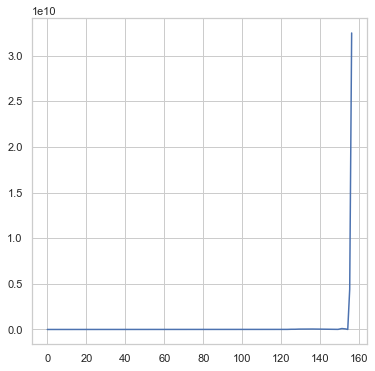

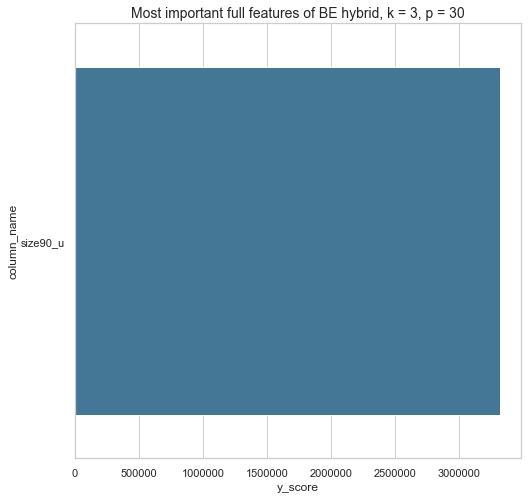

In [60]:
dataframes = [phot_eif,spec_eif,combi_eif,ds_eif,full_eif]
k_list = [2,3,4,5]
remake = False

for i in dataframes:
    for k in [3]:
        plot_BE(i,k,30,remake)

# Cluster and Pairwise plots

In [ ]:
#%%  
sns.pairplot(inv_eif.sample(1000), corner = True,plot_kws=dict(s=10, edgecolor="None", linewidth=1), diag_kind="kde", diag_kws=dict(shade=True))
#%%  
plt.matshow(u_eif.corr())
plt.xticks(range(len(u_eif.columns)), u_eif.columns)
plt.yticks(range(len(u_eif.columns)), u_eif.columns)
plt.colorbar()
plt.show()
    

#%%   d

u_eif.name = 'u_phot'
sns.set(style="ticks")

sns.pairplot(u_eif, kind = "reg", diag_kind="kde")
#%%   
g = sns.PairGrid(u_eif)
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap=cmap, n_levels=40, shade=True);
#%%

In [ ]:
%matplotlib inline 
def cluster_BE(eif_df, k,p,a=0,b=1):
    sns.set(style='darkgrid')

    BE_best, y = BE_loader(eif_df,k,p)
    names = BE_best.iloc[:,0].values
    BE_part = eif_df[names]
    
    kmeans = KMeans(n_clusters= k).fit(BE_part)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
    cluster_predict = kmeans.predict(BE_part)          
    
    sns.set_style("darkgrid")
    cmap = 'prism'
    sns.scatterplot(x=BE_part.columns[a],y=BE_part.columns[b], s=10 ,edgecolor='none',alpha = 0.3, \
                    hue = cluster_predict,data = BE_part,palette=cmap)
    plt.show()
    
def cluster_DF(eif_df, k):

    BE_best = BE_loader(eif_df,k)
    names = BE_best.iloc[:,0].values
    BE_part = eif_df[names]
    
    kmeans = KMeans(n_clusters= k).fit(BE_part)  # set up a KMeans object, with expected amount of clusters, and fit to the partal dataframe
    cluster_predict = kmeans.predict(BE_part)          
    
    sns.set_style("whitegrid")
    cmap = 'prism'
    
    sns.pairplot(eif_df, corner = True,plot_kws=dict(s=10, edgecolor="None", linewidth=1), diag_kind="kde", diag_kws=dict(shade=True))
    plt.show()
cluster_BE(phot_eif,3,30)
cluster_BE(spec_eif,3,30,0,1)
cluster_BE(combi_eif,3,30,0,1)


In [8]:
PFA3

NameError: name 'PFA3' is not defined

In [9]:
from sklearn.preprocessing import StandardScaler
def cluster_plot_scaled(eif_df, k):       
    scaler = StandardScaler()
    scaled = pd.DataFrame(scaler.fit_transform(eif_df),index=eif_df.index,columns=eif_df.columns)

    kmeans = KMeans(n_clusters= k).fit(scaled)  # set up a KMeans object, 
    cluster_predict = kmeans.predict(scaled)          
    eif_df['predict'] = cluster_predict
    
    sns.set_style('darkgrid')
    title = ("KMeans comparison for critical features, k = %i"%(k) )
    sns.pairplot(inv_eif, corner = True,plot_kws=dict(s=5, edgecolor="None", linewidth=1),
                 diag_kind="kde", diag_kws=dict(shade=True),hue="predict")
    plt.savefig("pics/pairwise_kmeans_scaled_%ik%s"%(k,eif_df.name),bbox_inches="tight")
    plt.show()
cluster_plot_scaled(phot_eif, 4)

NameError: name 'inv_eif' is not defined

In [19]:
eif_df = endswith(phot_eif,'r')
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(eif_df),index=eif_df.index,columns=eif_df.columns)
scaled

absmag_r  absmag10re_r  size90_r  sizeRE_r  SersicIndex_r  \
3897936 -0.452866     -0.466339 -0.215780  0.010964      -0.597736   
3616632  0.441241      0.431909 -0.161940  0.070438      -0.484745   
3897076 -0.302639     -0.315416 -0.239051  0.377352      -0.886910   
586643   0.134297      0.123542 -0.146621  0.189101      -0.537397   
3877479 -0.144868     -0.156915 -0.167651  0.132080      -0.552111   
...           ...           ...       ...       ...            ...   
267389   0.728901      0.721600 -0.200206 -0.327457      -0.177947   
266467  -0.136876     -0.142571 -0.172624 -0.482987       0.191825   
535590   0.232218      0.221925 -0.133960  0.125903      -0.450596   
49052   -0.599982     -0.614122 -0.245279 -0.268412      -0.428030   
342440  -0.490790     -0.504439 -0.202460  0.326184      -0.773975   

         Ellipticity_r    MU@0_r    MU@E_r  MUEAVG_r  
3897936      -0.937365  0.567319  0.015210  0.268135  
3616632       1.255970  0.511076  0.225351  0.366974  
3897076       1.112687  0.687538 -0.597110  0.063361  
586643        0.736988  0.570918  0.269476  0.448268  
3877479       1.166358  0.449895 -0.300755 -0.059133  
...                ...       ...       ...       ...  
267389       -0.074312  0.331236  0.686019  0.596800  
266467       -1.060522 -0.219640 -0.168805 -0.343786  
535590        1.673839  0.364190 -0.260243 -0.100405  
49052        -1.548356  0.362690 -0.176874 -0.040322  
342440       -1.081128  0.781542  0.228989  0.650905  

[24473 rows x 9 columns]

In [20]:
scaled.var()

absmag_r         1.000041
absmag10re_r     1.000041
size90_r         1.000041
sizeRE_r         1.000041
SersicIndex_r    1.000041
Ellipticity_r    1.000041
MU@0_r           1.000041
MU@E_r           1.000041
MUEAVG_r         1.000041
dtype: float64

In [24]:
scaler.var_

array([1.12835192e+00, 1.11797873e+00, 7.30078336e+02, 1.09579967e+01,
       3.31746726e+00, 4.35463479e-02, 1.75264914e+01, 9.79670065e-01,
       1.18037541e+00])

In [26]:
eif_df.mean()

absmag_r        -20.465139
absmag10re_r    -20.453110
size90_r         16.461828
sizeRE_r          4.874576
SersicIndex_r     1.932711
Ellipticity_r     0.385807
MU@0_r           17.835365
MU@E_r           21.681614
MUEAVG_r         20.785393
dtype: float64

In [27]:
scaled.mean()

absmag_r        -2.498934e-15
absmag10re_r    -2.455715e-15
size90_r        -2.480434e-16
sizeRE_r         7.368673e-17
SersicIndex_r    8.215641e-18
Ellipticity_r   -1.649661e-16
MU@0_r           9.245114e-16
MU@E_r           1.147530e-15
MUEAVG_r        -2.096145e-16
dtype: float64

In [6]:
phot

absmag_u  absmag10re_u     size90_u    sizeRE_u  SersicIndex_u  \
CATAID                                                                     
6802    -16.498930    -16.498930     1.693470    1.217394       0.089800   
6830    -20.563993    -20.445307  1573.234621  151.985781       7.280300   
6837    -18.530791    -18.530265    13.819605    4.843815       1.545500   
6838    -17.886899    -17.877645    24.967339    6.598801       2.455100   
6839    -18.298163    -18.298163     9.534485    5.777714       0.333200   
...            ...           ...          ...         ...            ...   
3901701 -18.664665    -18.618874    25.032558    4.385122       4.128400   
3901702 -19.268692    -19.268688    15.627759    6.619197       1.044400   
3901768 -19.220608    -19.220547    21.666105    8.399797       1.267700   
3973288 -15.955128    -15.955128     3.670465    2.476511       0.176500   
4348349 -19.834584    -19.560269   488.672999   10.676909      18.924101   

         Ellipticity_u     MU@0_u     MU@E_u   MUEAVG_u   absmag_g  ...  \
CATAID                                                              ...   
6802            0.6091  21.654612  21.669508  21.656874 -17.555164  ...   
6830            0.3254  15.022880  30.471449  28.761940 -19.144864  ...   
6837            0.6322  20.558409  23.560274  22.653215 -19.266915  ...   
6838            0.8897  18.827776  23.801743  22.661787 -18.610079  ...   
6839            0.5407  23.503447  23.912020  23.660021 -19.509874  ...   
...                ...        ...        ...        ...        ...  ...   
3901701         0.0564  16.357140  24.962646  23.553135 -19.817653  ...   
3901702         0.6740  21.512436  23.430477  22.712326 -20.629055  ...   
3901768         0.5981  21.735662  24.136213  23.325834 -20.199397  ...   
3973288         0.6153  23.756243  23.875179  23.786745 -16.945159  ...   
4348349         0.0885 -14.353737  26.378084  24.156389 -21.124489  ...   

          MUEAVG_H   absmag_K  absmag10re_K   size90_K  sizeRE_K  \
CATAID                                                             
6802     18.456911 -18.329572    -18.329572   2.261476  1.108027   
6830     21.384781 -19.554675    -19.554661   8.410381  3.419993   
6837     19.762506 -20.007647    -20.007439  10.125538  3.729863   
6838     20.511658 -18.673820    -18.673820   4.348900  2.681564   
6839     20.752487 -20.330712    -20.330699  12.660867  5.149431   
...            ...        ...           ...        ...       ...   
3901701  17.871639 -21.602422    -21.553901  13.973168  2.389463   
3901702  18.073061 -21.884541    -21.826596  18.755593  2.958011   
3901768  20.013775 -21.221068    -21.221068  12.165849  5.381250   
3973288  16.664459 -18.233880    -17.968404  15.903862  0.385535   
4348349  18.372633 -23.098080    -23.002253  44.512109  5.163043   

         SersicIndex_K  Ellipticity_K     MU@0_K     MU@E_K   MUEAVG_K  
CATAID                                                                  
6802          0.718200         0.6687  18.497427  19.713715  19.165457  
6830          1.144900         0.3671  19.586367  21.721439  20.959873  
6837          1.405500         0.7441  17.953623  20.652346  19.791887  
6838          0.306300         0.5852  20.817305  21.172449  20.947062  
6839          1.144400         0.5641  19.296329  21.430323  20.668962  
...                ...            ...        ...        ...        ...  
3901701       4.239300         0.4060  10.681295  19.527546  18.104126  
3901702       4.621800         0.5518   9.617155  19.293768  17.824934  
3901768       0.941900         0.5615  18.764030  20.461014  19.790936  
3973288      17.934999         0.6377 -19.329847  19.254202  17.061428  
4348349       6.219900         0.5053   6.459976  19.606180  17.980354  

[25761 rows x 81 columns]